<a href="https://colab.research.google.com/github/Mgobeaalcoba/exploratory_data_analysis_with_python/blob/main/conociendo_nuestros_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Instalar librerías necesarias

In [2]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn==0.12.1 matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 89.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
  Created wheel for empiricaldist: filename=empiricaldist-0.6.7-py3-none-any.whl size=11956 sha256=86fb85865294de4500195b39df713dfc69a535aed0c82476cf867d25c25115f0
  Stored in directory: /root/.cache/pip/wheels/88/c5/7a/384eb24c68e3240e0f4d0cb9198673c85cbeaacf070b1500dc
 

## Importar librerías

In [4]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info

## Establecer apariencia general de los gráficos

In [5]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete palmerpenguins

Datos crudos

In [6]:
raw_penguins_df = palmerpenguins.load_penguins_raw() # Datos crudos. Tal como los investigadores los capturaron
raw_penguins_df.head()

studyName  Sample Number                              Species  Region  \
0   PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1   PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2   PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3   PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4   PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   

      Island               Stage Individual ID Clutch Completion    Date Egg  \
0  Torgersen  Adult, 1 Egg Stage          N1A1               Yes  2007-11-11   
1  Torgersen  Adult, 1 Egg Stage          N1A2               Yes  2007-11-11   
2  Torgersen  Adult, 1 Egg Stage          N2A1               Yes  2007-11-16   
3  Torgersen  Adult, 1 Egg Stage          N2A2               Yes  2007-11-16   
4  Torgersen  Adult, 1 Egg Stage          N3A1               Yes  2007-11-16   

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0                39.1               18.7                181.0         3750.0   
1                39.5               17.4                186.0         3800.0   
2                40.3               18.0                195.0         3250.0   
3                 NaN                NaN                  NaN            NaN   
4                36.7               19.3                193.0         3450.0   

      Sex  Delta 15 N (o/oo)  Delta 13 C (o/oo)  \
0    MALE                NaN                NaN   
1  FEMALE            8.94956          -24.69454   
2  FEMALE            8.36821          -25.33302   
3     NaN                NaN                NaN   
4  FEMALE            8.76651          -25.32426   

                         Comments  
0  Not enough blood for isotopes.  
1                             NaN  
2                             NaN  
3              Adult not sampled.  
4                             NaN

Datos previamente procesados

In [9]:
preprocessed_penguins_df = palmerpenguins.load_penguins() # Datos ya pre procesados
preprocessed_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

### Utilizando los conjuntos de datos de seaborn

In [24]:
preprocessed_penguins_df = sns.load_dataset("penguins")
preprocessed_penguins_df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

# Colecta y validación de datos

In [ ]:
# Acceder al contenido de mi drive para no usar archivos temporales.
# Luego debo crear un acceso directo de la carpeta compartida para poder acceder a algun archivo de la misma en mi drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ¿Qué tipo de dato son las variables del conjunto de datos?

In [10]:
preprocessed_penguins_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [23]:
preprocessed_penguins_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [10]:
preprocessed_penguins_df.shape # (filas, columnas)

(344, 7)

## ¿Existen valores nulos explicitos en el conjunto de datos?

In [10]:
preprocessed_penguins_df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [11]:
# Otra forma de hacer lo mismo. any() hace que si encuentra al menos un null = true entonces la columna es true
preprocessed_penguins_df.isna().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [12]:
preprocessed_penguins_df.isnull().sum().sort_values(ascending=False)

sex                  11
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [13]:
preprocessed_penguins_df.isnull().sum().sum()

19

In [14]:
# Ver cantidad de nulos y otras métricas se puede hacer más facil asíL:
preprocessed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

## ¿Cuál es la proporción de valores nulos por cada variable?

In [16]:
penguins_missing = (
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
)

penguins_missing

variable  missing
0     species    False
1     species    False
2     species    False
3     species    False
4     species    False
...       ...      ...
2403      sex     True
2404      sex    False
2405      sex    False
2406      sex    False
2407      sex    False

[2408 rows x 2 columns]

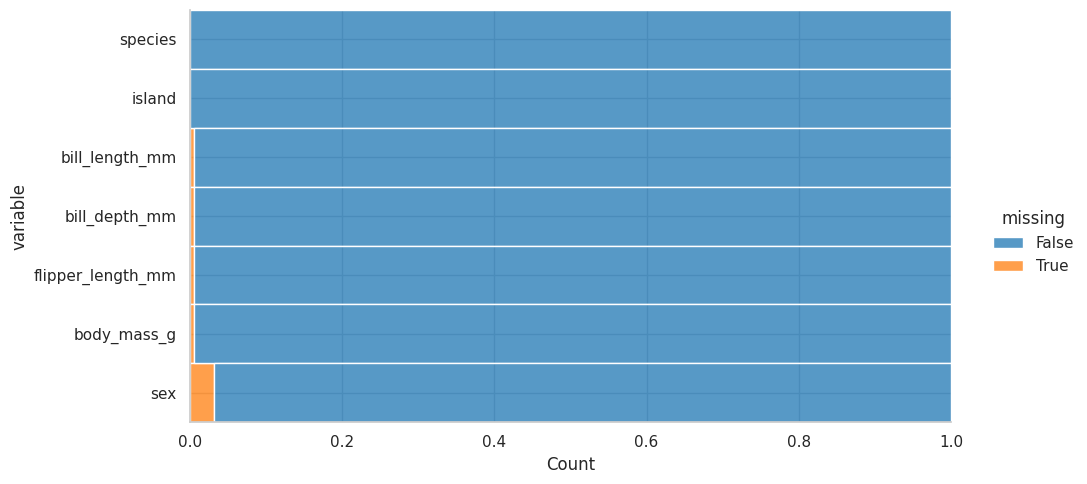

In [15]:
(
    preprocessed_penguins_df
    .isnull()
    .melt(value_name='missing')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                y='variable',
                hue='missing',
                multiple='fill',
                aspect=2
            )
        )
    )
)

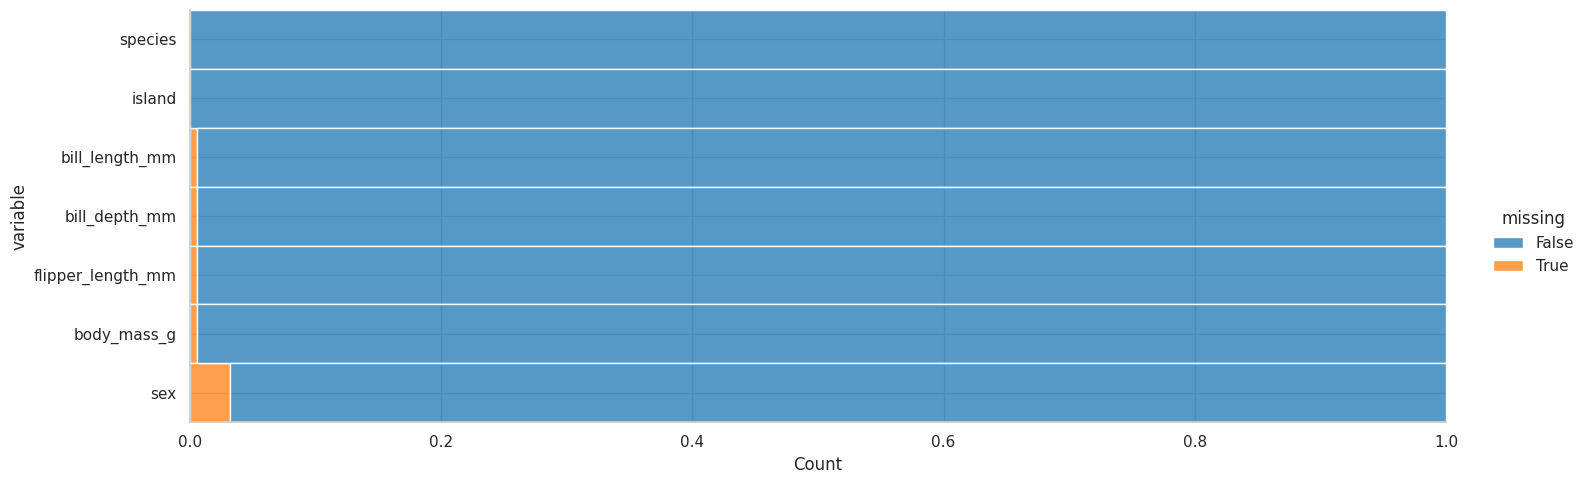

In [18]:
# Si guardamos la tabla melt de dos comentarios arriba se puede graficar aún más facil:
sns.displot(
    data=penguins_missing,
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=3
    )

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

In [19]:
(
    preprocessed_penguins_df
    .isnull()
    .transpose() # Transpone las filas por columnas
)

0      1      2      3      4      5      6      7    \
species            False  False  False  False  False  False  False  False   
island             False  False  False  False  False  False  False  False   
bill_length_mm     False  False  False   True  False  False  False  False   
bill_depth_mm      False  False  False   True  False  False  False  False   
flipper_length_mm  False  False  False   True  False  False  False  False   
body_mass_g        False  False  False   True  False  False  False  False   
sex                False  False  False   True  False  False  False  False   

                     8      9    ...    334    335    336    337    338  \
species            False  False  ...  False  False  False  False  False   
island             False  False  ...  False  False  False  False  False   
bill_length_mm     False  False  ...  False  False  False  False  False   
bill_depth_mm      False  False  ...  False  False  False  False  False   
flipper_length_mm  False  False  ...  False  False  False  False  False   
body_mass_g        False  False  ...  False  False  False  False  False   
sex                 True   True  ...  False  False   True  False  False   

                     339    340    341    342    343  
species            False  False  False  False  False  
island             False  False  False  False  False  
bill_length_mm      True  False  False  False  False  
bill_depth_mm       True  False  False  False  False  
flipper_length_mm   True  False  False  False  False  
body_mass_g         True  False  False  False  False  
sex                 True  False  False  False  False  

[7 rows x 344 columns]

<Axes: >

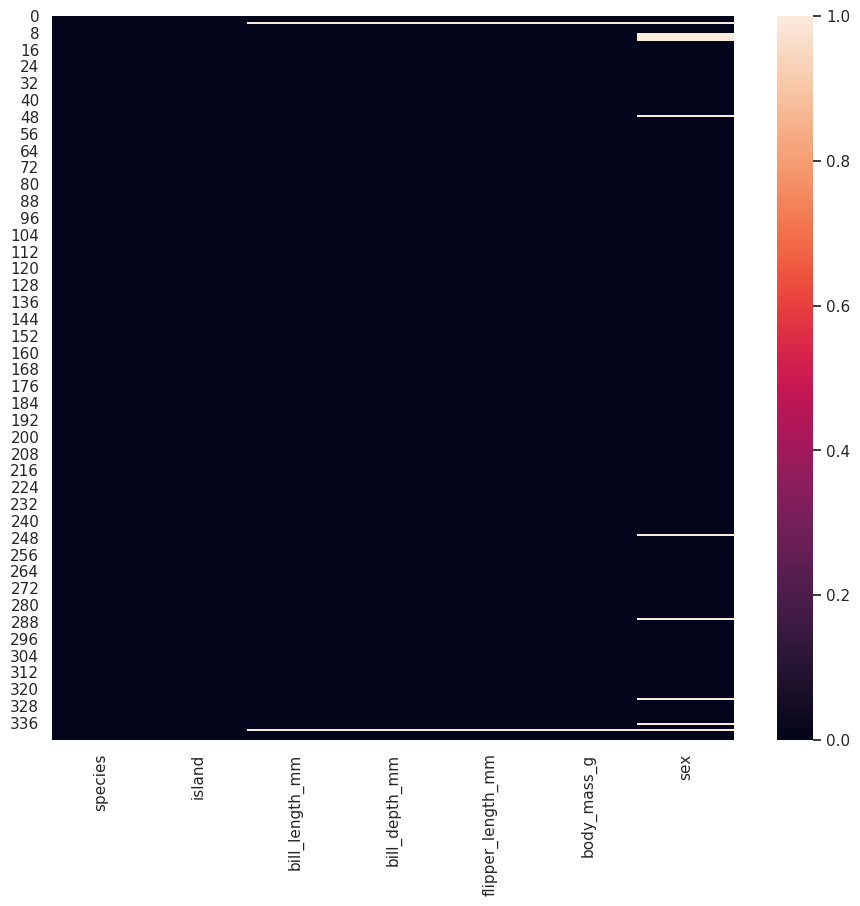

In [20]:
(
    preprocessed_penguins_df
    .isnull()
    # .transpose() # Transpone las filas por columnas para una mejor lectura, pero es optativo.
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

#### Como vemos son muy pocos los pinguinos con valores nulos. Por lo que podemos eliminarlos, no sin antes entender cuantas observaciones perderíanos.

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [25]:
processed_penguins_df = (
    preprocessed_penguins_df
    .dropna()
)

processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

#### Tengo 333 filas ahora y antes teníamos 344 filas. Perdimos 11 filas al eliminar los nulos. Son pocos por lo que la decisión es correcta a priori.

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [17]:
processed_penguins_df.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000         333.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865         200.966967   
std        NaN     NaN        5.468668       1.969235          14.015765   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.500000      15.600000         190.000000   
50%        NaN     NaN       44.500000      17.300000         197.000000   
75%        NaN     NaN       48.600000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    333.000000   333  
unique          NaN     2  
top             NaN  Male  
freq            NaN   168  
mean    4207.057057   NaN  
std      805.215802   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4775.000000   NaN  
max     6300.000000   NaN

### Solo las numéricas

In [23]:
processed_penguins_df.describe(include=[np.number])

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

### Solo categóricas - 1

In [24]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

### Solo categóricas - 2

In [25]:
# Hacemos lo mismo pero transformando nuestros objetos en categorias previamente. astype() es para castear
(
    processed_penguins_df
    .astype(
        {
            'species': 'category',
            'island': 'category',
            'sex': 'category'
        }
    )
    .describe(include=['category', object])
)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

## ¿Cómo visualizar los conteos?

### Pandas

<Axes: >

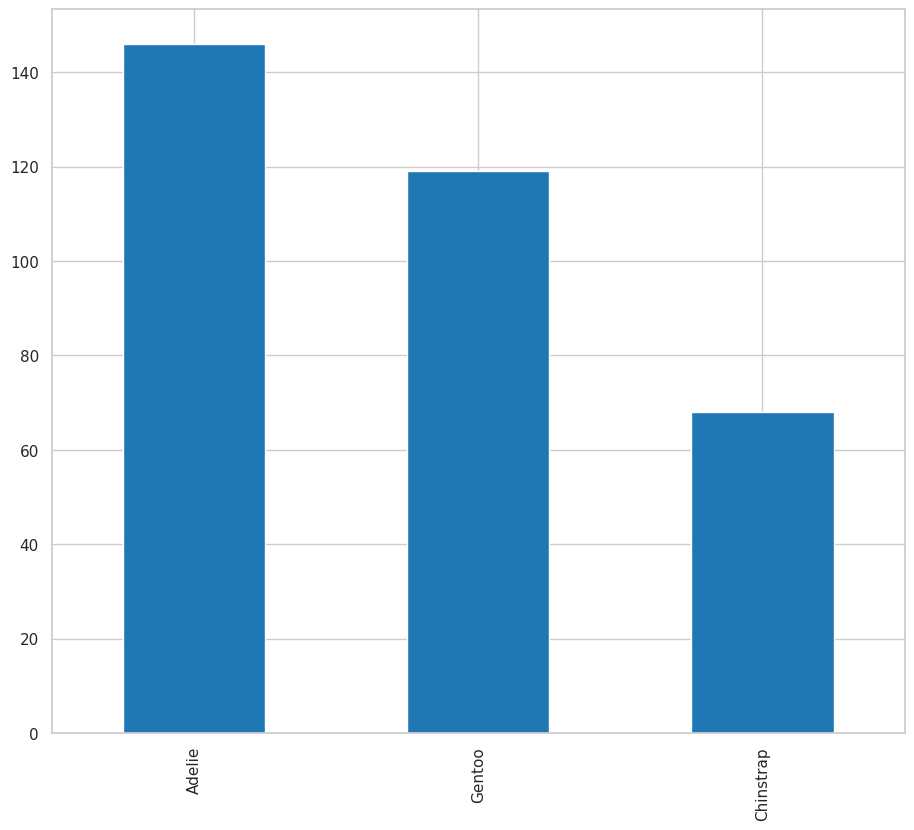

In [26]:
(
    processed_penguins_df
    .species
    .value_counts()
    .plot(
        kind='bar',
        # color=penguin_color.values()
    )
)

### Seaborn

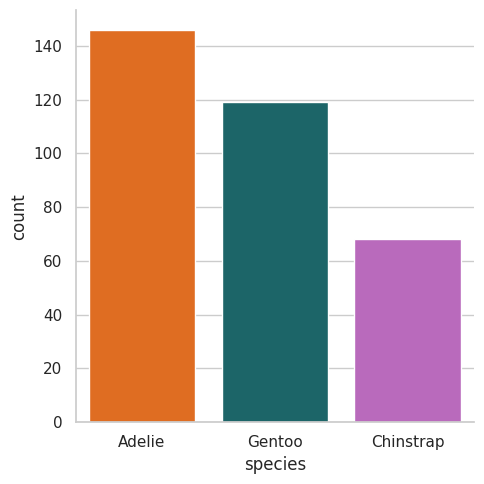

In [18]:
sns.catplot(
    data=processed_penguins_df,
    x='species',
    kind='count',
    palette=penguin_color, # Es una variable con la paleta de colores que definimos al inicio del notebook
    order=processed_penguins_df.value_counts('species', sort=True).index # Ordena los valores de mayor a menor
)

<Axes: xlabel='species', ylabel='count'>

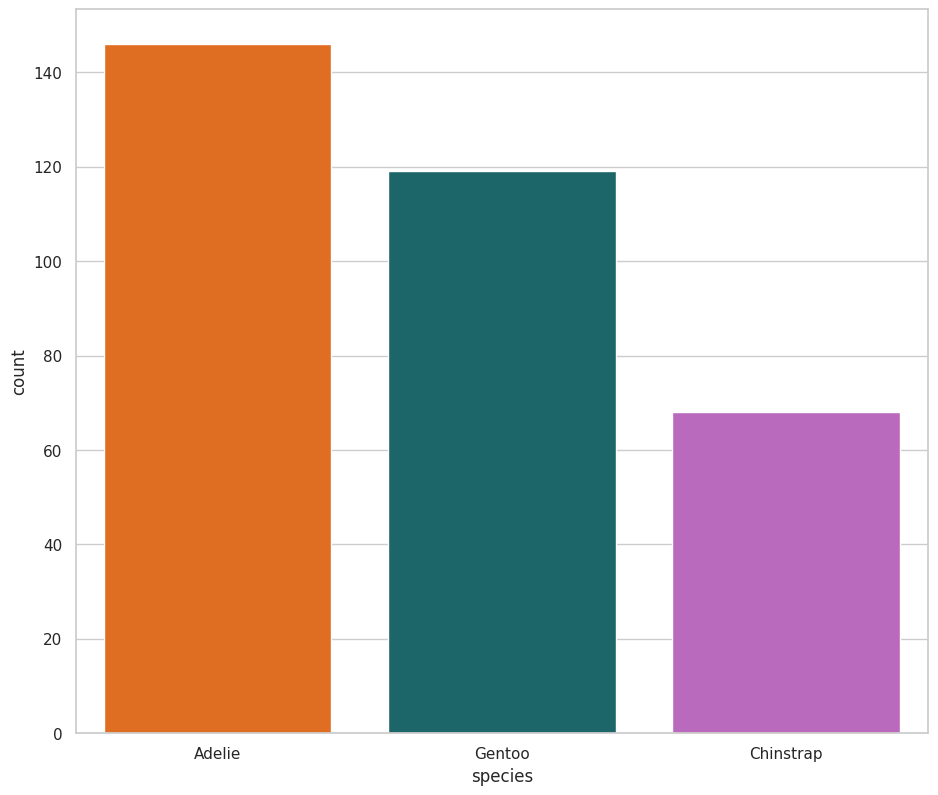

In [28]:
(
    processed_penguins_df
    .value_counts('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
                palette=penguin_color
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

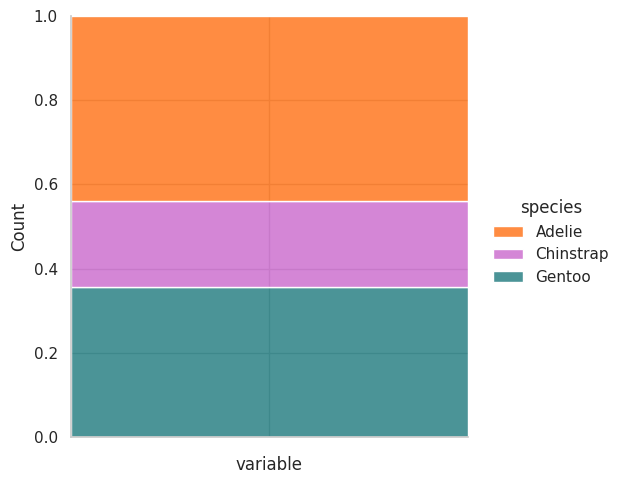

In [29]:
(
    processed_penguins_df
    .add_column('variable', '') # Agrego una columna vacia '' para agrupar por esta todas juntas y luego pintar por especie
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='variable', # Uso mi nueva columna como eje X para que todas estén en la misma.
                hue='species', # Y la separación dentro de la misma columna la marco por "hue" mediante la variable "species"
                multiple='fill', # Es para que el eje Y se orden en torno al 100% y no a valores absolutos y se apilen
                palette=penguin_color
            )
        )
    )
)

#### Challenge: explorar las otras dos variables categoricas que son "island" (isla de la que proviene el pinguino y "sex" que es el sexo del pinguino)

In [30]:
processed_penguins_df.dtypes


species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [31]:
# Sintaxis alternativa para un value_counts() usando la columna antes del método. A mí me gusta más
processed_penguins_df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [32]:
processed_penguins_df['sex'].value_counts()

Male      168
Female    165
Name: sex, dtype: int64

#### Voy a graficar ambas dist de frecuencia en dos subplots usando matplotlib


In [26]:
island_count = processed_penguins_df.value_counts('island', sort=True).reset_index(name='count')
island_count["variable"] = ""
island_count

island  count variable
0     Biscoe    163         
1      Dream    123         
2  Torgersen     47

In [27]:
sex_count = processed_penguins_df.value_counts('sex', sort=True).reset_index(name='count')
sex_count["variable"] = ""
sex_count

sex  count variable
0    Male    168         
1  Female    165

In [28]:
# @title Auxiliar Function for Bar Charts
def create_bottom_list(serie: pd.Series) -> list:
  bottom_list = []

  for i in range(len(serie)):
    if len(bottom_list) == 0:
      bottom_list.append(0)
      bottom_list.append(serie[i])
      continue
    else:
      bottom_list.append(serie[i] + bottom_list[i])

  bottom_list.pop()

  return bottom_list

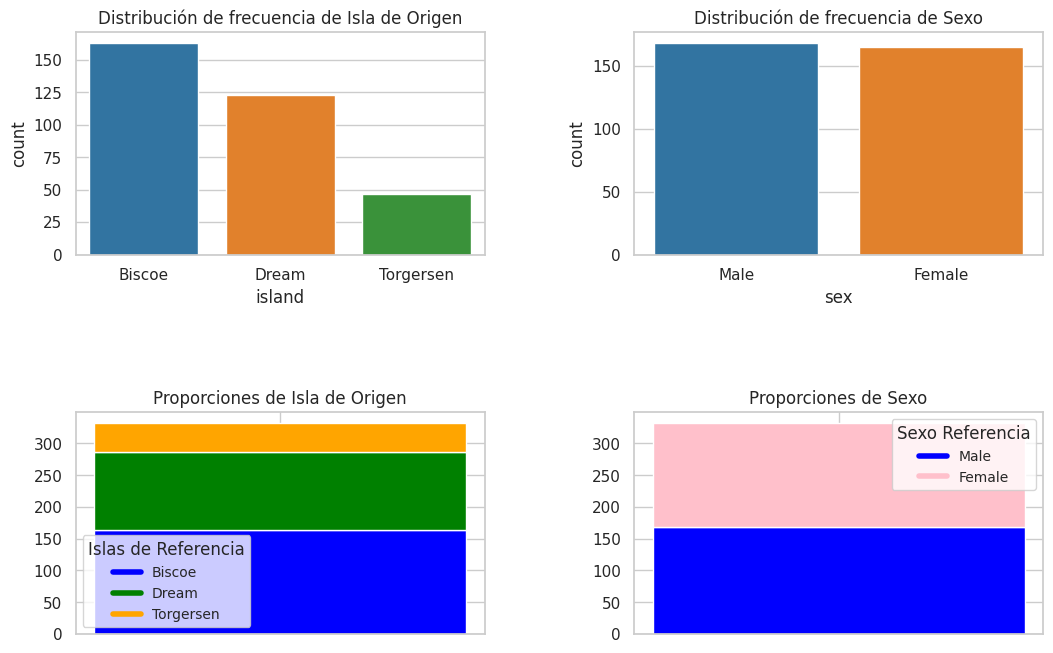

In [29]:
# Creo mi estructura de figura y graficos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(12, 8))

# Personalizar cada subplot
ax1.set_title('Distribución de frecuencia de Isla de Origen')
ax2.set_title('Distribución de frecuencia de Sexo')
ax3.set_title('Proporciones de Isla de Origen')
ax4.set_title('Proporciones de Sexo')

# Agrego contenido a cada subplot:
sns.barplot(data=island_count,
            x="island" ,
            y="count",
            ax=ax1)

sns.barplot(data=sex_count,
            x="sex" ,
            y="count",
            ax=ax2)

# Creo una lista de colores únicos para cada valor en la columna 'island'
colores_island = {'Biscoe': 'blue',
           'Dream': 'green',
           'Torgersen': 'orange'}

bottom_list = create_bottom_list(island_count["count"])

ax3.bar(data=island_count,
        x="variable",
        height="count",
        width=0.1,
        label="island",
        color=island_count['island'].map(colores_island),
        bottom=bottom_list)

# Creo una leyenda personalizada para los colores
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in colores_island.items()]
ax3.legend(handles=legend_labels, title="Islas de Referencia", fontsize="small")

# Creo una lista de colores únicos para cada valor en la columna 'sex'
colores_sex = {'Male': 'blue',
           'Female': 'pink',}

bottom_list = create_bottom_list(sex_count["count"])

ax4.bar(data=sex_count,
        x="variable",
        height="count",
        width=0.1,
        label="sex",
        color=sex_count['sex'].map(colores_sex),
        bottom=bottom_list)

# Creo una leyenda personalizada para los colores
legend_labels = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in colores_sex.items()]
ax4.legend(handles=legend_labels, title="Sexo Referencia", fontsize="small")

# Ajustar el espaciado entre subplots
plt.tight_layout(pad=5.0)

# Mostrar la figura
plt.show()

# Medidas de tendencia central

## Media o promedio

In [37]:
print(processed_penguins_df.bill_depth_mm.mean())
print()
print(np.mean(processed_penguins_df.bill_depth_mm))
print()
print(processed_penguins_df.mean())
print()

print(processed_penguins_df.median())
print()
print(processed_penguins_df.mode())
print()
print(processed_penguins_df.describe(include=object))
print()

17.164864864864864

17.164864864864864

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  
0       3800.0  Male  

       species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168



<ipython-input-37-a3e31cb204fd>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(processed_penguins_df.mean())
<ipython-input-37-a3e31cb204fd>:8: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(processed_penguins_df.median())


In [38]:
np.mean(processed_penguins_df.bill_depth_mm)

17.164864864864864

In [39]:
processed_penguins_df.mean()

<ipython-input-39-690398933604>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

## Mediana

In [40]:
processed_penguins_df.median()

<ipython-input-40-deb08da4cd61>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  processed_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

## Moda

In [41]:
processed_penguins_df.mode()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            41.1           17.0              190.0   

   body_mass_g   sex  
0       3800.0  Male

In [42]:
processed_penguins_df.describe(include=object)

species  island   sex
count      333     333   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       146     163   168

# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [43]:
processed_penguins_df.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
sex                       Male
dtype: object

## ¿Cuál es el valor mínimo de las variables?

In [44]:
processed_penguins_df.min()

species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
sex                  Female
dtype: object

## ¿Cuál es el rango de las variables?

In [45]:
processed_penguins_df.max(numeric_only=True) - processed_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [46]:
processed_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
dtype: float64

#### Para distribuciones normales, si yo tomo el promedio y, por un lado le sumo la desviación estandar y por el otro lado se la resto... En ese rango entre ambos valores voy a tener el 65% de mi población. Si a la desviación estandar la multiplico por 2 y hago lo mismo entonces cubriré el 95% de mi población y si la multiplico por 3 entonces cubriré el 99% de mi población.

In [47]:
processed_penguins_df.mean(numeric_only=True) - processed_penguins_df.std(numeric_only=True)

bill_length_mm         38.524124
bill_depth_mm          15.195629
flipper_length_mm     186.951202
body_mass_g          3401.841255
dtype: float64

In [48]:
processed_penguins_df.mean(numeric_only=True) + processed_penguins_df.std(numeric_only=True)

bill_length_mm         49.461461
bill_depth_mm          19.134100
flipper_length_mm     214.982732
body_mass_g          5012.272859
dtype: float64

**Rango del 65% de mi población tiene un largo de pico entre 38.5 y 49.5**

## ¿Cuál es el rango intercuartílico?

#### Tiene de útil que mide dispersión pero sin sesgos al evitar los outliers. En este sentido es similar a la mediana entre las medidas de tendencia central.

In [23]:
processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm         39.5
bill_depth_mm          15.6
flipper_length_mm     190.0
body_mass_g          3550.0
Name: 0.25, dtype: float64

In [24]:
processed_penguins_df.quantile(0.75, numeric_only=True)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
Name: 0.75, dtype: float64

In [51]:
# @title Rango Interquartilico utilizando Pandas
processed_penguins_df.quantile(0.75, numeric_only=True) - processed_penguins_df.quantile(0.25, numeric_only=True)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
dtype: float64

In [25]:
# @title Tabla para visualizar Quartiles y Rango Inter Quartilico
(
    processed_penguins_df
    .quantile(q=[0.75, 0.50, 0.25], numeric_only=True)
    .transpose()
    .rename_axis('metric')
    .reset_index()
    .assign(
        iqr = lambda df: df[0.75] - df[0.25]
    )
)

metric    0.75     0.5    0.25     iqr
0     bill_length_mm    48.6    44.5    39.5     9.1
1      bill_depth_mm    18.7    17.3    15.6     3.1
2  flipper_length_mm   213.0   197.0   190.0    23.0
3        body_mass_g  4775.0  4050.0  3550.0  1225.0

## ¿Cómo puedo visualizar la distribución de una variable?

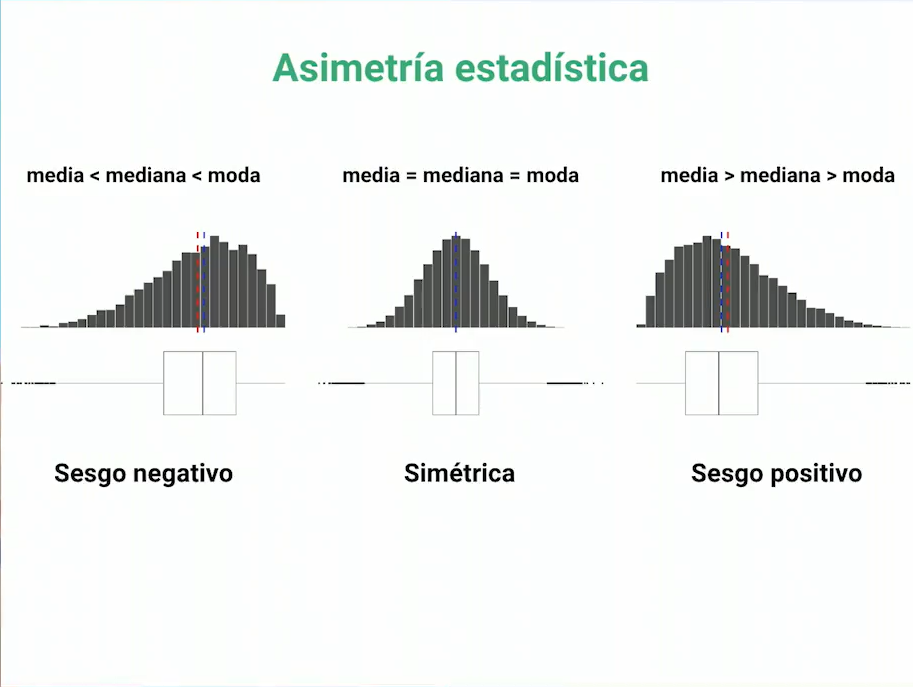

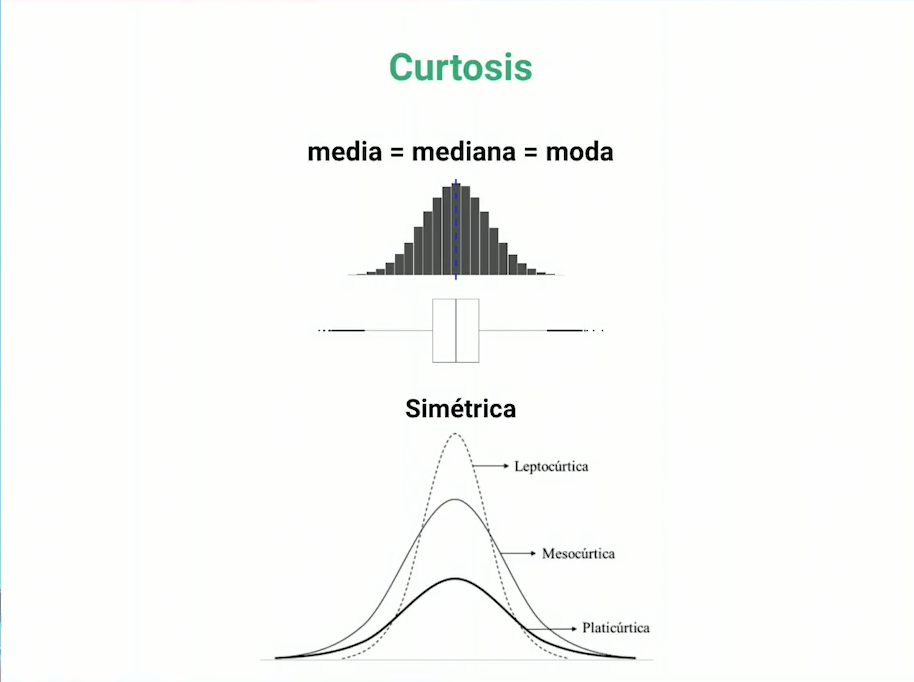

### Histograma

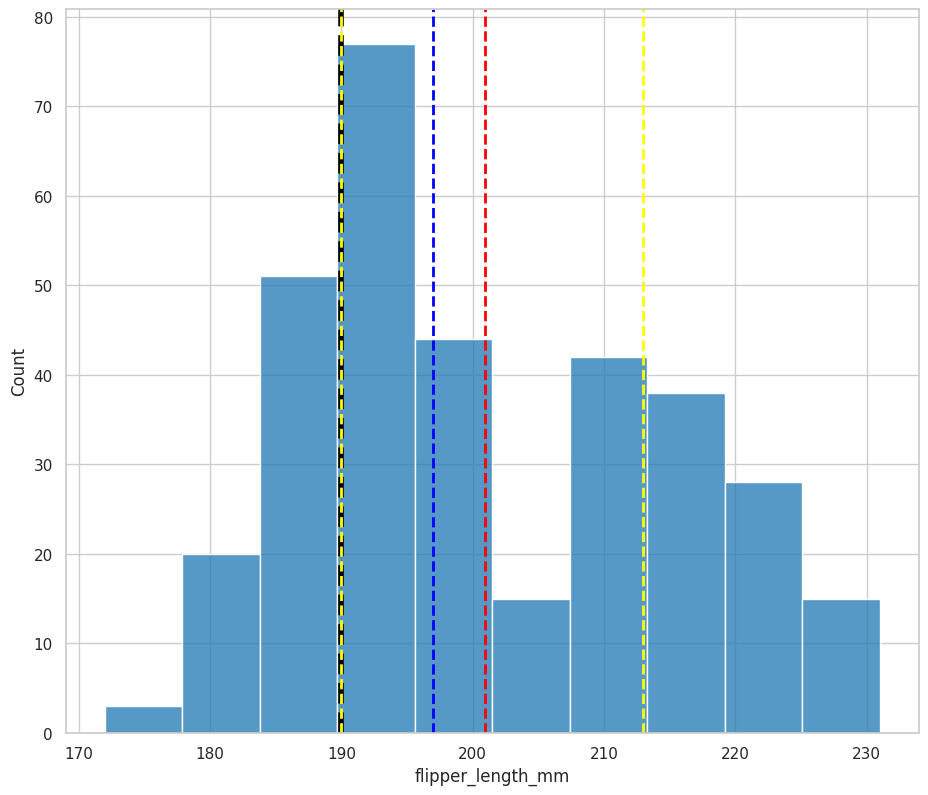

In [26]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

## Diagrama de caja / boxplot

<Axes: xlabel='flipper_length_mm'>

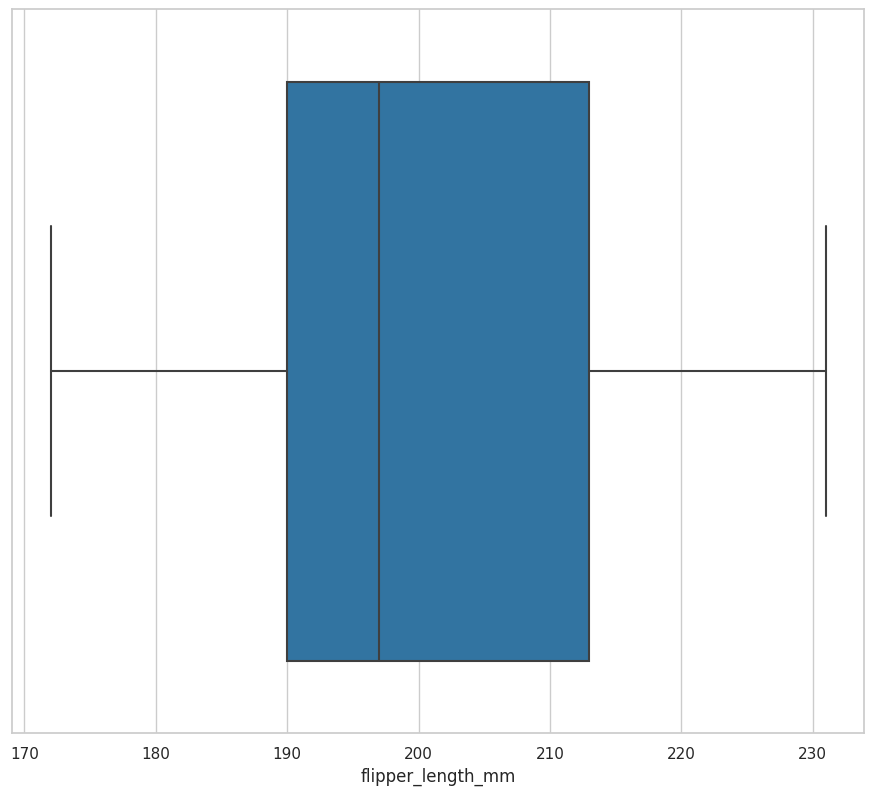

In [54]:
sns.boxplot(
    x=processed_penguins_df.flipper_length_mm,
)

## Limitaciones

In [55]:
def freedman_diaconis_bindwidth(x: pd.Series) -> float:
    """Find optimal bindwidth using Freedman-Diaconis rule."""

    IQR = x.quantile(0.75) - x.quantile(0.25)
    N = x.size

    return 2 * IQR / N ** (1 / 3)

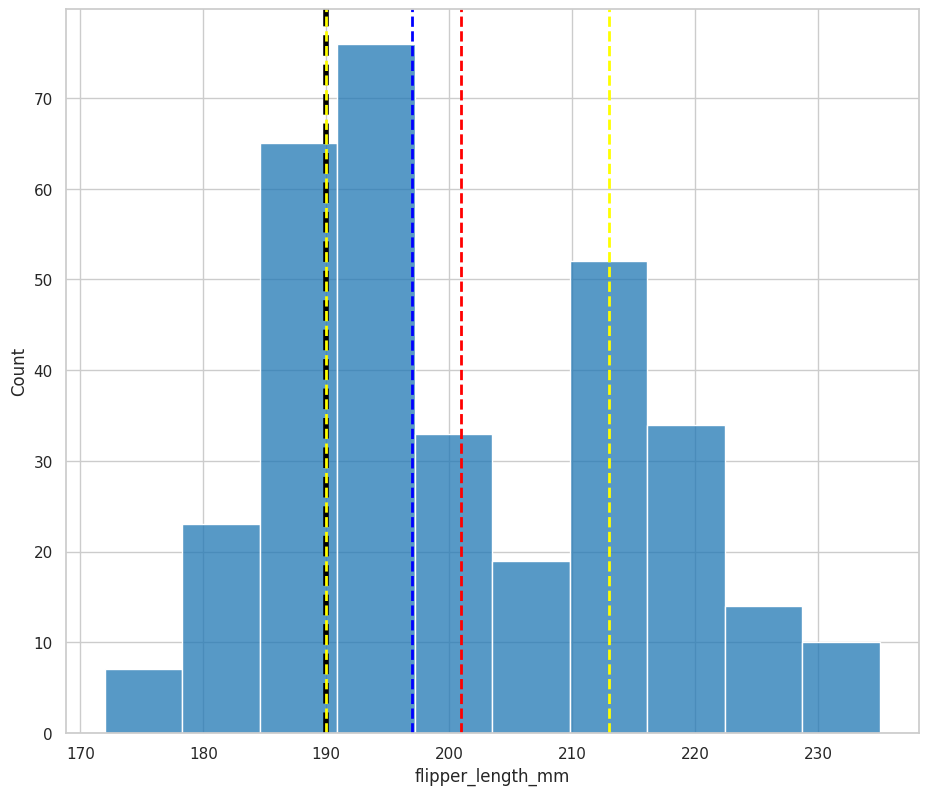

In [56]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=6.3
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.median(),
    color='blue',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.mode().values[0],
    color='black',
    linestyle='dashed',
    linewidth=4
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

plt.axvline(
    x=processed_penguins_df.flipper_length_mm.quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando seaborn

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

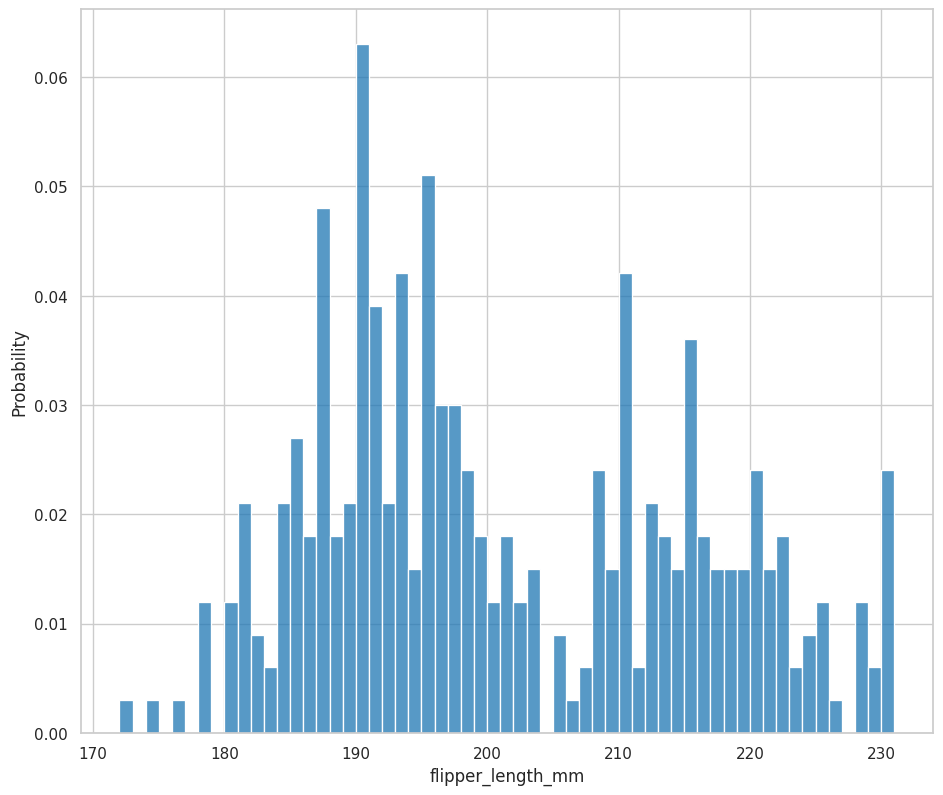

In [57]:
sns.histplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    binwidth=1, # Ancho del bin: Cuantos valores hay en cada bin. Alternativa a bins=x
    stat='probability'
)

##### Al usar el stat="probability" defino que no quiero ver la frecuencia como viene por default sino que quiero ver la "probabilidad".

### Utilizando empiricaldist

In [30]:
# @title Tabla de probabilidad de ocurrencia de cada caso
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

pmf_flipper_length_mm.head()

172.0    0.003003
174.0    0.003003
176.0    0.003003
Name: , dtype: float64

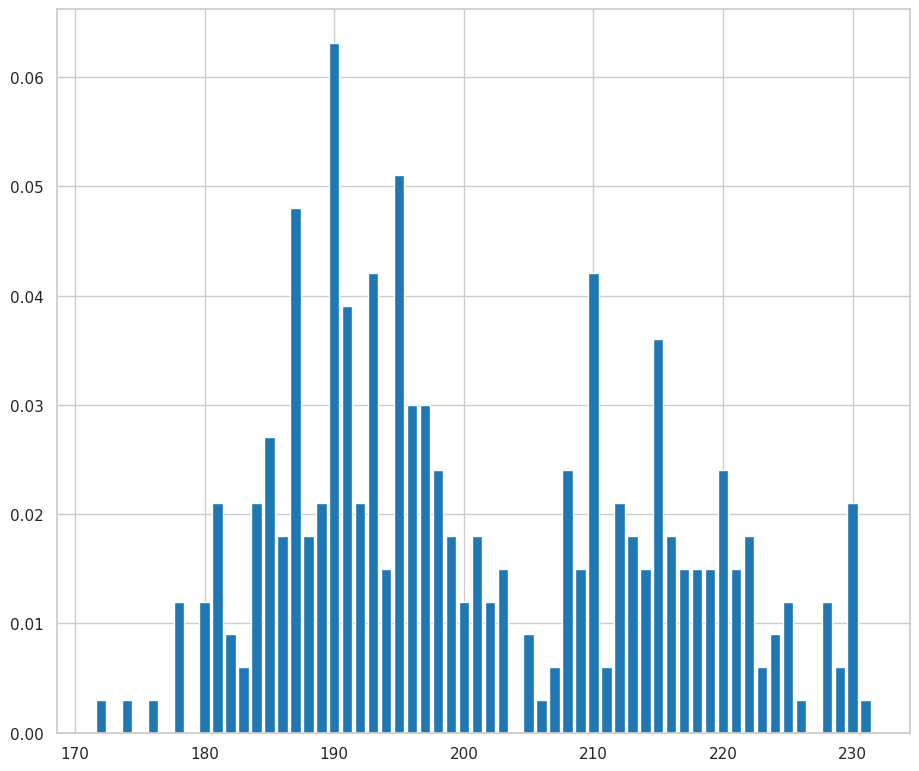

In [31]:
pmf_flipper_length_mm.bar()

In [60]:
pmf_flipper_length_mm(231)

0.003003003003003003

In [61]:
processed_penguins_df.flipper_length_mm.max()

231.0

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

##### ¿Cual es la probabilidad de que podamos encontrar un pinguino con un pico de 171 mm o menos? Responder usando un grafico para tales fines: ecdfplot() de seaborn.

La probabilidad siempre va a estar entre 0 y 1 o entre 0% y 100% de acuerdo a como queramos interpretarlo.

En este caso la probabilidad es de cero.

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

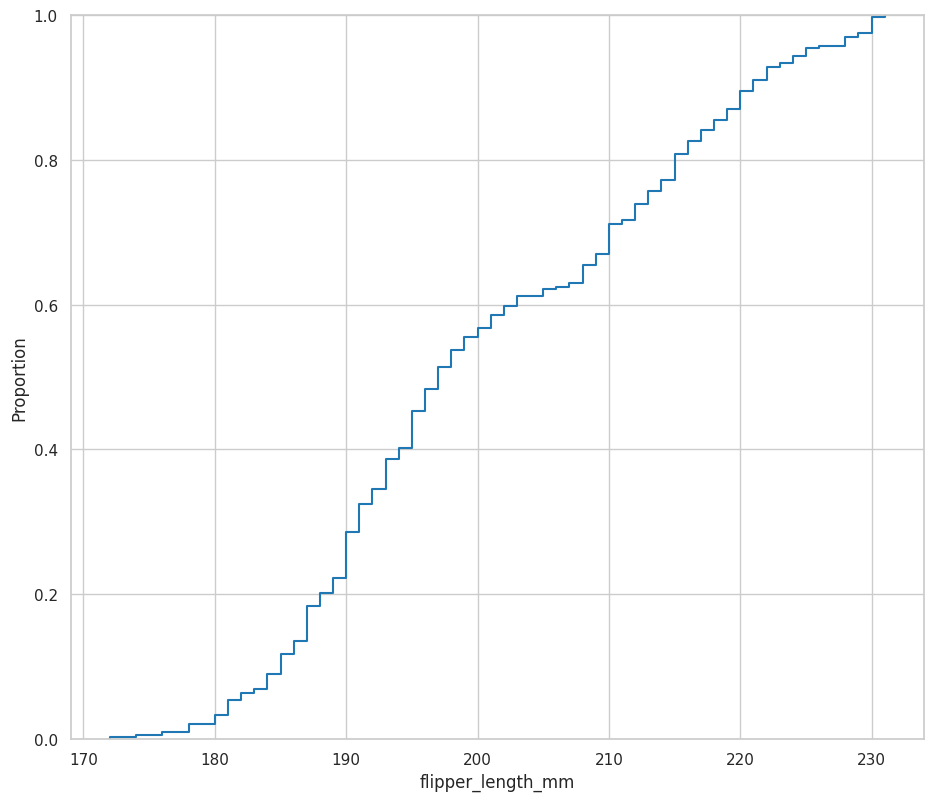

In [27]:
sns.ecdfplot(
    data=processed_penguins_df,
    x="flipper_length_mm"
)

### Utilizando empiricaldist

Hagamos lo mismo ahora pero usando empiricaldist...

In [28]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    processed_penguins_df.flipper_length_mm,
    normalize=True
)

cdf_flipper_length_mm

172.0    0.003003
174.0    0.006006
176.0    0.009009
178.0    0.021021
180.0    0.033033
181.0    0.054054
182.0    0.063063
183.0    0.069069
184.0    0.090090
185.0    0.117117
186.0    0.135135
187.0    0.183183
188.0    0.201201
189.0    0.222222
190.0    0.285285
191.0    0.324324
192.0    0.345345
193.0    0.387387
194.0    0.402402
195.0    0.453453
196.0    0.483483
197.0    0.513514
198.0    0.537538
199.0    0.555556
200.0    0.567568
201.0    0.585586
202.0    0.597598
203.0    0.612613
205.0    0.621622
206.0    0.624625
207.0    0.630631
208.0    0.654655
209.0    0.669670
210.0    0.711712
211.0    0.717718
212.0    0.738739
213.0    0.756757
214.0    0.771772
215.0    0.807808
216.0    0.825826
217.0    0.840841
218.0    0.855856
219.0    0.870871
220.0    0.894895
221.0    0.909910
222.0    0.927928
223.0    0.933934
224.0    0.942943
225.0    0.954955
226.0    0.957958
228.0    0.969970
229.0    0.975976
230.0    0.996997
231.0    1.000000
Name: , dtype: float64

La probabilidad de encontrar un pinguino con un pico de 200mm es de: 0.57%



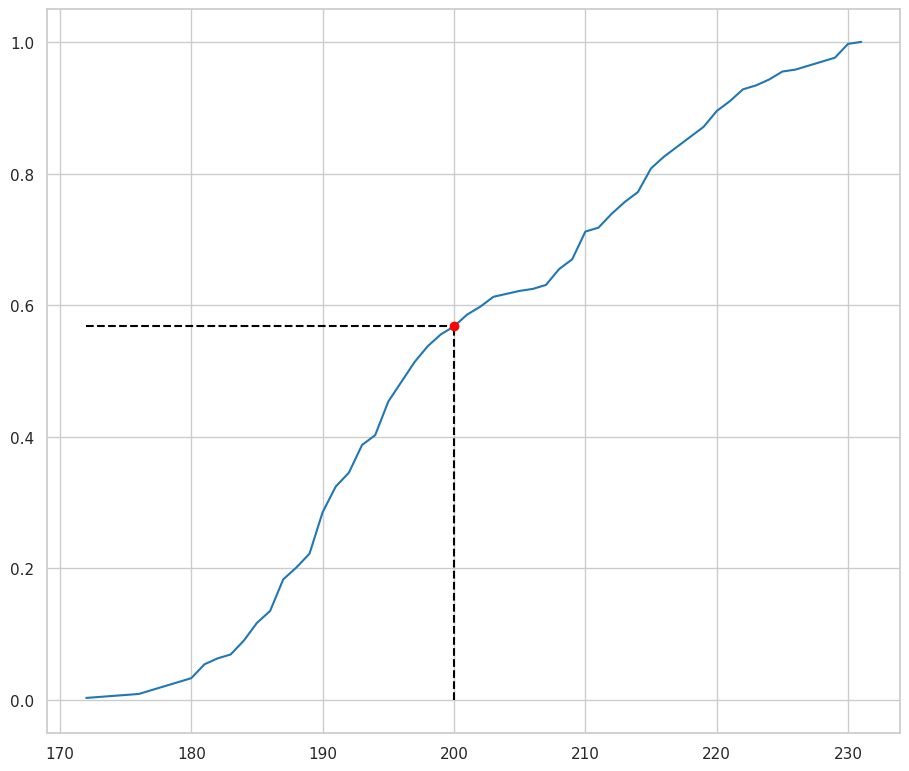

In [32]:
cdf_flipper_length_mm.plot()

q = 200 # Quiero encontrar pinguinos con picos que midan 200 mm o menos
p = float(cdf_flipper_length_mm.forward(q))

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

print(f"La probabilidad de encontrar un pinguino con un pico de {q}mm es de: {round(p,2)}%")
print()
plt.plot(q, p, 'ro')

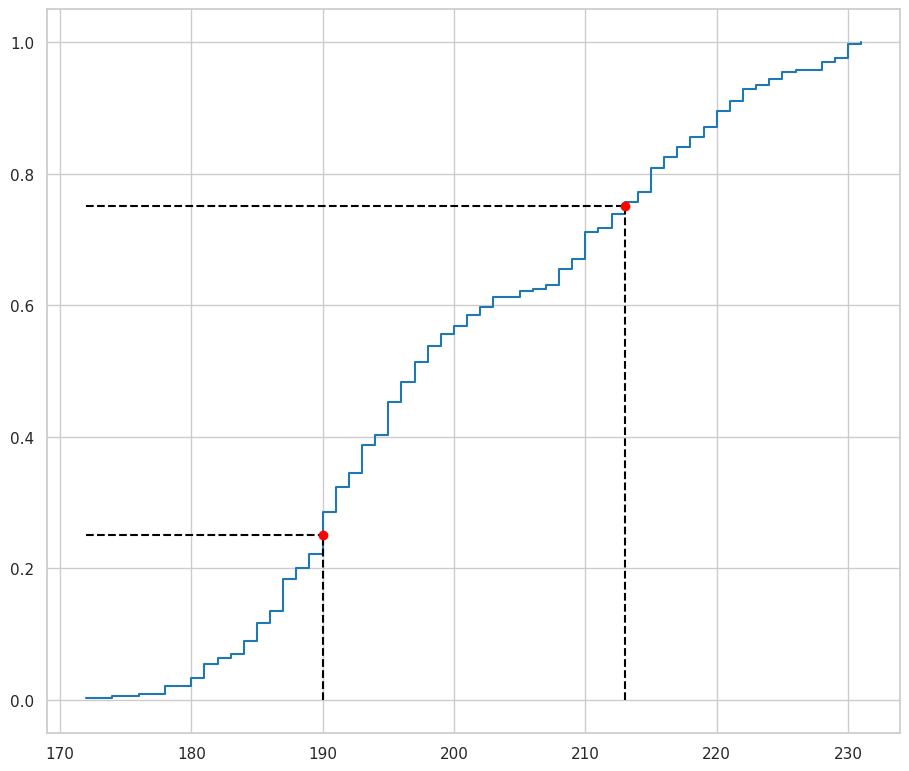

In [33]:
# @title Grafico el Rango Interquartil
cdf_flipper_length_mm.step()

p_1 = 0.25 # Specify probability
p_2 = 0.75

ps = (0.25, 0.75) # IQR
qs = cdf_flipper_length_mm.inverse(ps)

plt.vlines(
    x=qs,
    ymin=0,
    ymax=ps,
    color = 'black',
    linestyle='dashed'
)

plt.hlines(
    y=ps,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=qs,
    color='black',
    linestyle='dashed'
)

plt.scatter(
    x=qs,
    y=ps,
    color='red',
    zorder=2
)

### Comparando distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

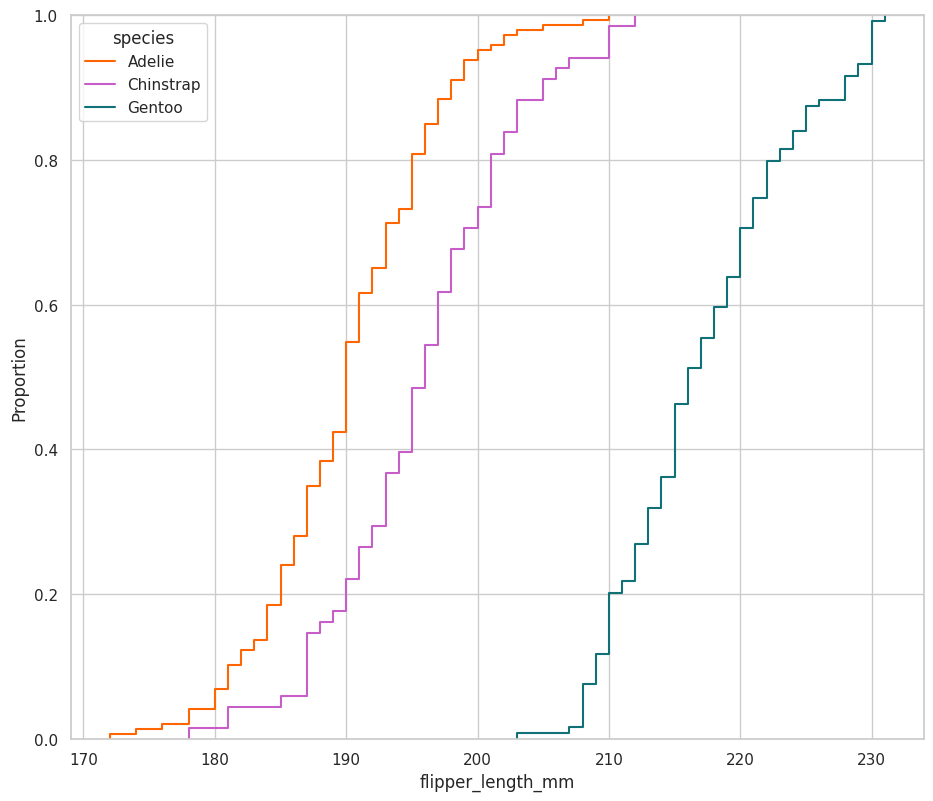

In [34]:
# @title Probabilidad acumulada y comparada
sns.ecdfplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

## Funciones de densidad de probabilidad

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

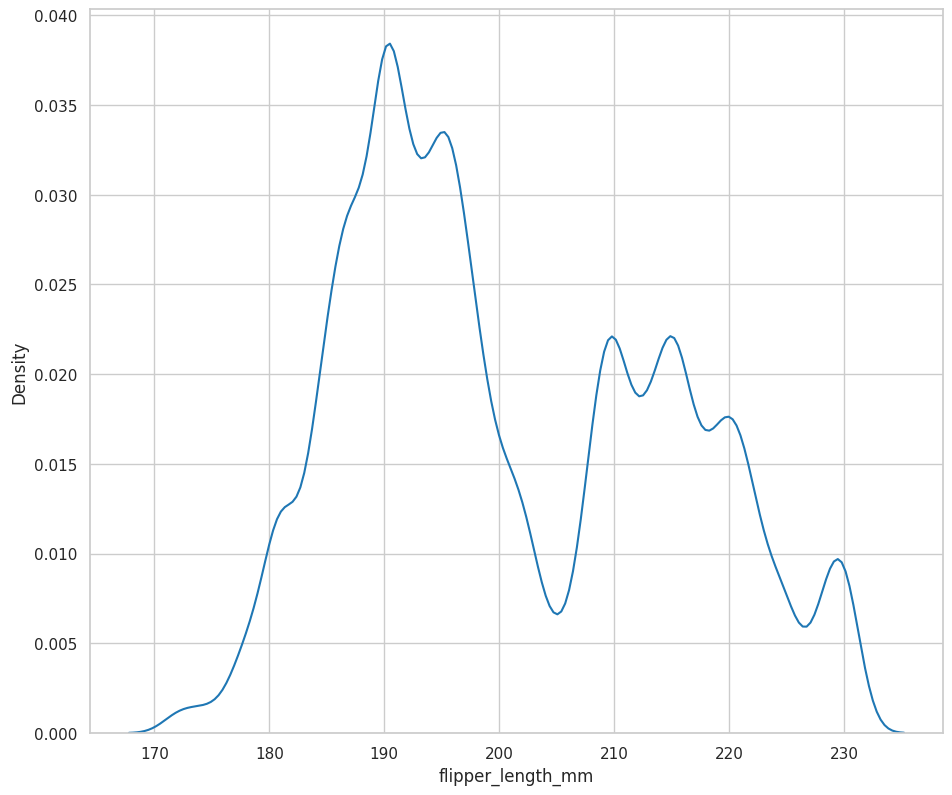

In [35]:
# @title Es un calculo de probabilidad continua que estima la probabilidad para valores faltantes entre 2 valores existentes.
sns.kdeplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    bw_method=0.1 # Marca el detalle de las curvas
)

In [68]:
processed_penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [36]:
stats = processed_penguins_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

<Axes: >

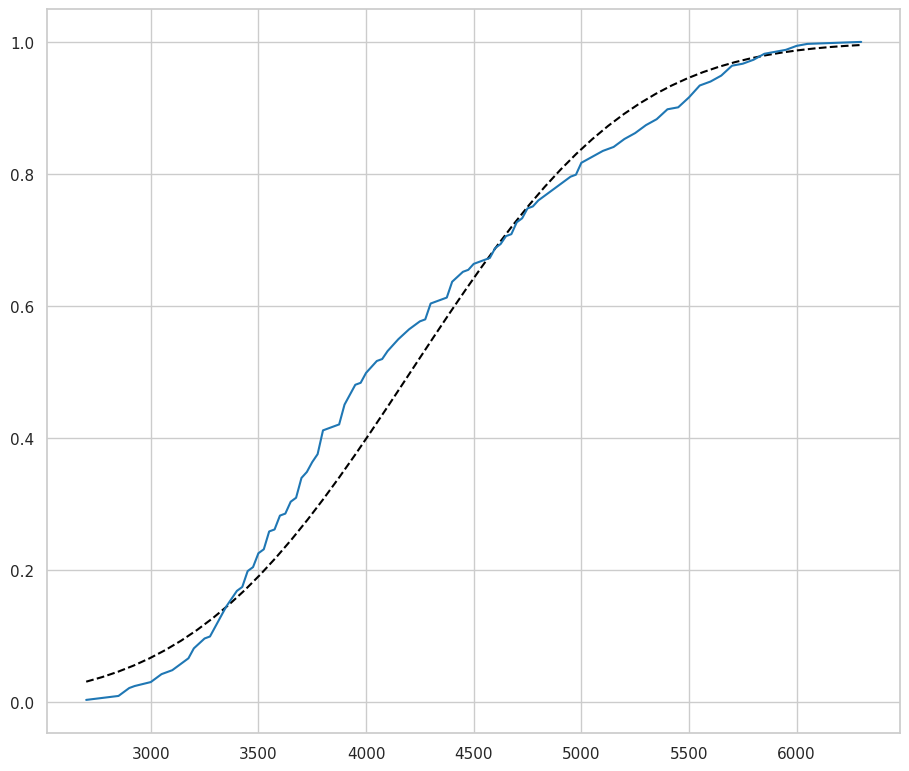

In [37]:
# @title Comparamos nuestros datos con como lucirían en una distribución normal
np.random.seed(42)
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

empiricaldist.Cdf.from_seq(
    processed_penguins_df.body_mass_g,
    normalize=True
).plot()

<Axes: xlabel='body_mass_g', ylabel='Density'>

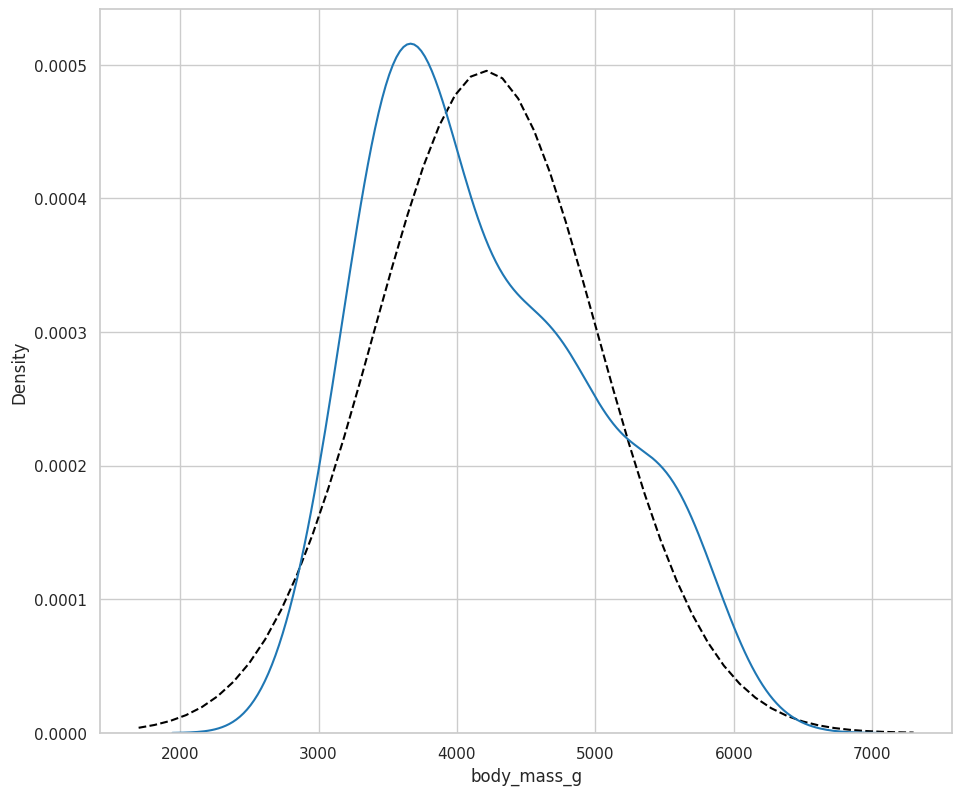

In [38]:
# @title Comprobación a partir de un mapa de densidad de que se trata de una distribución "bastante" normal
xs = np.linspace(stats['min']-1000, stats['max'] + 1000)
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)
plt.plot(xs, ys, color='black', linestyle='dashed')

sns.kdeplot(
    data=processed_penguins_df,
    x='body_mass_g'
)

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

*Esta ley sostiene que las probabilidades de que si las condiciones de base son las mismas, las probabilidades de obtener distintos resultados serán las mismas cuando se ejecuta un experimento determinada muchas veces. A mayor cantidad de ejecuciones más aumenta esa probabilidad. Ejemplo: Si tiro un dado perfectamente creado 10 veces seguramente tenga más resultados de uno que de otro, pero esto va a homegeneizarse si lo tiro 100 veces y más aún con 1000, etc. Probemoslo*

**La probabilidad experimental tiende a la probabilidad teórica a medida que aumenta el número de repeticiones del experimento**

In [39]:
from random import choices
from collections import Counter

[3, 6, 4, 6, 6, 4, 2, 5, 4, 2]
Counter({6: 3, 4: 3, 2: 2, 3: 1, 5: 1})
[3, 6, 4, 2, 5]


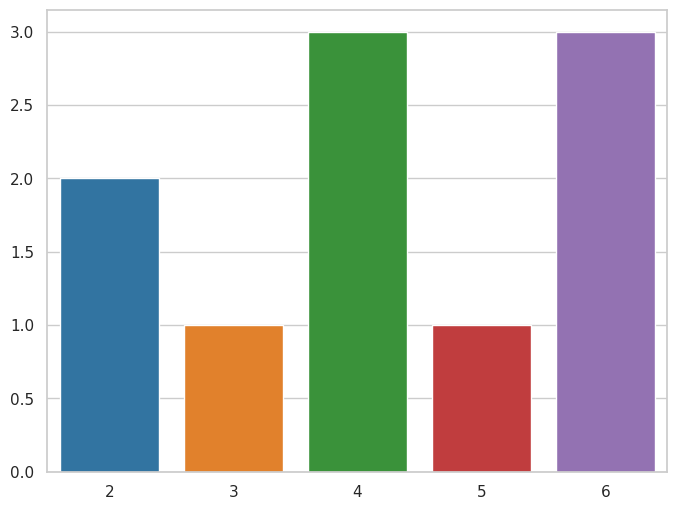

In [40]:
# @title Tiro un dado 10 veces y veo las frecuencias de su resultado
dado = [1,2,3,4,5,6]
resultados = []

for i in range(10):
  resultados.append(choices(dado)[0])

print(resultados)

cuenta = Counter(resultados)

print(cuenta)

print(list(cuenta.keys()))

plt.figure(figsize=(8,6))
sns.barplot(x=list(cuenta.keys()),
            y=list(cuenta.values()))
plt.show()

[4, 6, 5, 4, 6, 3, 2, 1, 3, 2, 4, 4, 2, 2, 5, 6, 1, 6, 1, 2, 3, 6, 5, 4, 1, 3, 1, 4, 1, 2, 6, 5, 1, 6, 2, 4, 4, 4, 5, 6, 2, 1, 6, 2, 1, 2, 6, 6, 2, 2, 2, 4, 3, 2, 4, 2, 5, 5, 6, 4, 6, 1, 5, 3, 1, 3, 3, 6, 1, 1, 4, 2, 6, 3, 2, 2, 5, 4, 4, 5, 5, 2, 6, 3, 3, 2, 5, 5, 4, 1, 4, 6, 6, 4, 3, 5, 1, 6, 6, 4]
Counter({6: 20, 2: 20, 4: 19, 1: 15, 5: 14, 3: 12})
[4, 6, 5, 3, 2, 1]


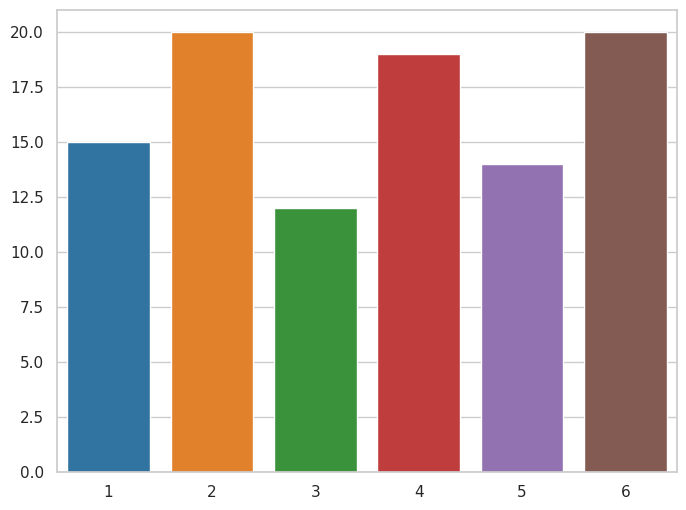

In [41]:
# @title Tiro un dado 100 veces y veo las frecuencias de su resultado
dado = [1,2,3,4,5,6]
resultados = []

for i in range(100):
  resultados.append(choices(dado)[0])

print(resultados)

cuenta = Counter(resultados)

print(cuenta)

print(list(cuenta.keys()))

plt.figure(figsize=(8,6))
sns.barplot(x=list(cuenta.keys()),
            y=list(cuenta.values()))
plt.show()

[6, 5, 5, 5, 6, 4, 1, 4, 6, 5, 1, 5, 6, 4, 1, 1, 6, 2, 6, 6, 4, 1, 6, 6, 1, 4, 5, 2, 1, 3, 4, 2, 2, 1, 5, 3, 3, 4, 2, 6, 4, 6, 2, 1, 2, 4, 1, 2, 3, 5, 5, 4, 1, 3, 4, 2, 4, 2, 4, 3, 4, 5, 2, 3, 5, 5, 4, 2, 1, 6, 5, 5, 6, 3, 6, 6, 1, 2, 6, 4, 2, 2, 5, 6, 1, 1, 3, 6, 3, 5, 6, 2, 4, 2, 1, 3, 3, 3, 2, 1, 5, 1, 1, 3, 2, 1, 2, 4, 2, 5, 5, 3, 1, 3, 1, 5, 2, 2, 3, 1, 2, 3, 6, 3, 1, 2, 3, 4, 1, 3, 4, 6, 2, 5, 4, 1, 5, 6, 1, 4, 3, 2, 4, 5, 3, 3, 3, 2, 1, 3, 5, 4, 1, 4, 1, 1, 2, 2, 3, 3, 6, 4, 6, 6, 5, 6, 6, 3, 3, 5, 6, 5, 3, 2, 1, 5, 2, 3, 6, 3, 6, 1, 2, 3, 1, 4, 6, 1, 3, 4, 6, 2, 4, 5, 3, 4, 5, 6, 6, 5, 2, 5, 2, 1, 6, 5, 1, 6, 4, 5, 3, 4, 3, 4, 6, 4, 5, 6, 4, 4, 1, 3, 6, 6, 4, 4, 1, 4, 4, 1, 4, 3, 1, 2, 5, 3, 4, 4, 3, 6, 6, 4, 5, 2, 3, 3, 6, 1, 6, 2, 5, 1, 5, 1, 6, 6, 2, 6, 4, 3, 4, 5, 4, 3, 2, 5, 6, 3, 5, 3, 1, 2, 1, 4, 5, 4, 1, 1, 2, 3, 2, 4, 2, 3, 5, 2, 5, 1, 4, 3, 5, 3, 6, 6, 2, 6, 1, 1, 6, 6, 6, 5, 1, 3, 2, 4, 2, 2, 2, 6, 4, 3, 5, 4, 2, 5, 5, 5, 6, 4, 3, 1, 3, 1, 2, 1, 5, 3, 2, 6, 2, 6, 5, 

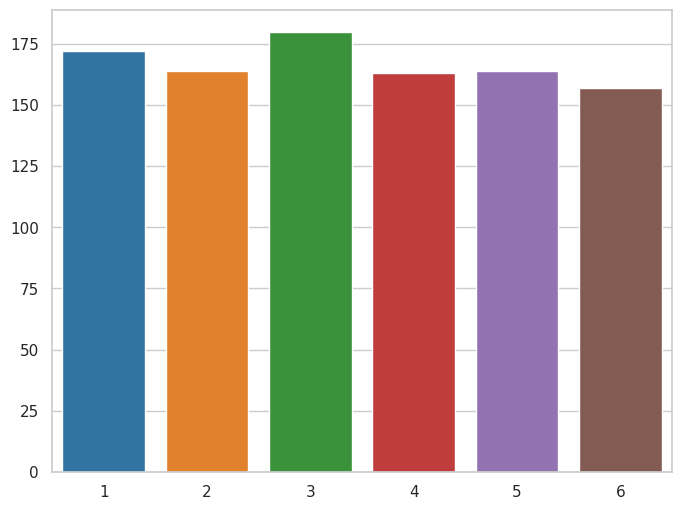

In [42]:
# @title Tiro un dado 1000 veces y veo las frecuencias de su resultado
dado = [1,2,3,4,5,6]
resultados = []

for i in range(1000):
  resultados.append(choices(dado)[0])

print(resultados)

cuenta = Counter(resultados)

print(cuenta)

print(list(cuenta.keys()))

plt.figure(figsize=(8,6))
sns.barplot(x=list(cuenta.keys()),
            y=list(cuenta.values()))
plt.show()

[5, 5, 5, 3, 1, 6, 6, 6, 6, 2, 1, 1, 3, 1, 2, 3, 3, 3, 5, 6, 6, 3, 3, 4, 1, 1, 5, 4, 2, 2, 5, 5, 6, 6, 3, 5, 5, 2, 2, 3, 2, 6, 6, 2, 3, 4, 5, 1, 6, 3, 3, 3, 2, 1, 6, 6, 2, 6, 5, 6, 5, 2, 4, 1, 5, 1, 4, 5, 2, 6, 5, 5, 1, 1, 2, 3, 1, 2, 5, 3, 3, 6, 5, 4, 6, 6, 6, 4, 4, 4, 6, 2, 2, 5, 1, 2, 1, 2, 6, 5, 5, 1, 2, 4, 2, 4, 5, 3, 1, 2, 5, 1, 3, 3, 2, 1, 4, 1, 1, 1, 4, 5, 2, 1, 1, 1, 6, 3, 5, 3, 5, 5, 1, 4, 3, 6, 6, 5, 4, 4, 2, 4, 4, 6, 4, 6, 5, 5, 2, 2, 6, 3, 4, 5, 1, 1, 3, 1, 4, 4, 1, 6, 5, 2, 6, 4, 5, 4, 5, 5, 5, 3, 6, 4, 4, 1, 6, 4, 3, 1, 5, 4, 6, 2, 5, 2, 1, 1, 1, 2, 3, 6, 1, 1, 2, 4, 2, 4, 2, 6, 2, 3, 1, 3, 5, 2, 4, 2, 3, 1, 3, 4, 1, 3, 1, 6, 2, 2, 2, 4, 4, 5, 2, 4, 6, 2, 6, 5, 1, 6, 3, 2, 4, 2, 6, 4, 4, 2, 4, 6, 1, 6, 5, 1, 2, 5, 3, 1, 2, 2, 1, 3, 4, 6, 1, 5, 3, 5, 4, 3, 5, 3, 5, 4, 5, 5, 6, 1, 2, 1, 4, 6, 2, 5, 3, 2, 2, 6, 4, 5, 2, 1, 6, 3, 6, 1, 5, 6, 6, 3, 3, 1, 6, 4, 6, 3, 5, 5, 5, 3, 2, 5, 2, 2, 1, 3, 1, 4, 6, 4, 5, 6, 3, 6, 3, 4, 5, 5, 4, 6, 2, 6, 3, 5, 4, 3, 2, 3, 1, 2, 4, 1, 1, 

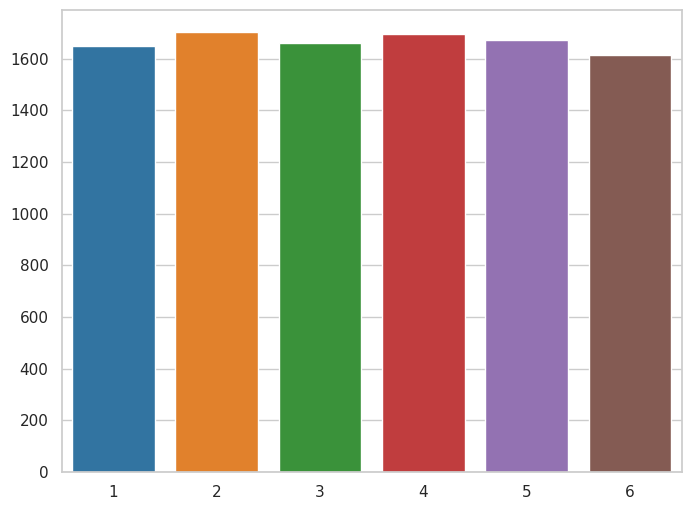

In [43]:
# @title Tiro un dado 10000 veces y veo las frecuencias de su resultado
dado = [1,2,3,4,5,6]
resultados = []

for i in range(10000):
  resultados.append(choices(dado)[0])

print(resultados)

cuenta = Counter(resultados)

print(cuenta)

print(list(cuenta.keys()))

plt.figure(figsize=(8,6))
sns.barplot(x=list(cuenta.keys()),
            y=list(cuenta.values()))
plt.show()

[4, 1, 3, 3, 5, 4, 1, 3, 4, 3, 5, 6, 3, 6, 2, 1, 1, 6, 2, 5, 6, 3, 1, 1, 4, 1, 5, 3, 6, 5, 5, 4, 2, 3, 6, 4, 3, 4, 4, 1, 6, 4, 1, 6, 1, 5, 5, 3, 4, 3, 3, 2, 5, 5, 2, 3, 3, 3, 2, 4, 6, 3, 2, 5, 6, 1, 4, 1, 5, 6, 2, 3, 2, 3, 1, 2, 1, 3, 5, 1, 5, 4, 3, 6, 2, 6, 2, 3, 4, 3, 5, 3, 2, 1, 4, 3, 5, 1, 6, 5, 4, 3, 6, 1, 4, 4, 3, 5, 3, 3, 3, 5, 5, 2, 1, 2, 5, 3, 6, 2, 4, 6, 3, 4, 2, 6, 5, 5, 5, 3, 5, 4, 3, 4, 2, 6, 4, 2, 6, 4, 6, 1, 2, 4, 6, 5, 1, 4, 3, 1, 5, 5, 3, 6, 5, 1, 4, 4, 5, 1, 3, 5, 6, 6, 2, 6, 2, 2, 2, 4, 2, 1, 3, 1, 6, 1, 5, 4, 1, 4, 4, 5, 4, 3, 1, 5, 1, 3, 5, 6, 4, 4, 2, 2, 3, 3, 5, 2, 4, 1, 1, 2, 3, 6, 3, 4, 6, 2, 2, 1, 4, 5, 4, 6, 5, 6, 5, 2, 6, 6, 5, 5, 3, 3, 4, 1, 3, 2, 2, 3, 4, 4, 5, 4, 2, 4, 5, 4, 6, 2, 1, 6, 2, 4, 1, 2, 2, 2, 4, 2, 5, 6, 1, 6, 4, 5, 4, 2, 4, 3, 6, 2, 5, 1, 4, 5, 3, 6, 1, 6, 6, 6, 6, 2, 3, 1, 2, 4, 3, 1, 5, 5, 1, 2, 1, 4, 2, 5, 5, 2, 4, 6, 6, 5, 3, 6, 3, 5, 5, 2, 5, 6, 5, 6, 4, 5, 6, 1, 2, 1, 2, 6, 6, 3, 4, 3, 6, 1, 4, 4, 3, 2, 6, 6, 2, 3, 1, 5, 4, 4, 2, 1, 4, 

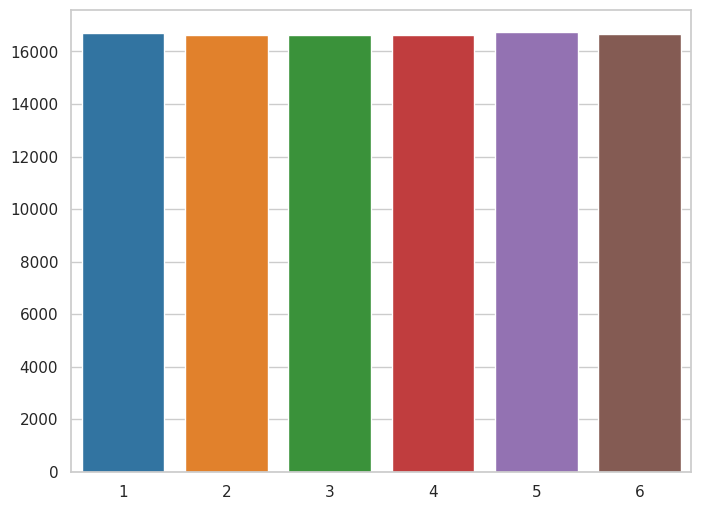

In [44]:
# @title Tiro un dado 100000 veces y veo las frecuencias de su resultado
dado = [1,2,3,4,5,6]
resultados = []

for i in range(100000):
  resultados.append(choices(dado)[0])

print(resultados)

cuenta = Counter(resultados)

print(cuenta)

print(list(cuenta.keys()))

plt.figure(figsize=(8,6))
sns.barplot(x=list(cuenta.keys()),
            y=list(cuenta.values()))
plt.show()

**Queda en evidencia la veracidad de la ley de los grandes numeros**

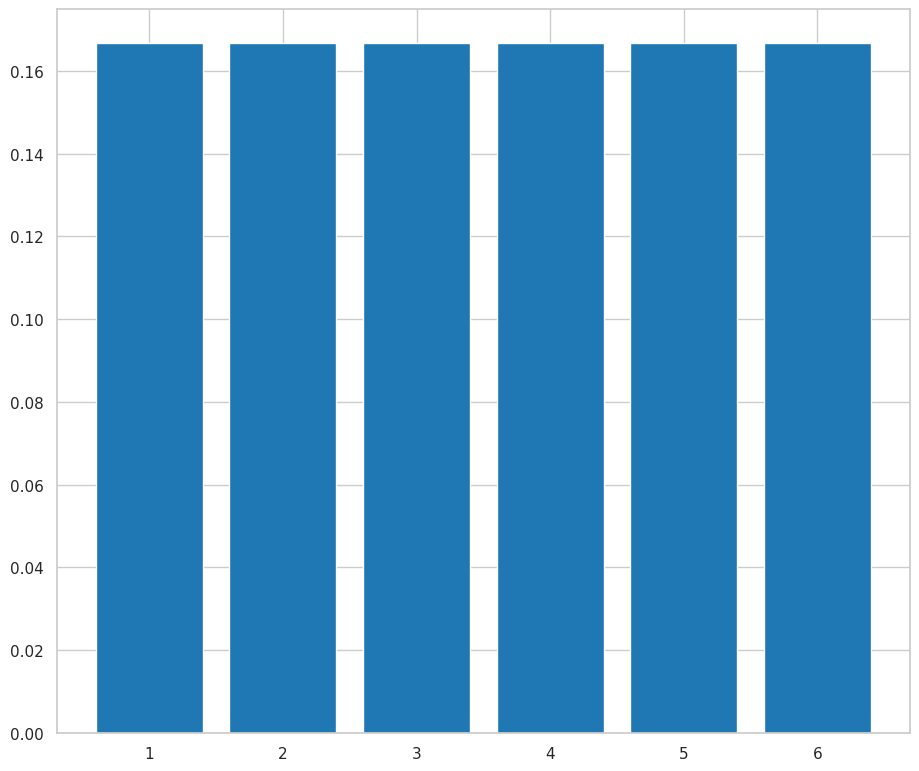

In [45]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])
dice.bar()

In [79]:
int(1e2)

100

In [80]:
int(1e3)

1000

In [81]:
int(1e4)

10000

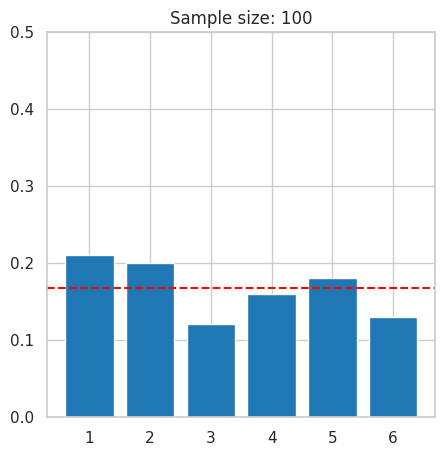

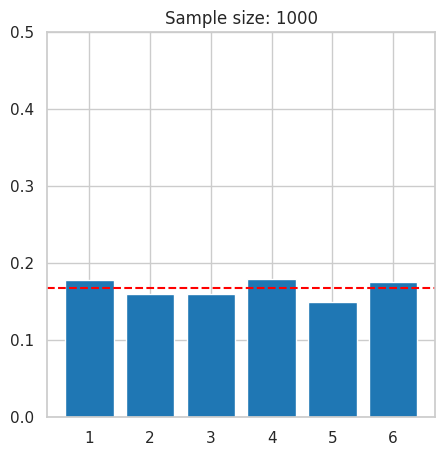

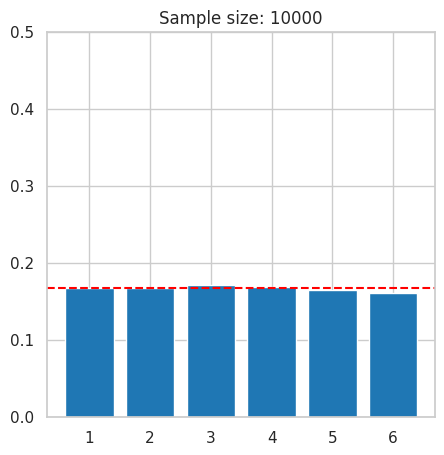

In [46]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f"Sample size: {sample_size}")


## Teorema del límite central

El Teorema del Límite Central es un concepto importante en estadísticas que establece que, cuando sumas un gran número de variables aleatorias independientes e idénticamente distribuidas (IID), la distribución de esa suma se aproximará a una distribución normal, sin importar la forma de la distribución original de las variables aleatorias.

En términos sencillos, esto significa que, a medida que tomas más y más muestras de una población y calculas la media de esas muestras, la distribución de esas medias se parecerá cada vez más a una distribución normal (de campana). Esto es útil porque nos permite hacer suposiciones sobre la distribución de las medias de muestras, incluso cuando no conocemos la forma de la distribución original.

Dos ejemplos simples:

1. Lanzamiento de un dado:
   Supongamos que lanzas un dado justo (con 6 caras) y registras la puntuación. Luego, repites este proceso muchas veces, calculas la media de las puntuaciones en cada conjunto de lanzamientos y graficas esas medias. A medida que tomas más muestras (lanzas el dado más veces), la distribución de esas medias se acercará a una distribución normal, independientemente de la forma de la distribución de las puntuaciones individuales.

2. Altura de estudiantes:
   Imagina que mides la altura de estudiantes en una escuela y tomas muestras aleatorias de 30 estudiantes a la vez. Calculas la media de altura en cada muestra. A medida que tomas más muestras y calculas más medias, la distribución de esas medias se aproximará a una distribución normal, incluso si la altura de los estudiantes en la población original no sigue una distribución normal.

En ambos ejemplos, el Teorema del Límite Central te permite hacer suposiciones sobre las medias de las muestras, como calcular intervalos de confianza o realizar pruebas de hipótesis, asumiendo una distribución normal, lo que facilita el análisis estadístico en muchas situaciones prácticas.

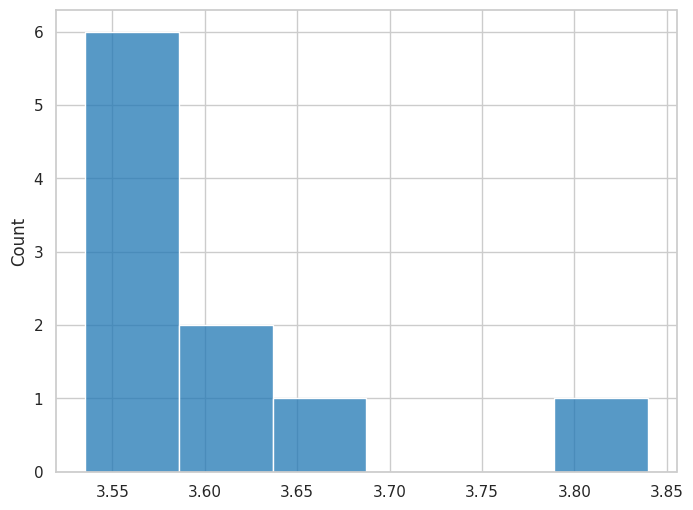

In [47]:
# @title Ejemplo del dado

dado = [1,2,3,4,5,6]
resultados = []
medias = []

for j in range(10):
  for i in range(100):
    resultados.append(choices(dado)[0])
  medias.append(np.array(resultados).mean())

plt.figure(figsize=(8,6))
sns.histplot(x=medias)
plt.show()

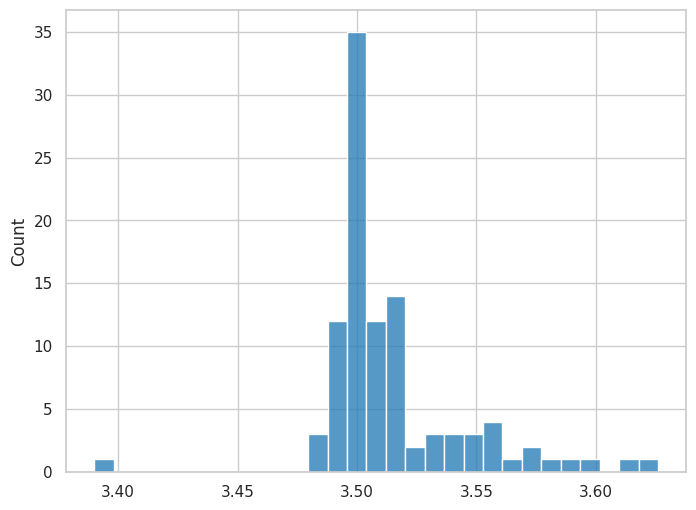

In [48]:
# @title Ejemplo del dado

dado = [1,2,3,4,5,6]
resultados = []
medias = []

for j in range(100):
  for i in range(100):
    resultados.append(choices(dado)[0])
  medias.append(np.array(resultados).mean())

plt.figure(figsize=(8,6))
sns.histplot(x=medias)
plt.show()

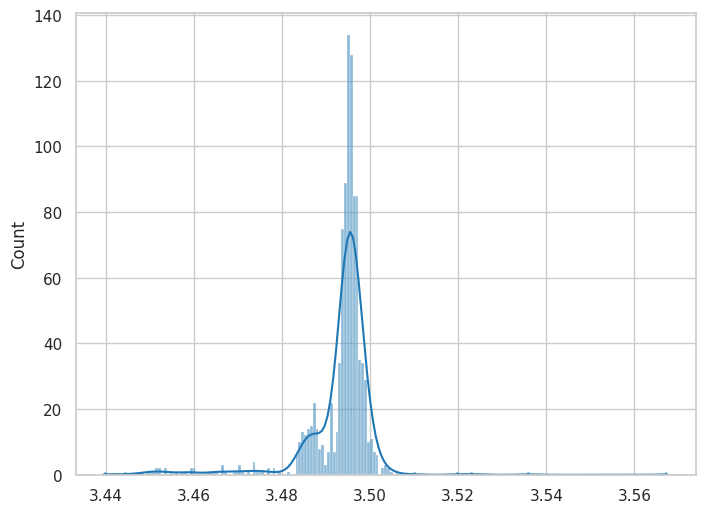

In [52]:
# @title Ejemplo del dado

dado = [1,2,3,4,5,6]
resultados = []
medias = []

for j in range(1000):
  for i in range(100):
    resultados.append(choices(dado)[0])
  medias.append(np.array(resultados).mean())

plt.figure(figsize=(8,6))
sns.histplot(x=medias,
             kde=True)
plt.show()

*Apliquemos ahora el teorema del limite central al sexo de los pinguinos*

In [50]:
processed_penguins_df.sex.value_counts(normalize=True)

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

In [51]:
sex_numeric = processed_penguins_df.sex.replace(['Male', 'Female'], [1, 0])

In [53]:
number_samples = 1000
sample_size = 35

np.random.seed(42)

# definimos el DataFrame en blanco con su tamaño definido
samples_df = pd.DataFrame(np.random.randint(1, sample_size, size =(sample_size, number_samples)))

# Le asignamos nombres a las columnas.
col_names = []
for i in range(1, number_samples + 1):
    col_names.append(f"sample_{i}")
samples_df.columns = col_names


for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample

male_population_mean = samples_df.mean().mean()
print(f"El porcentaje estimado de pingüinos machos en la población es: {male_population_mean * 100:.4f}%")

El porcentaje estimado de pingüinos machos en la población es: 50.7629%


**Aplicar el teorema del limite central nos puede acercar muchisimo a los valores reales de la población en una variable especifica si sacamos una pequeña muestra, calculamos la media, repetimos el procemiento multiples veces y luego calculamos la media de medias**

*En el ejemplo vemos como la media de medias de las multiples muestras de pinguinos me arrojan una distribución de pinguinos machos y hembras muy cercana a la que vimos en la población*

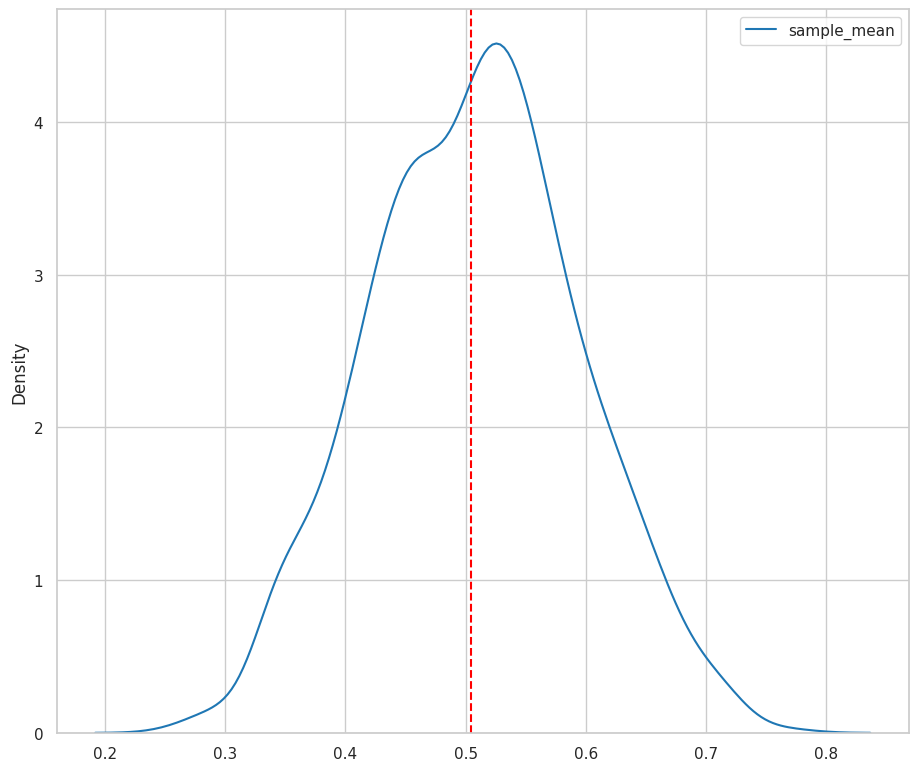

In [54]:
# @title Comprobación de que la distribución de las medias de cada muestra tiene un comportamiento similar al de una distribución normal.
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [55]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)

(0.30450450450450445, 0.7045045045045044)

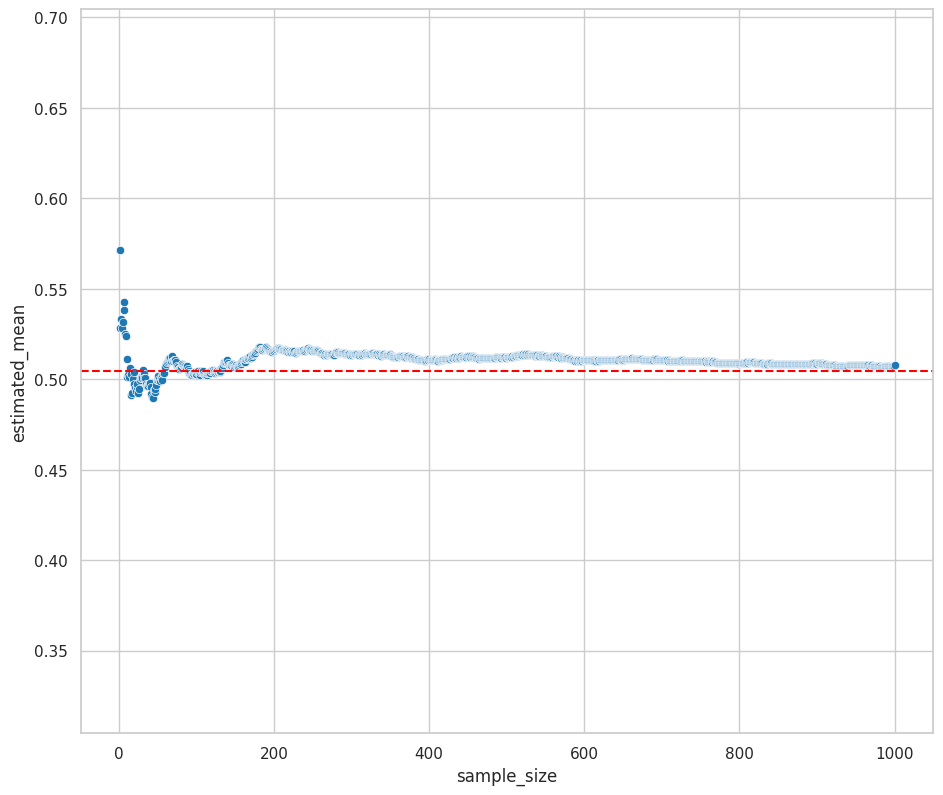

In [57]:
# @title Mientras incrementamos el tamaño de la muestra el valor de la media de medias se va acercando cada vez más a la media de la población.
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim([sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Análisis Bivariado:
# Estableciendo relaciones: Gráfica de puntos

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

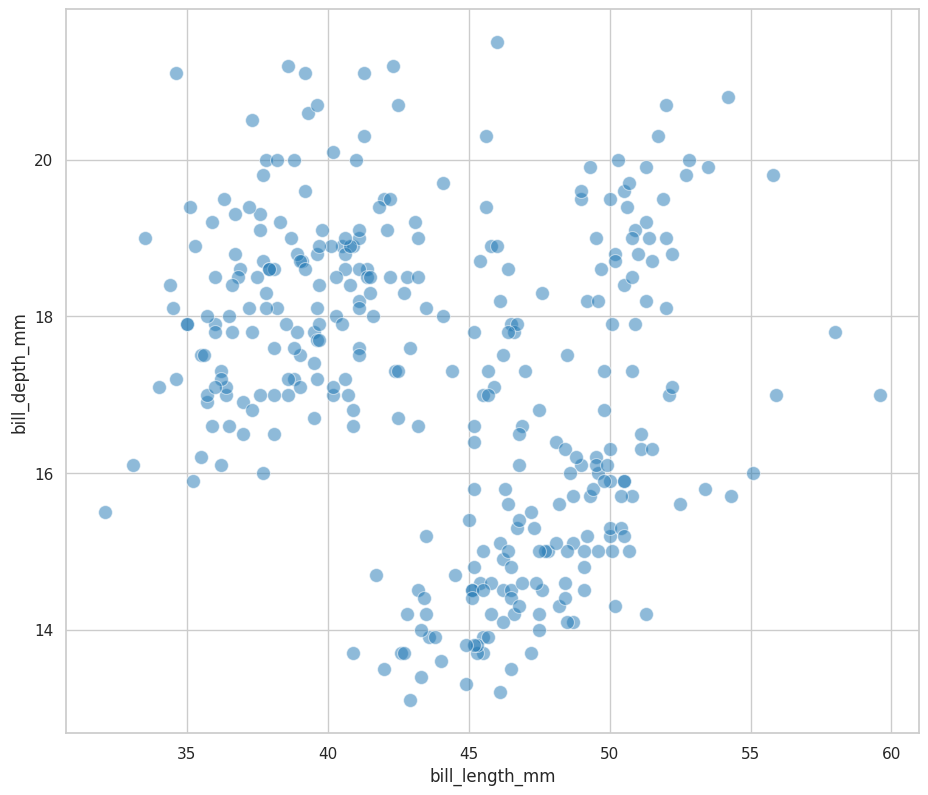

In [58]:
# @title Scatterplot
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    alpha=1/2, # Parametro para controlar la intensidad del color de los puntos. Para que se vea bien nitido le pido 2 casos en cada punto
    s=100 # Parametro para controlar el tamaño de los puntos.
)

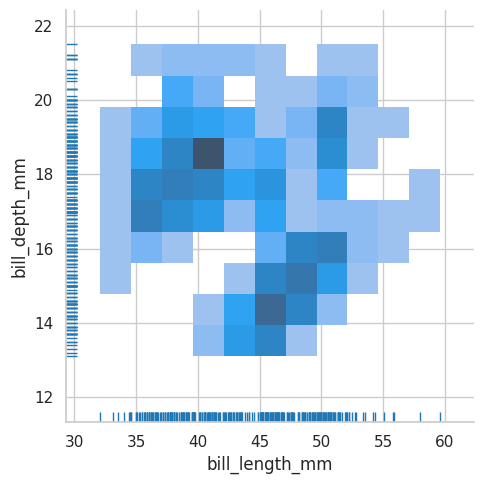

In [59]:
# @title Displot o Histograma de dos dimensiones
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True # Parametro para sumar en cada eje el nivel de concentración de casos por valores.
)

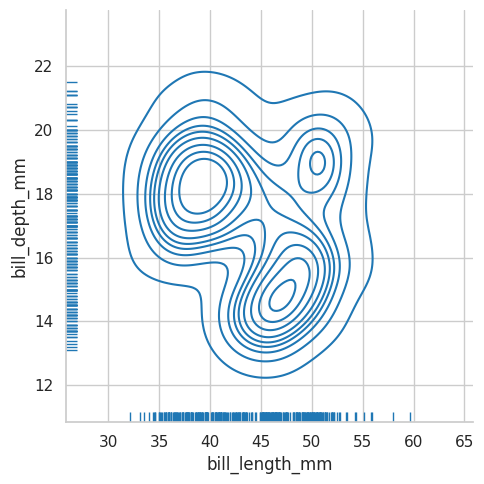

In [60]:
# @title Mapa de densidad de dos dimensiones. Los circulos más pequeños son los de mayor concentración.
sns.displot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    kind='kde', # Parametro para transformar el Displot o Histograma de dos dimensiones en un Mapa de densidad de dos dimensiones.
    rug=True
)

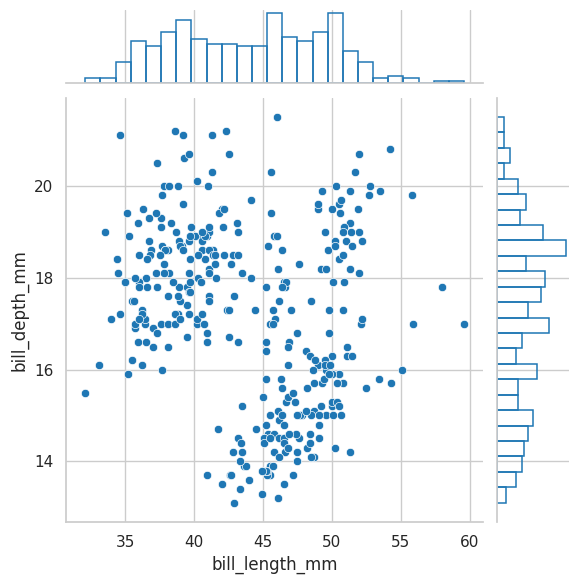

In [61]:
# @title Joinplot = Scatterplot + 2 Histogramas: 1 por cada eje.
sns.jointplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    marginal_kws=dict(bins=25, fill=False) # Desde acá manejo los parametros de los histogramas
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<Axes: xlabel='species', ylabel='flipper_length_mm'>

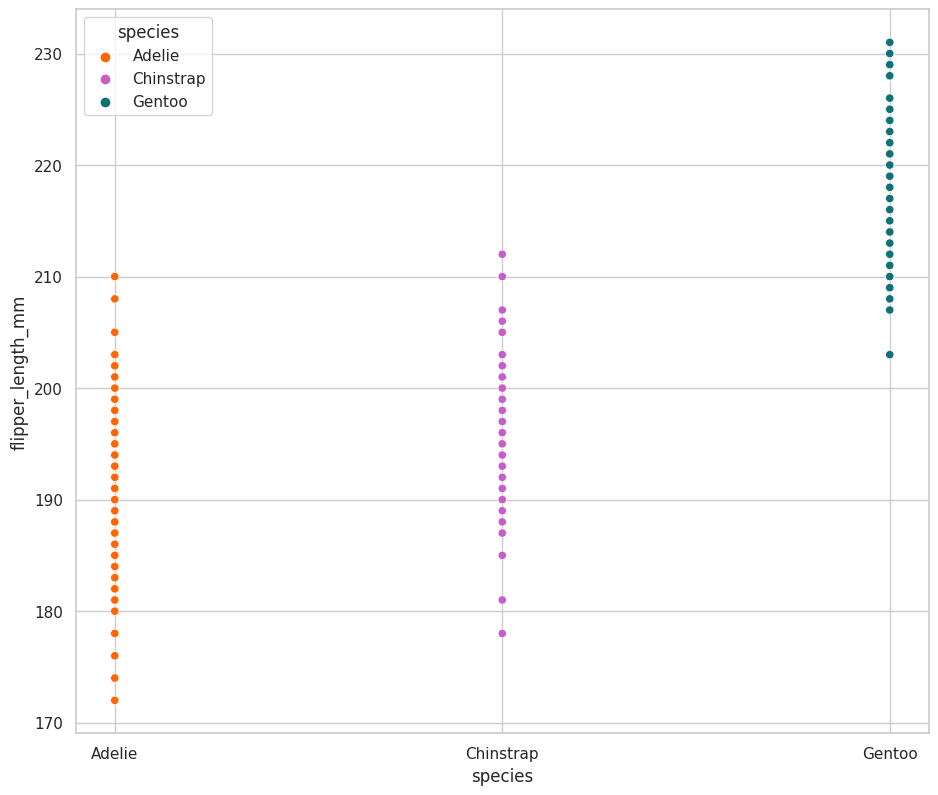

In [62]:
# @title Scatterplot con variable categórica sobre el eje X:
sns.scatterplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

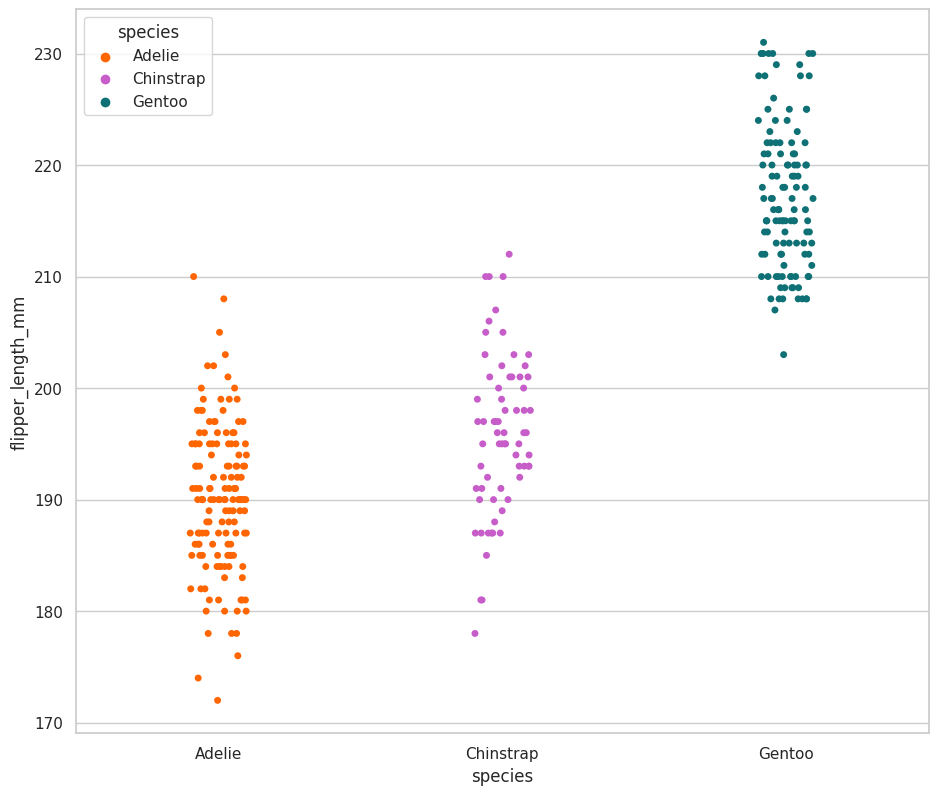

In [63]:
# @title Stripplot: Similar al Scatterplot categórico pero con detalle de cuantos puntos tengo en cada valor del eje Y.
sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

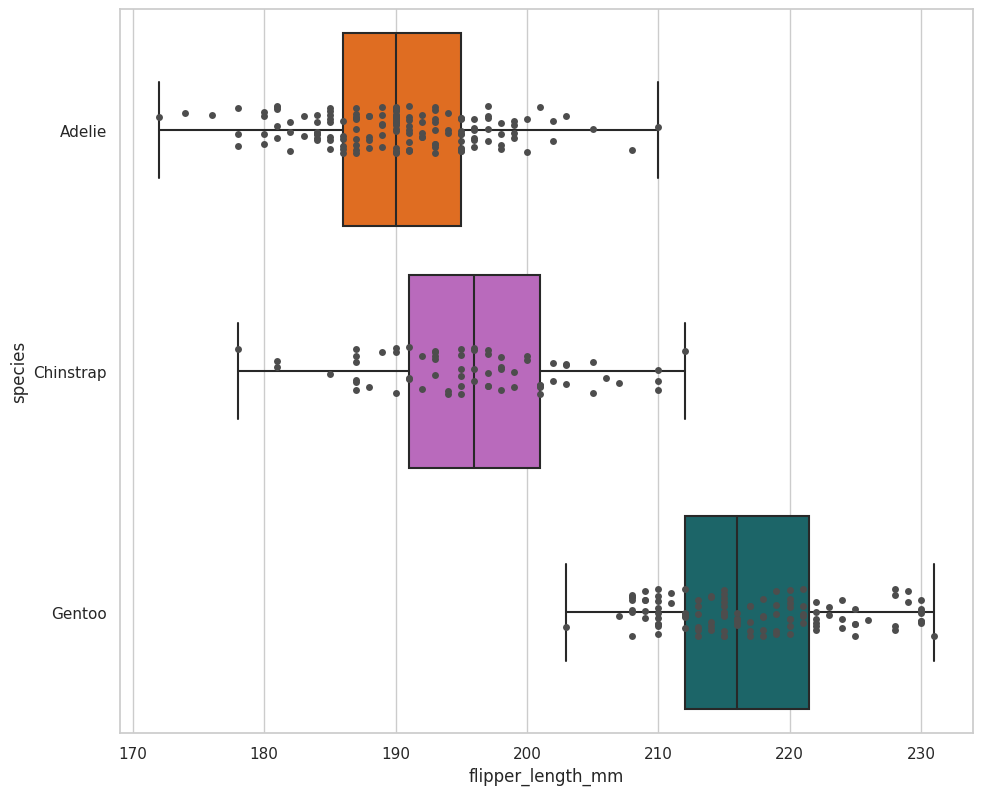

In [64]:
# @title Boxplot combinado con Stripplot
ax = sns.boxplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    palette=penguin_color,
    whis=np.inf
)

ax = sns.stripplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='species',
    color='.3'
)

<ipython-input-65-212ecb50c502>:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(


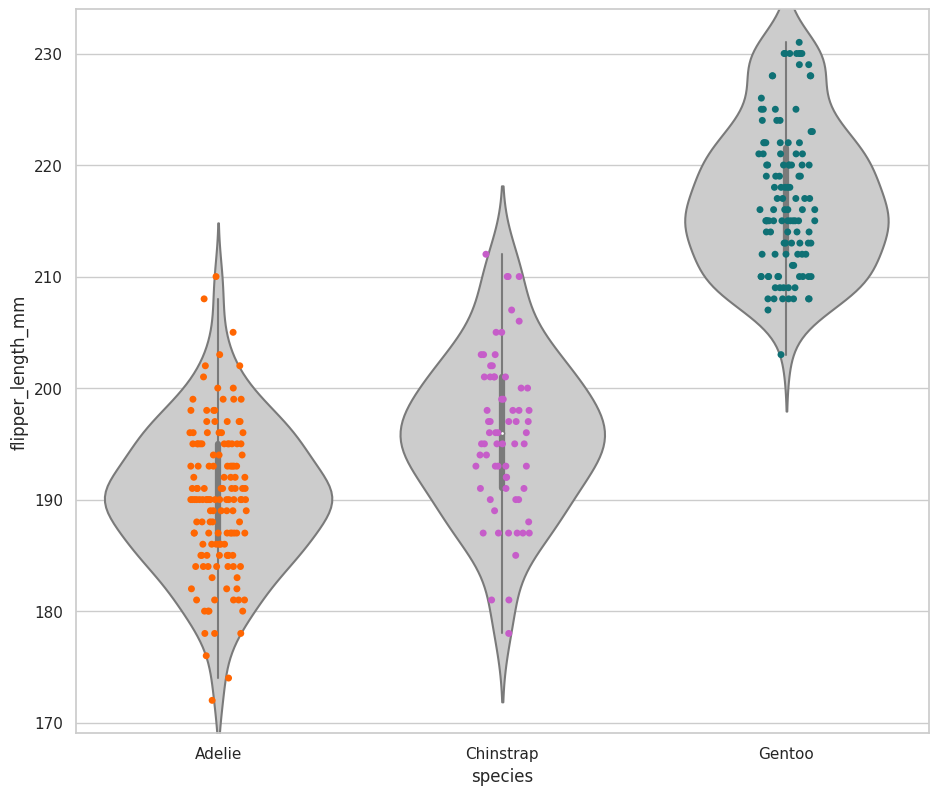

In [65]:
# @title Violinplot: Kdeplot o gráfico de densidad para dos dimensiones: una categórica y una numérica
ax = sns.violinplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

# Combinado con un stripplot para agregarlo los puntos de cada specie y su concentración.
ax = sns.stripplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    palette=penguin_color
)

<Axes: xlabel='species', ylabel='flipper_length_mm'>

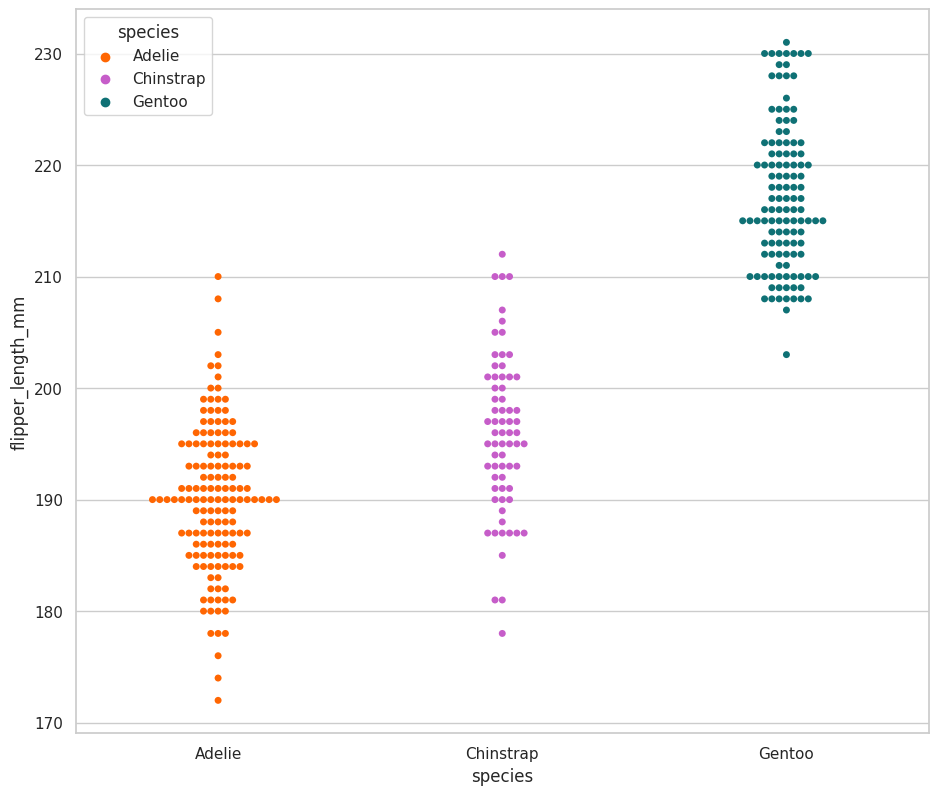

In [66]:
# @title Swarplot es un Stripplot ordenado al centro
sns.swarmplot(
    data=processed_penguins_df,
    x='species',
    y='flipper_length_mm',
    hue='species',
    palette=penguin_color
)

##### Challenge: Explorar la relación entre el peso de los pinguinos y las islas de donde provienen. Relación numérica - categórica

In [107]:
processed_penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.9+ KB


<Axes: ylabel='Frequency'>

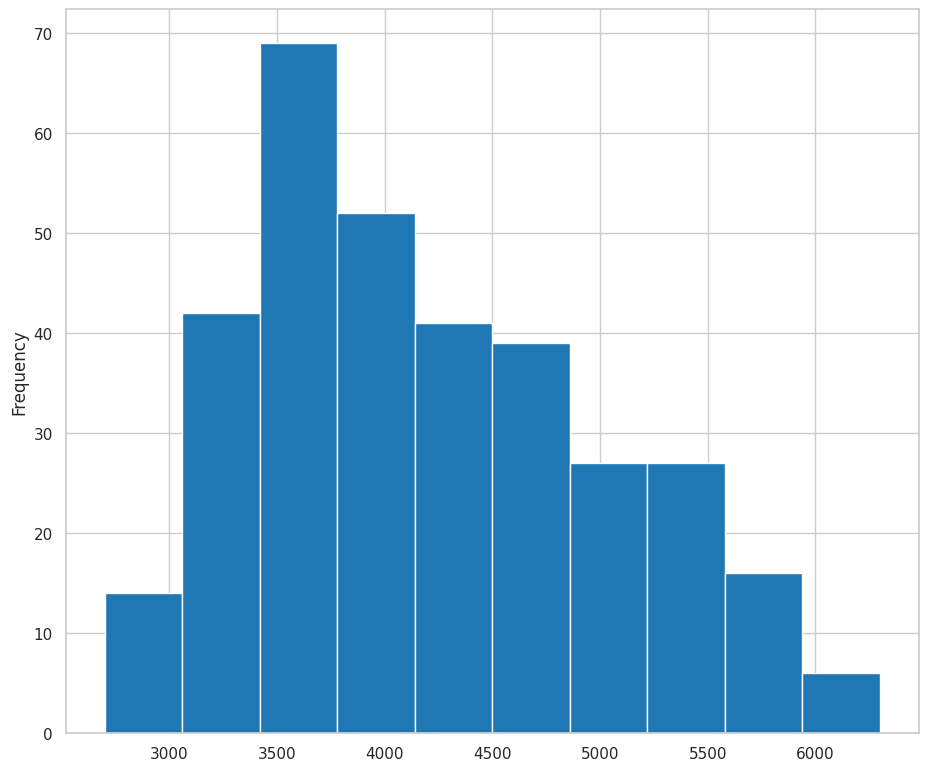

In [108]:
processed_penguins_df.body_mass_g.plot(kind="hist")

<Axes: xlabel='island', ylabel='count'>

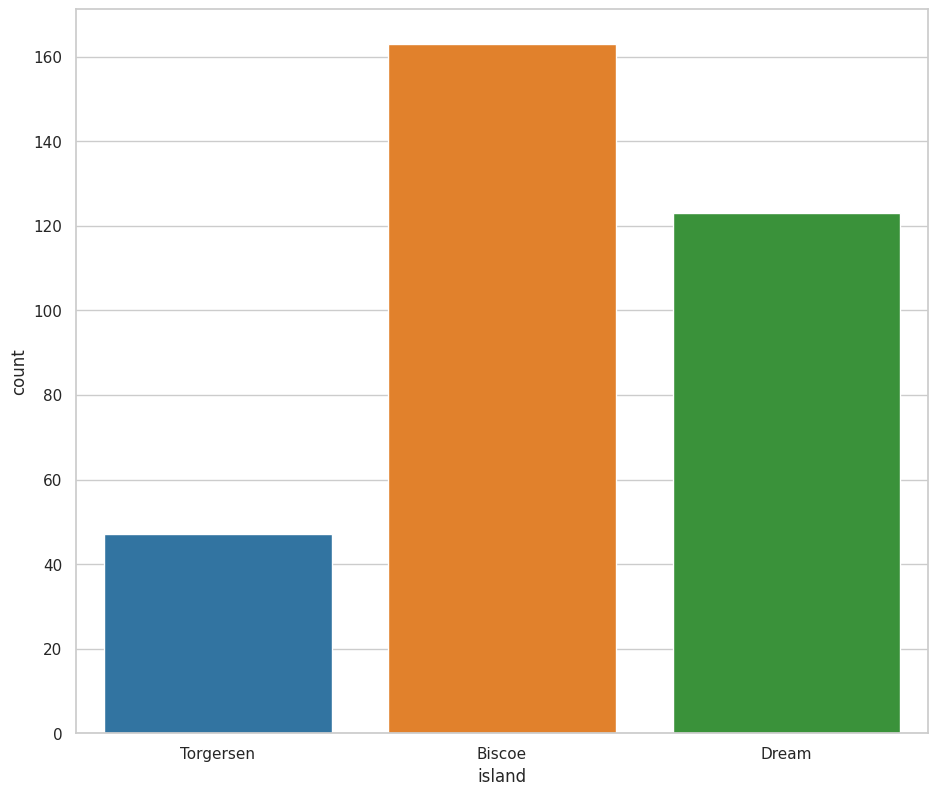

In [112]:
sns.countplot(data=processed_penguins_df,
              x="island")

<Axes: xlabel='island', ylabel='body_mass_g'>

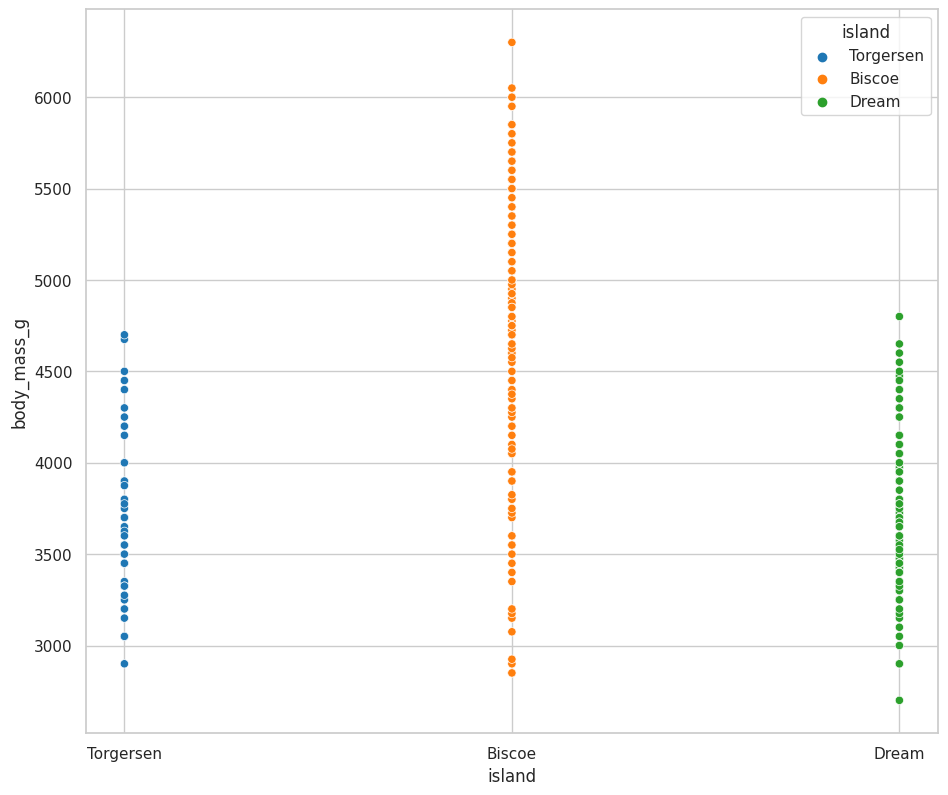

In [113]:
sns.scatterplot(data=processed_penguins_df,
                x="island",
                y="body_mass_g",
                hue="island")

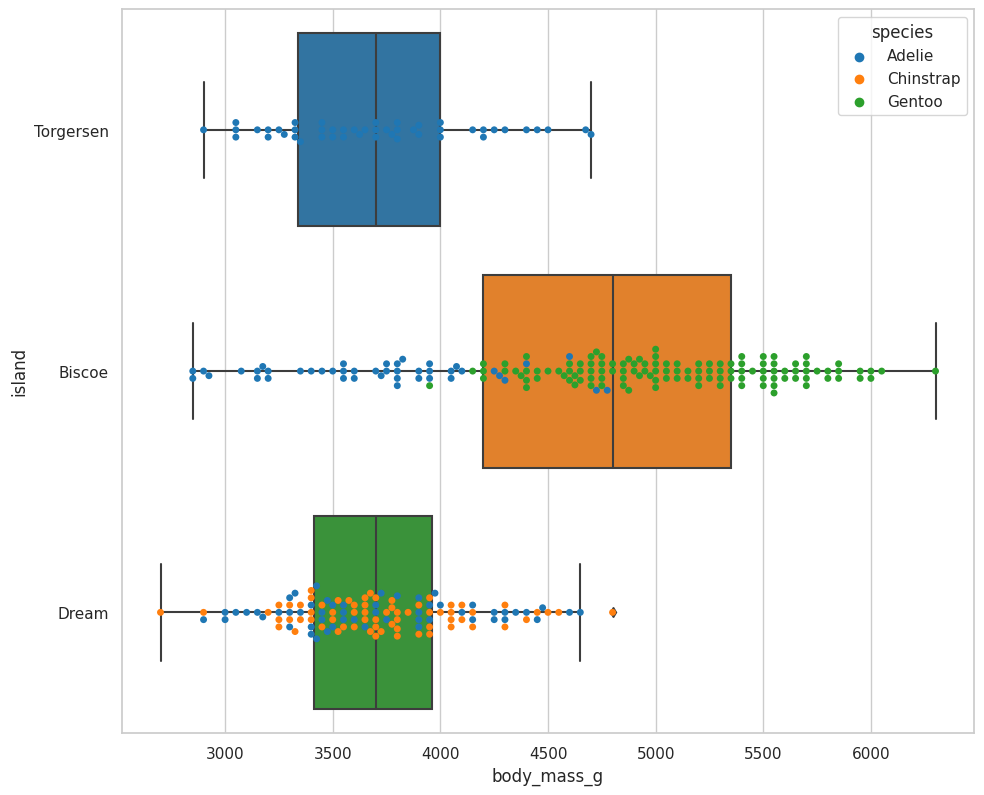

In [116]:
ax1 = sns.boxplot(x=processed_penguins_df.body_mass_g ,
                  y=processed_penguins_df.island)

ax1 = sns.swarmplot(x=processed_penguins_df.body_mass_g ,
                    y=processed_penguins_df.island,
                    hue=processed_penguins_df.species)

# Estableciendo relaciones: Matrices de correlación

**Correlación lineal: Nuestras variables se mueven conjuntamente**

*Puede haber correlación positiva: Mientras una sube la otra sube*

*Tmb correlación negativa: Mientras una sube la otra baja*

Existen otros tipos de correlación. Pero para medir correlación lineal, que es la mas frecuente, se suele utilizar el **coeficiente de R de Pearson.**

##### Muy importante: **Correlación** no implica **Causalidad**. Al existir correlación puede haber una tercera variable que esté jugando un rol causal en el movimiento de las dos variables correlacionadas. O simplemente puede ser el azar el que explique la correlación por más alta que sea.

**Para determinar Causalidad debemos recurrir a experimentos bajo el método cientifico**

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [67]:
processed_penguins_df.corr(numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

## ¿Como puedo visualizar los coeficientes de correlación?

<Axes: >

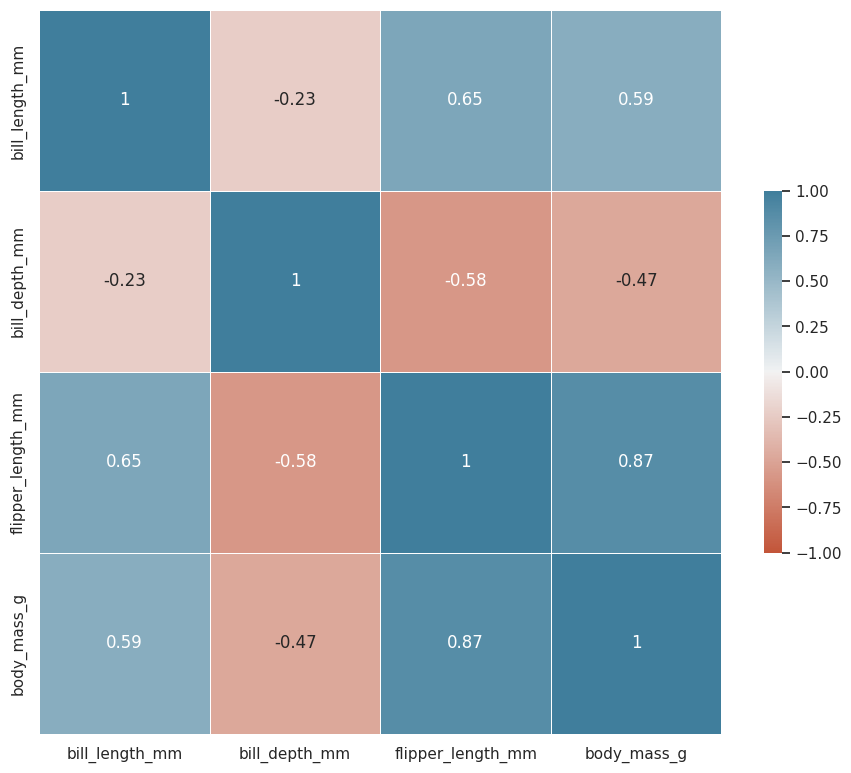

In [68]:
# @title Heatmap: Gráfico para visualizar correlación más usado
sns.heatmap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

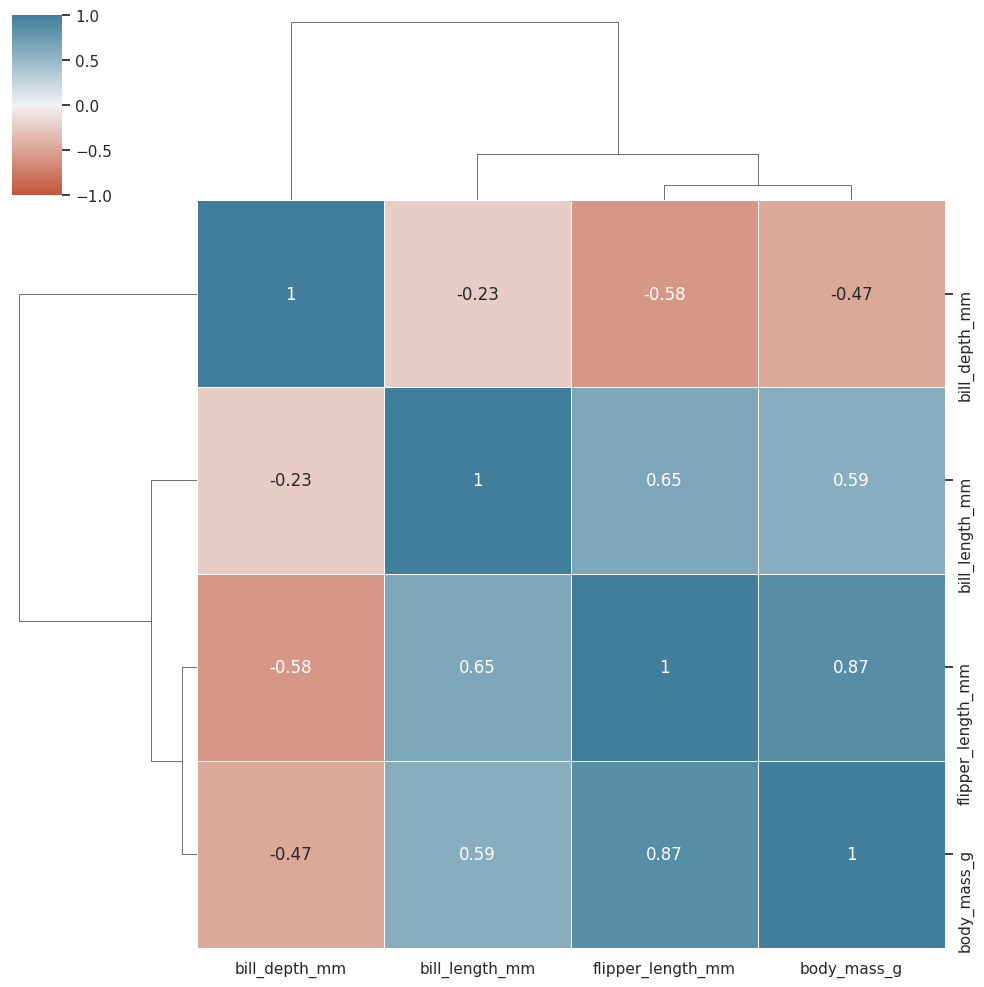

In [69]:
# @title Clustermap: Otra forma de visualizar correlación.
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¿Cómo podría representar una variable categórica como numérica discreta?

##### Esto me puede ser muy útil si necesito correlacionar (solo posible con variables numéricas) una variable categórica con una variable numérica. Veamos por ejemplo como lo puedo aplicar al sexo.

In [70]:
# @title Agrego una columna a mi conjunto de datos.
processed_penguins_df = (
    processed_penguins_df
    .assign(
        numeric_sex=lambda df: df.sex.replace(['Female', 'Male'], [0, 1])
    )
)

processed_penguins_df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  numeric_sex  
0         3750.0    Male            1  
1         3800.0  Female            0  
2         3250.0  Female            0  
4         3450.0  Female            0  
5         3650.0    Male            1  
..           ...     ...          ...  
338       4925.0  Female            0  
340       4850.0  Female            0  
341       5750.0    Male            1  
342       5200.0  Female            0  
343       5400.0    Male            1  

[333 rows x 8 columns]

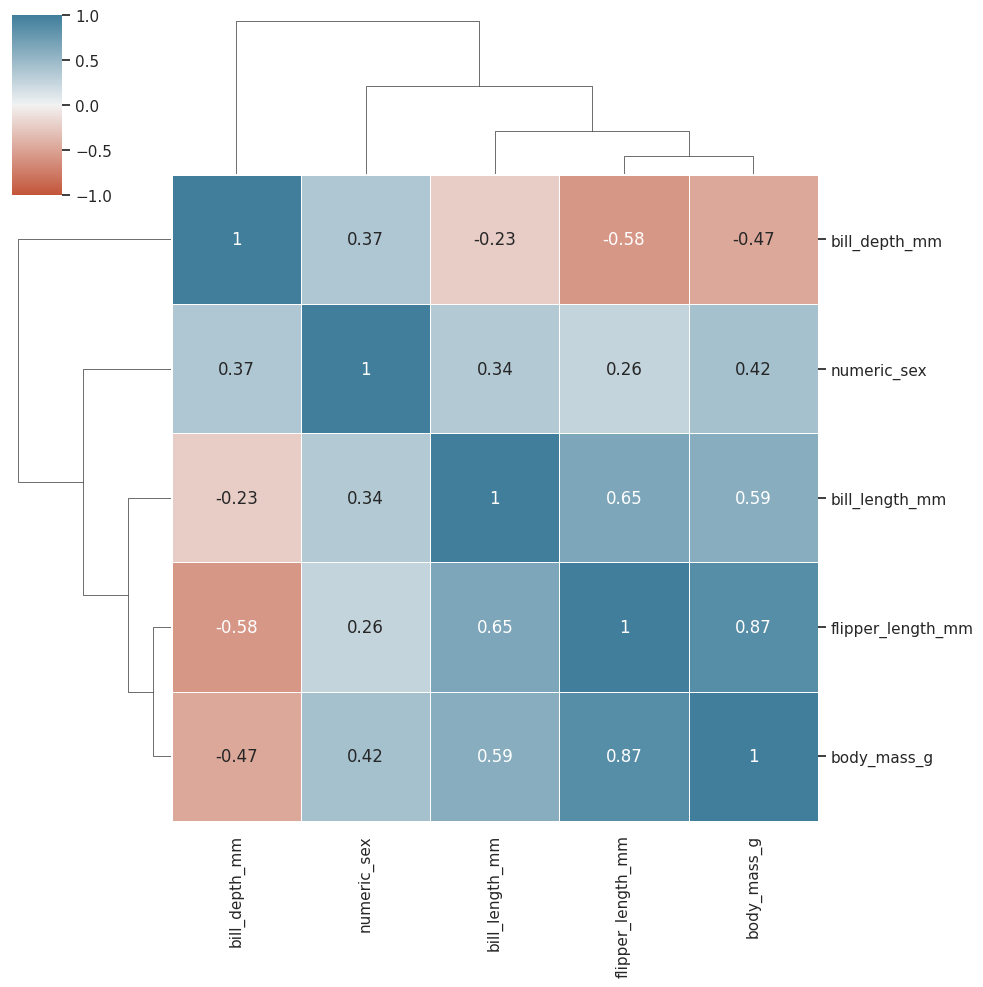

In [71]:
# @title Gráfico mi correlación entre variables habiendo agregado sexo como variable numérica discreta
sns.clustermap(
    data=processed_penguins_df.corr(numeric_only=True),
    cmap= sns.diverging_palette(20, 230, as_cmap=True), # 'BrBG'
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

## ¿Cuál es una límitante de los coeficientes de correlación lineal?

### Sólo nos ayuda a determinar la posible existencia de una correlación lineal, sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.        , 0.03162206],
       [0.03162206, 1.        ]])

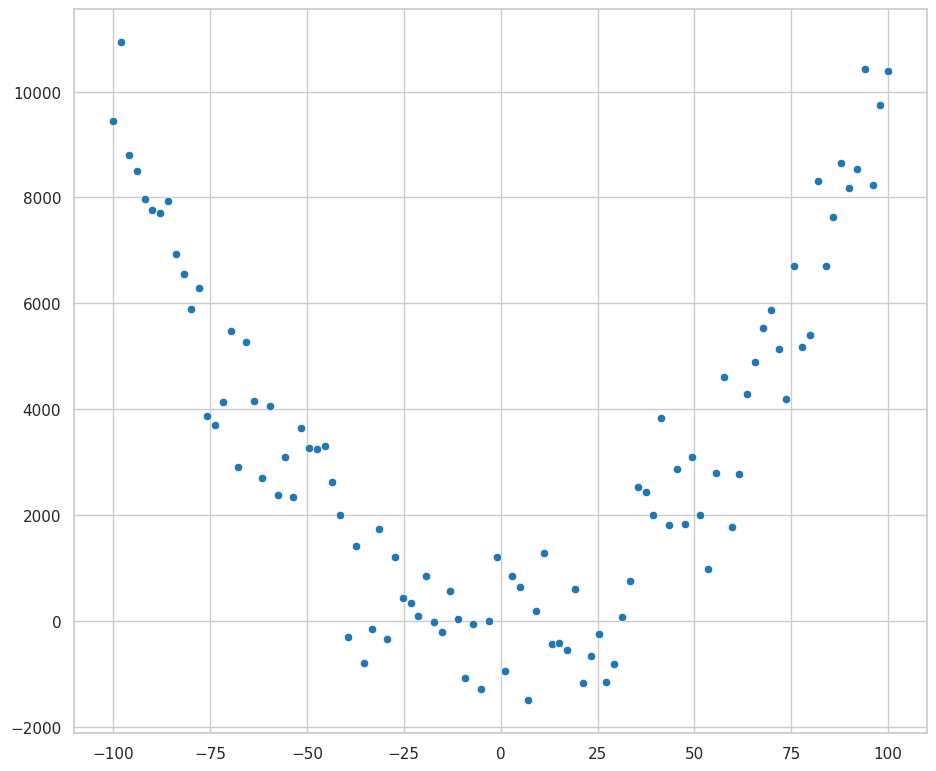

In [72]:
# @title Armo una relación no lineal (cuadrática) entre mis variables
x = np.linspace(-100, 100, 100)
y = x ** 2
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

##### Relación cuadrática entre mis datos. Mi R de Pearson acá nos va a dar muy bajo: 0.04. No hay correlación lineal. Pero claramente si hay un tipo de correlación. En este caso cuadrática.

#### Calculemos entonces el nivel de correlación cuadrática de mis datos ahora:


In [73]:
# @title Grado del polinomio (2 para cuadrático, 3 para cúbico)
degree = 2
coefficients = np.polyfit(x, y, degree)
coefficients

array([   1.03374806,    1.77911558, -247.15951366])

In [74]:
# @title Calcula los valores ajustados (predicciones) basados en el modelo polinómico:
y_fit = np.polyval(coefficients, x)
y_fit

array([ 9912.40953415,  9502.5466723 ,  9101.12170913,  8708.13464462,
        8323.58547878,  7947.47421161,  7579.80084311,  7220.56537327,
        6869.76780211,  6527.40812961,  6193.48635577,  5868.00248061,
        5550.95650411,  5242.34842629,  4942.17824713,  4650.44596663,
        4367.15158481,  4092.29510165,  3825.87651716,  3567.89583134,
        3318.35304419,  3077.2481557 ,  2844.58116588,  2620.35207473,
        2404.56088225,  2197.20758843,  1998.29219329,  1807.81469681,
        1625.775099  ,  1452.17339985,  1287.00959938,  1130.28369757,
         981.99569443,   842.14558996,   710.73338415,   587.75907702,
         473.22266855,   367.12415875,   269.46354762,   180.24083515,
          99.45602135,    27.10910622,   -36.79991024,   -92.27102803,
        -139.30424716,  -177.89956761,  -208.0569894 ,  -229.77651253,
        -243.05813698,  -247.90186277,  -244.30768989,  -232.27561834,
        -211.80564812,  -182.89777924,  -145.55201168,   -99.76834546,
      

In [75]:
# @title Calcula el coeficiente de correlación R-squared para evaluar cuán bien se ajusta el modelo a los datos.
correlation_matrix = np.corrcoef(y_fit, y)
r_squared = correlation_matrix[0, 1]**2

In [76]:
correlation_matrix

array([[1.       , 0.9587368],
       [0.9587368, 1.       ]])

In [77]:
r_squared

0.9191762456128302

In [78]:
print(f"Coeficiente de correlación R-squared: {r_squared}")

Coeficiente de correlación R-squared: 0.9191762456128302


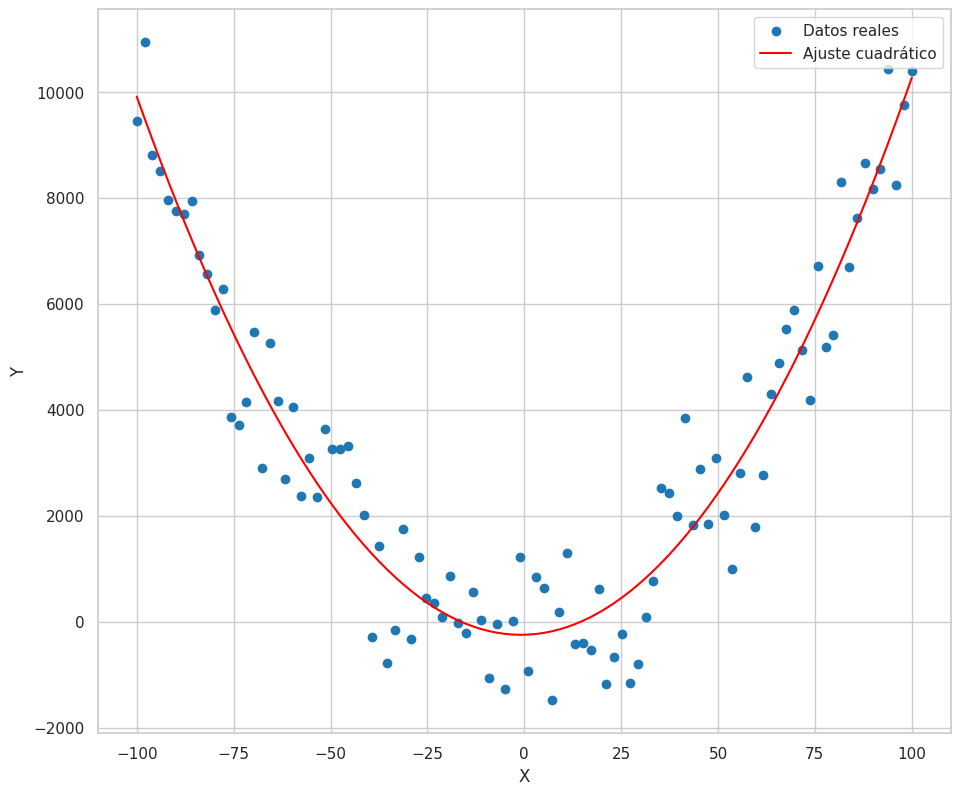

In [79]:
# @title Puedes visualizar el ajuste del modelo polinómico y los datos reales mediante un gráfico.
plt.scatter(x, y, label='Datos reales')
plt.plot(x, y_fit, label='Ajuste cuadrático', color='red')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

##### Cambiando el degree arriba a 3 puedo hacer lo mismo para la correlación cúbica que sigue abajo.

array([[1.        , 0.91668347],
       [0.91668347, 1.        ]])

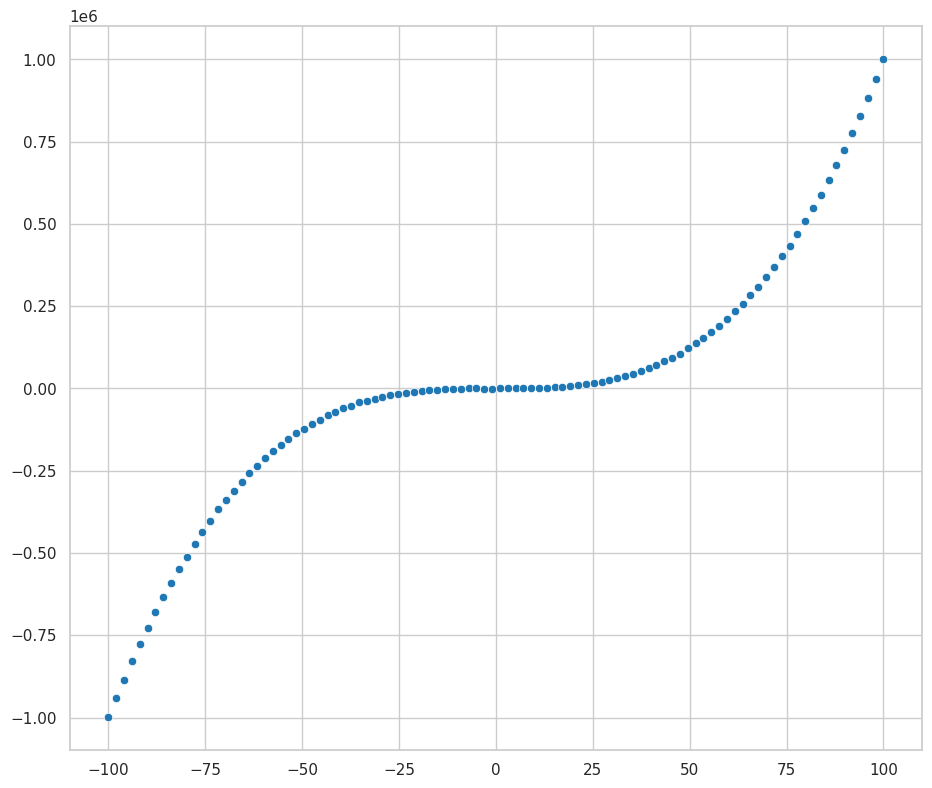

In [145]:
# @title Correlación cúbica entre mis datos.
x = np.linspace(-100, 100, 100)
y = x ** 3
y += np.random.normal(0, 1000, x.size)

sns.scatterplot(x=x, y=y)
np.corrcoef(x, y)

##### En la cúbica me puede parecer que estamos frente a una lineal. El R de Pearson me va a dar alto. Pero sabemso que construimos una relación cúbica. Por lo que es muy importante visualizar en profundidad todos nuestros datos.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

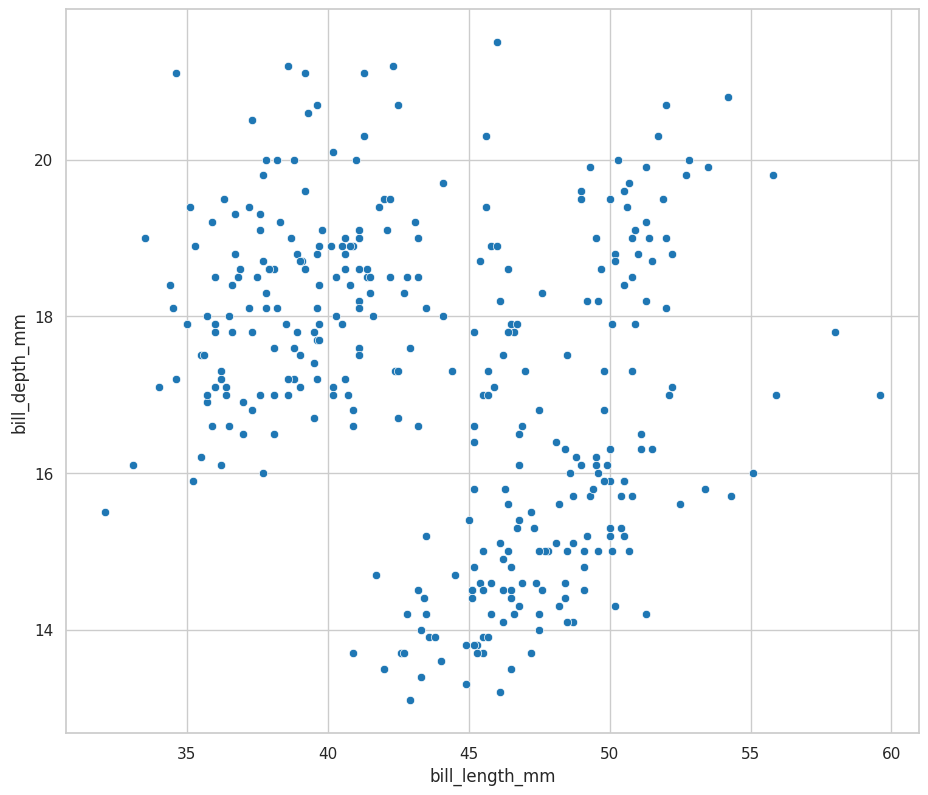

In [134]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la relación

Nosotros podemos tener un coeficiente de correlación más alto entre dos variables pero eso no significa que vaya a tener mayor impacto para predecir comportamiento.

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


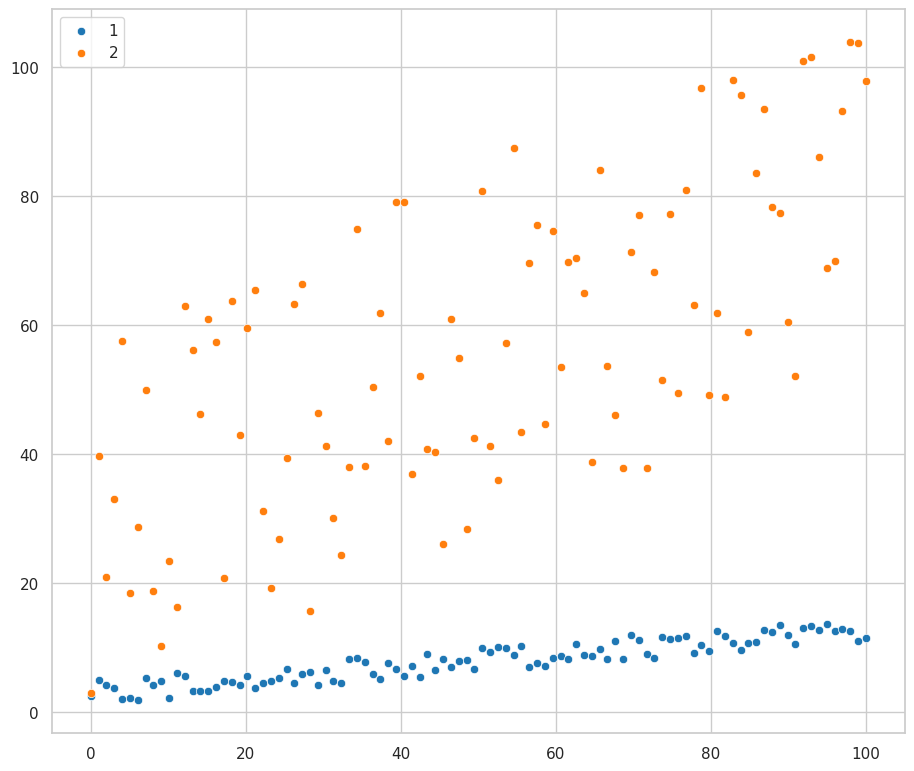

In [82]:
np.random.seed(42)
x_1 = np.linspace(0, 100, 100)
y_1 = 0.1 * x_1 + 3 + np.random.uniform(-2, 2, size=x_1.size)

sns.scatterplot(
    x=x_1,
    y=y_1
) # Conjunto azul de datos.

x_2 = np.linspace(0, 100, 100)
y_2 = 0.5 * x_2 + 1 + np.random.uniform(0, 60, size=x_2.size)

sns.scatterplot(
    x=x_2,
    y=y_2
) # Conjunto naranja de datos.

plt.legend(labels=['1', '2'])

print(np.corrcoef(x_1, y_1))
print(np.corrcoef(x_2, y_2))

##### En el ejemplo de arriba, los puntos azules, pese a tener un R de pearson (o coeficiente de correlación más bajo) - 0.6 vs 0.9 - puede tener un mayor impacto en mi negocio si por ejemplo se tratara de una relación entre mis ventas y el dinero invertido en marketing.

# Estableciendo relaciones: Análisis de regresión simple

Correlación no nos permite entender la fuerza o el impacto de una correlación. Para entender cual es este impacto debemos hablar de correlación lineal simple. Ese dato lo tendremos en la inclinación o **slope** de nuestra pendiente. Es un complemento muy util a un análisis de correlación como el que hicimos más arriba.

In [81]:
# @title Hacemos una regresión lineal para nuestros dos conjuntos de datos gráficados arriba
res_1 = scipy.stats.linregress(x=x_1, y=y_1) # Metodo de scipy para hacer una regresión lineal
res_2 = scipy.stats.linregress(x=x_2, y=y_2)

print(res_1, res_2, sep="\n")

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


##### Definiciones:

1. **Slope**: Efecto o intensidad que tiene la correlación en el caso de que la misma exista. Para el primero conjunto de datos es de 0.1. Es decir, que esperamos un cambio muy pequeño para cada cambio en X. Sin embargo, en el caso de los puntos naranjas, el slope es mayor pero la correlación es más debil. Responde a la pregunta que nos haciamos arriba de ¿Cual es el efecto de nuestra correlación?
2. **Intercept**: En donde se corta nuestro eje de las "Y" porque estamos ajustando una linea al trazar la regresión.
3. **Rvalue**: Cuantos de la variabilidad de nuestros datos estamos capturando con nuestra regresión lineal. Es el mismo valor que el de nuestro coeficiente de correlación que vimos arriba. Es mucho más alto (cercano al 1: correlación lineal perfecta) en el caso de los puntos azules que en el caso de los puntos naranjas.
4. **Pvalue**: Nos indica si nuestra regresión lineal es significativa o no. Para ello se debe comparar el Pvalue con el nivel de significancia pre-definido que generalmente se establece en 0.05. Si el pvalue es menor al nivel de significancia la regresión es estadisticamente significativa. Lo que significa que al menos una de las variables independientes tiene efectos significativos sobre la variable dependiente. En este caso rechazamos la hiótesis nula (no hay relación significativa entre las variables ) y generamos una hipotesis alternativa.

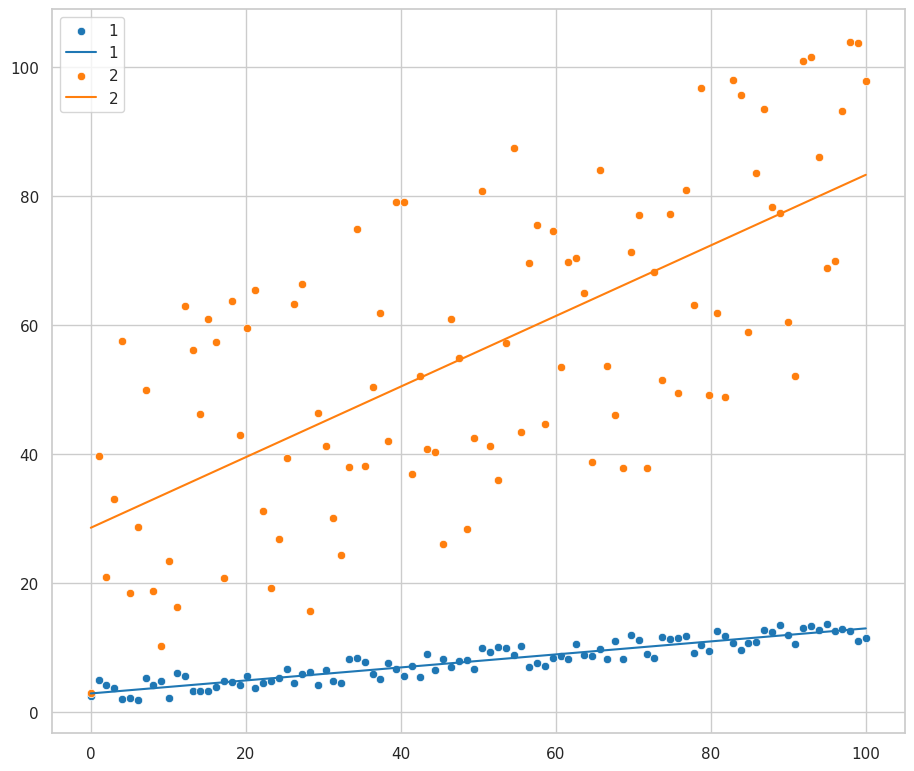

In [84]:
# @title Graficamos nuestros puntos con un Scatterplot más nuestras regresiones lineales con una plt.plot que asuma la forma de Lineplot
sns.scatterplot(
    x=x_1,
    y=y_1
)

fx_1 = np.array([x_1.min(), x_1.max()])
fy_1 =  res_1.intercept + res_1.slope *  fx_1

plt.plot(fx_1, fy_1)

sns.scatterplot(
    x=x_2,
    y=y_2
)

fx_2 = np.array([x_2.min(), x_2.max()])
fy_2 =  res_2.intercept + res_2.slope *  fx_2

plt.plot(fx_2, fy_2)

plt.legend(labels=['1', '1', '2', '2'])

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


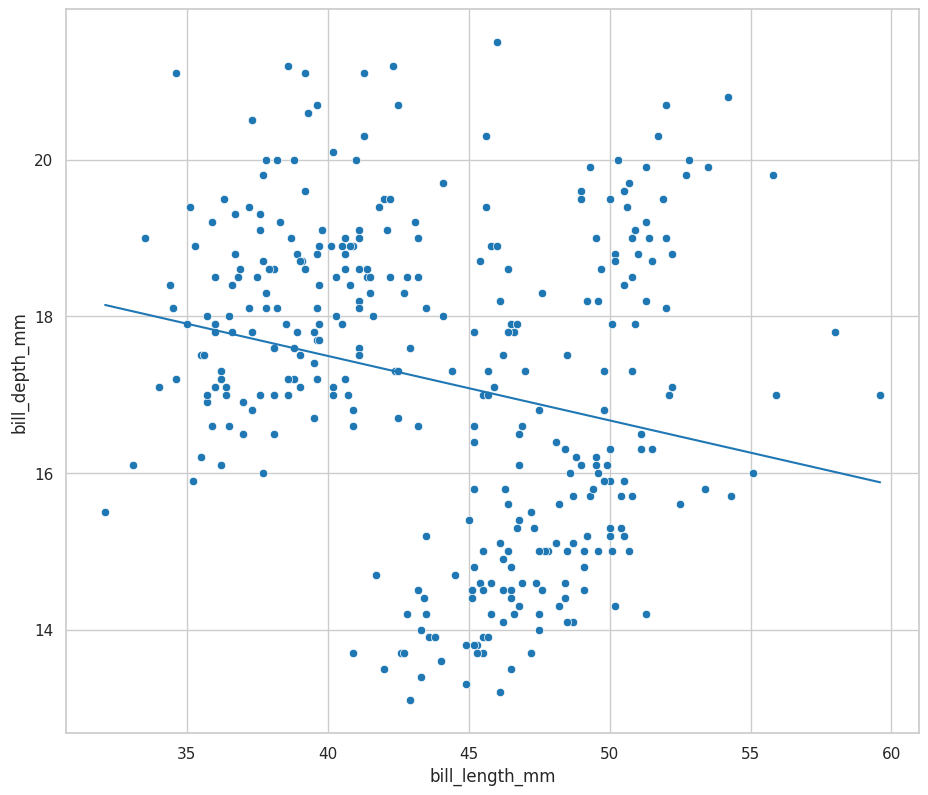

In [85]:
# @title Hacemos lo mismo pero con los datos originales de nuestros pinguinos de largo y ancho del pico
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm, y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([processed_penguins_df.bill_length_mm.min(), processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)

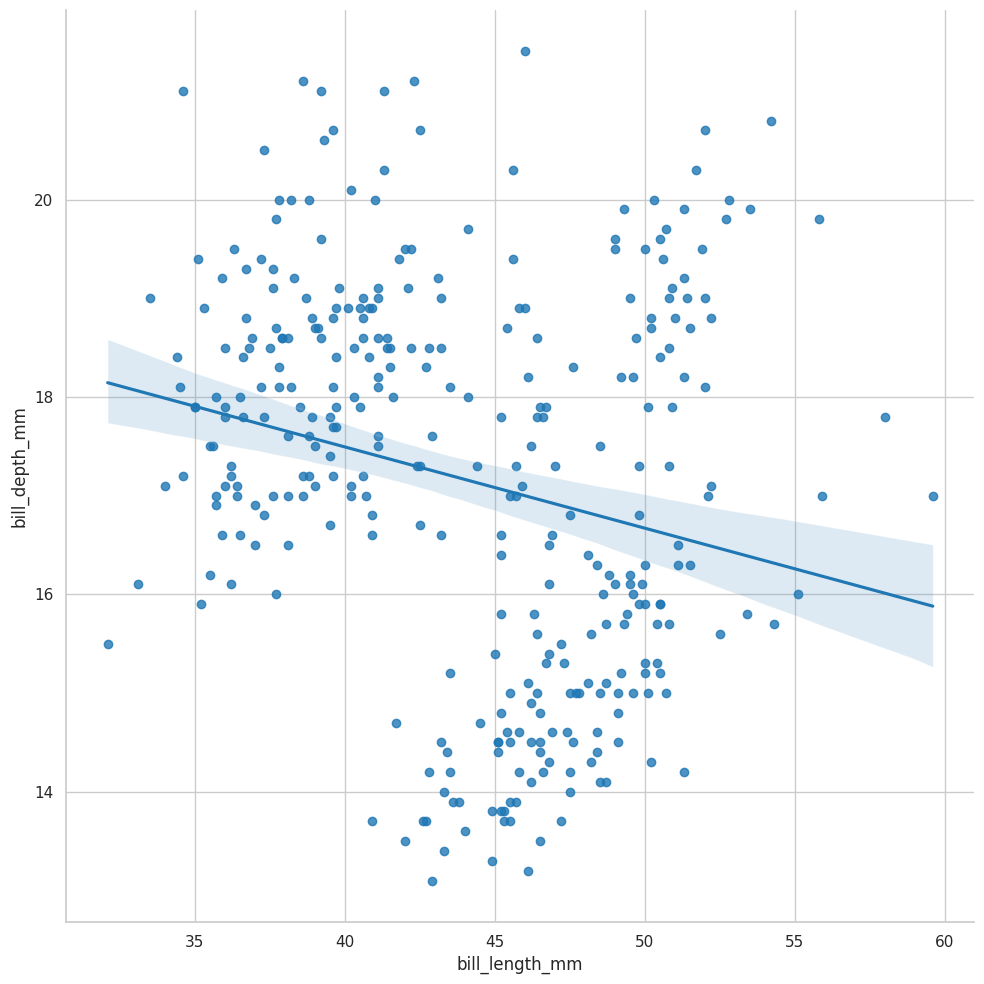

In [88]:
# @title Lmplot es un scatter plot con linear regressión incorporada.
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

##### Desventaja de hacerlo con Seaborn directamente:

No voy a obtener los estadisticos de mi regresión lineal de forma expresa como haciendolo con scipy.stats (slope, intercept, rvalue, pvalue)

##### Ventajas de hacerlos con Seaborn directamente:

Voy a tener ademas de la linea de refresión una sombra azul que representa el intervalo en el cual los datos pueden ser explicados por nuestro regresión lineal.

##### Limites de la regresión lineal lograda:

Acá veo una tendencia de regresión lineal negativa entre todos mis datos, aunque con una correlación muy debil. ¿Realmente será así? O hay alguna variable que no estamos viendo acá y que está interfiriendo en nuestra regresión lineal? Como por ejemplo, la especie, o la isla de la cual provienen?

##### Challenge:

1. Encontrar la variable que está haciendo ruido en nuestra regresión simple entre ancho y largo del pico.
2. Armar otra regresión lineal entre otras dos de tus variables. Graficarlas y luego invertir la dependencia entre las variables a ver que sucede.

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)
LinregressResult(slope=0.17668344293376206, intercept=11.487707126154493, rvalue=0.385813200495579, pvalue=1.5149014096476615e-06, stderr=0.035207899073921585, intercept_stderr=1.3700993275268667)
LinregressResult(slope=0.2222117240036715, intercept=7.569140119132472, rvalue=0.6535362081800428, pvalue=1.5255389633545055e-09, stderr=0.03167824612459654, intercept_stderr=1.550529277341085)
LinregressResult(slope=0.2076116034225251, intercept=5.120955946776929, rvalue=0.654023314272654, pvalue=7.336623629938379e-16, stderr=0.022200343390120832, intercept_stderr=1.0582575362244255)


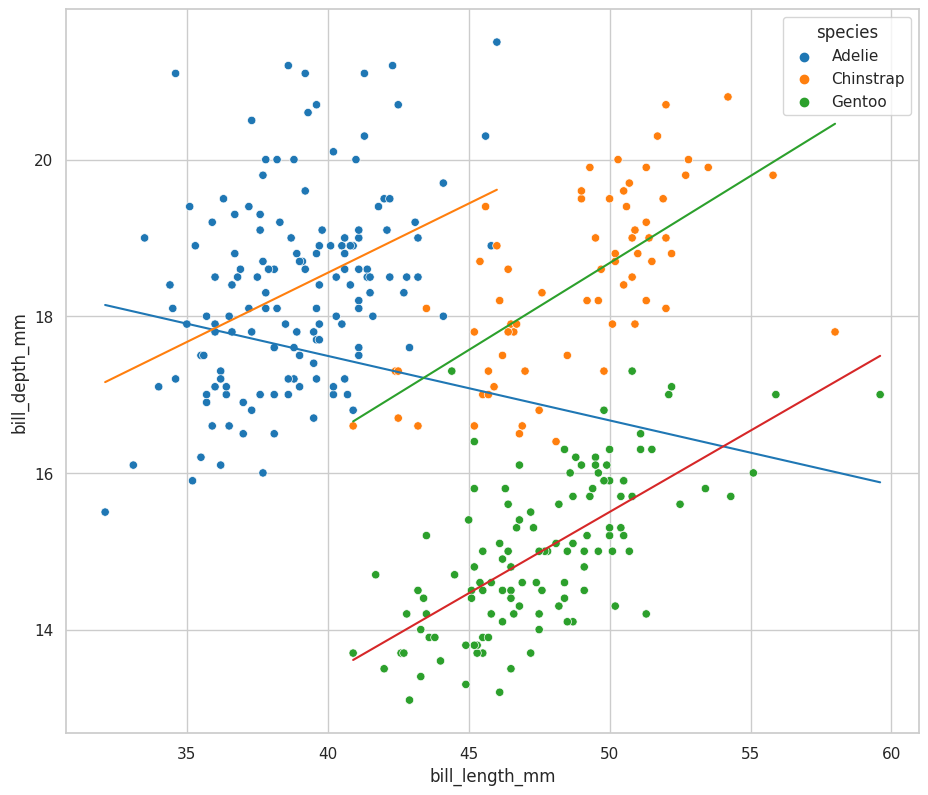

In [98]:
# @title Encontremos la variable que agrega ruido a nuestro scatterplot original
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

# Armemos las regresiones lineales entonces para cada especie de pinguino:

## Regresión general
res_penguins = scipy.stats.linregress(x=processed_penguins_df.bill_length_mm,
                                      y=processed_penguins_df.bill_depth_mm)
print(res_penguins)

## Grafico la regresión lineal de todos los pinguinos
fx_1 = np.array([processed_penguins_df.bill_length_mm.min(),
                 processed_penguins_df.bill_length_mm.max()])
fy_1 =  res_penguins.intercept + res_penguins.slope *  fx_1

plt.plot(fx_1, fy_1)

## Regresión para los adelie
adelie_df =processed_penguins_df[processed_penguins_df.species == 'Adelie']

res_adelie = scipy.stats.linregress(x=adelie_df.bill_length_mm,
                                    y=adelie_df.bill_depth_mm)
print(res_adelie)

## Grafico la regresión lineal de los Adelie:
fx_2 = np.array([adelie_df.bill_length_mm.min(),
                 adelie_df.bill_length_mm.max()])
fy_2 = res_adelie.intercept + res_adelie.slope * fx_2

plt.plot(fx_2, fy_2)

## Regresión para los Chinstrap
chinstrap_df =processed_penguins_df[processed_penguins_df.species == 'Chinstrap']

res_chinstrap = scipy.stats.linregress(x=chinstrap_df.bill_length_mm,
                                    y=chinstrap_df.bill_depth_mm)
print(res_chinstrap)

## Grafico la regresión lineal de los Chinstrap:
fx_3 = np.array([chinstrap_df.bill_length_mm.min(),
                 chinstrap_df.bill_length_mm.max()])
fy_3 = res_chinstrap.intercept + res_chinstrap.slope * fx_3

plt.plot(fx_3, fy_3)

## Regresión para los Gentoo
gentoo_df =processed_penguins_df[processed_penguins_df.species == 'Gentoo']

res_gentoo = scipy.stats.linregress(x=gentoo_df.bill_length_mm,
                                    y=gentoo_df.bill_depth_mm)
print(res_gentoo)

## Grafico la regresión lineal de los gentoo:
fx_4 = np.array([gentoo_df.bill_length_mm.min(),
                 gentoo_df.bill_length_mm.max()])
fy_4 = res_gentoo.intercept + res_gentoo.slope * fx_4

plt.plot(fx_4, fy_4)


In [99]:
processed_penguins_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'numeric_sex'],
      dtype='object')

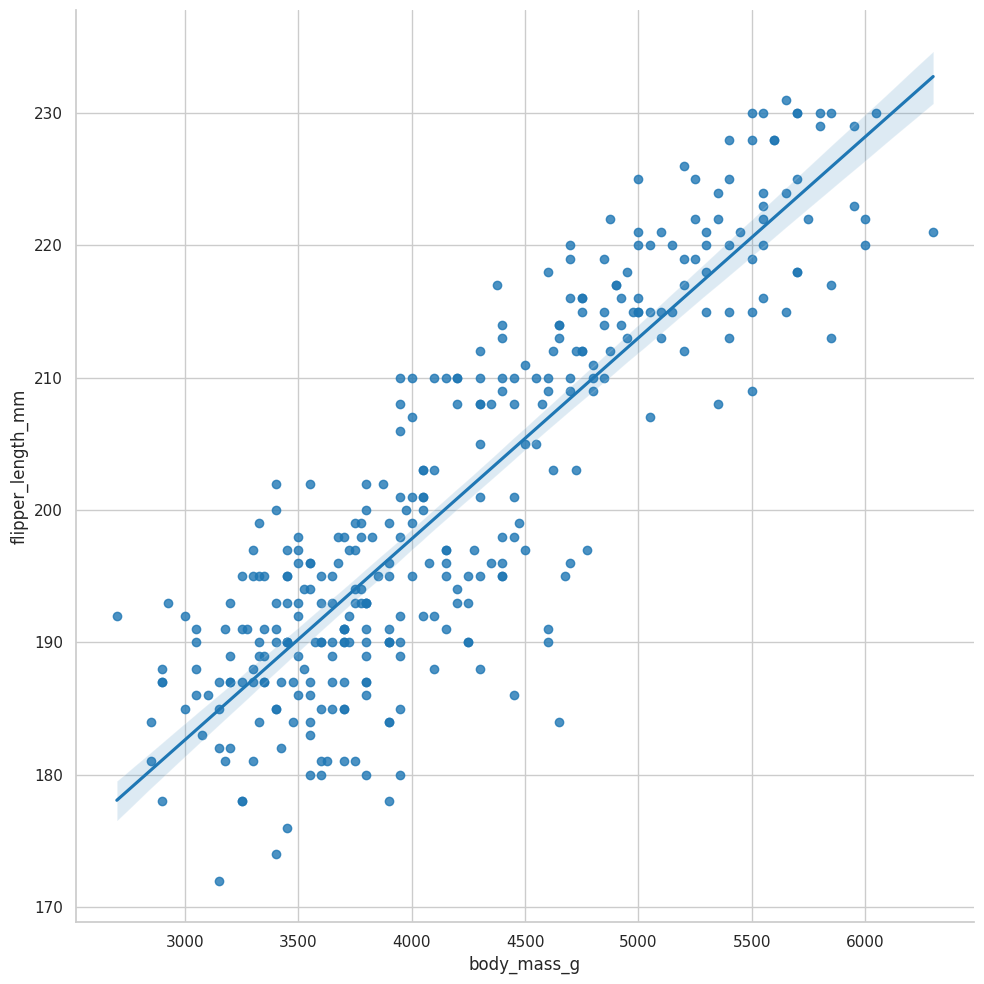

In [30]:
sns.lmplot(data=processed_penguins_df,
           x="body_mass_g",
           y="flipper_length_mm",
           height=10)

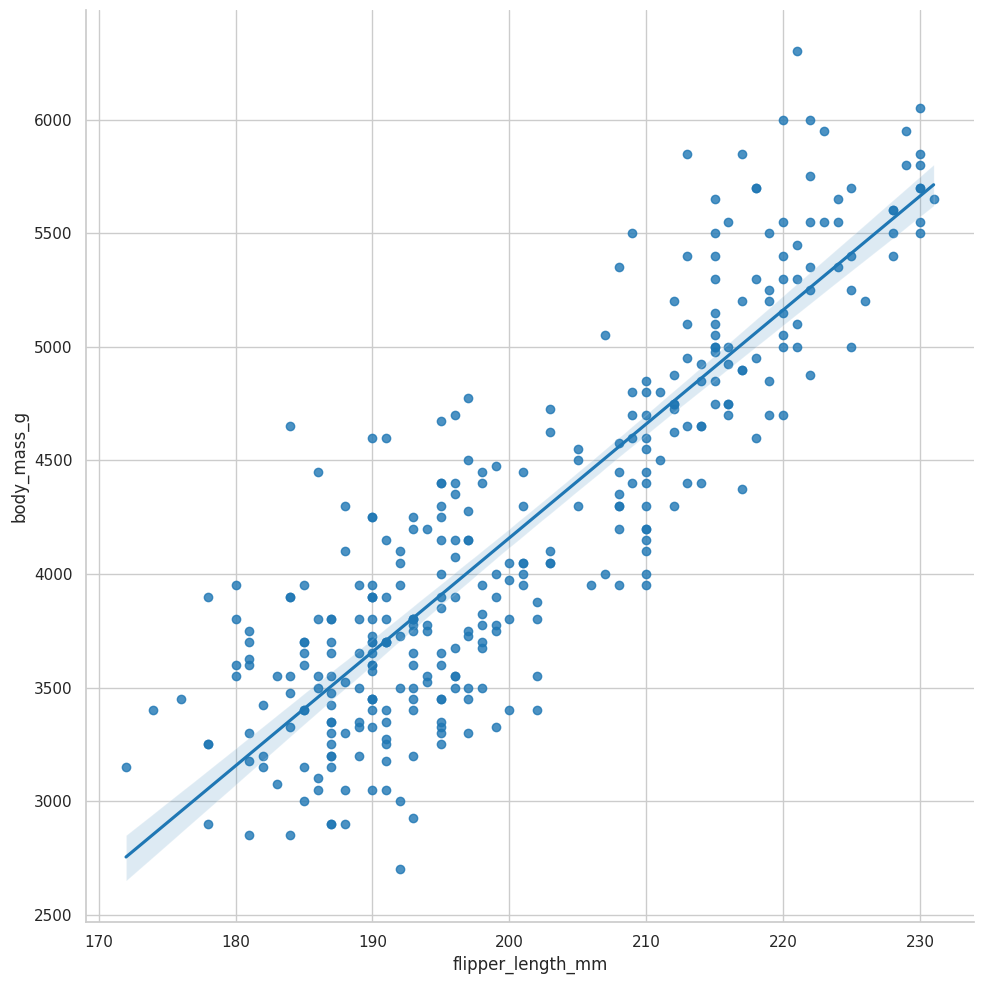

In [31]:
sns.lmplot(data=processed_penguins_df,
           y="body_mass_g",
           x="flipper_length_mm",
           height=10)

# Limitaciones del análisis de regresión simple

1. La regresión lineal simple de A - B no es lo mismo que la de B - A.
2. Si dos variables crecen o decrecen siguiendo las mismas pautas, no implica necesariamente que una cause la otra (correlación no es causalidad)
3. Solo puede manejar relaciones lineales.

## La regresión lineal simple no es simétrica (A -> B != B -> A)

In [46]:
x = processed_penguins_df.bill_length_mm
y = processed_penguins_df.bill_depth_mm

# Relación lineal X -> Y
res_x_y = scipy.stats.linregress(x=x, y=y)
# Opuesto: Relación lineal Y -> X
res_y_x = scipy.stats.linregress(y=x, x=y)

print(res_x_y, res_y_x, sep="\n")

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)
LinregressResult(slope=-0.6349051704195029, intercept=54.89085424504756, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.14859778216623312, intercept_stderr=2.567341513538256)


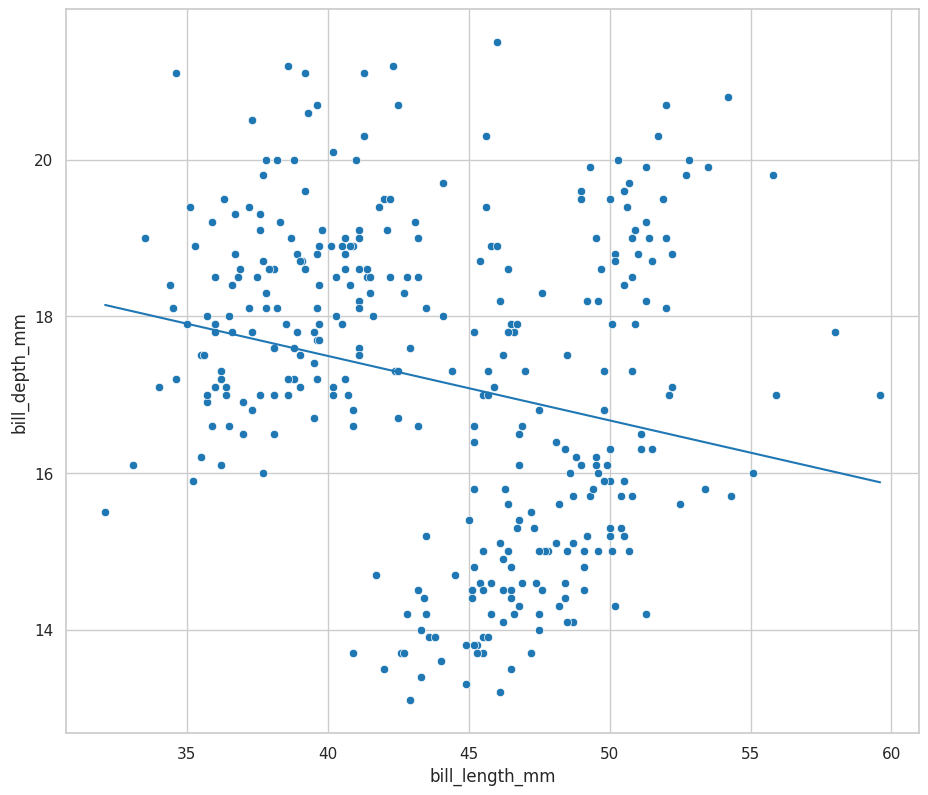

In [47]:
sns.scatterplot(
    x=x,
    y=y
)

fx_1 = np.array([x.min(), x.max()])
fy_1 =  res_x_y.intercept + res_x_y.slope *  fx_1

plt.plot(fx_1, fy_1)

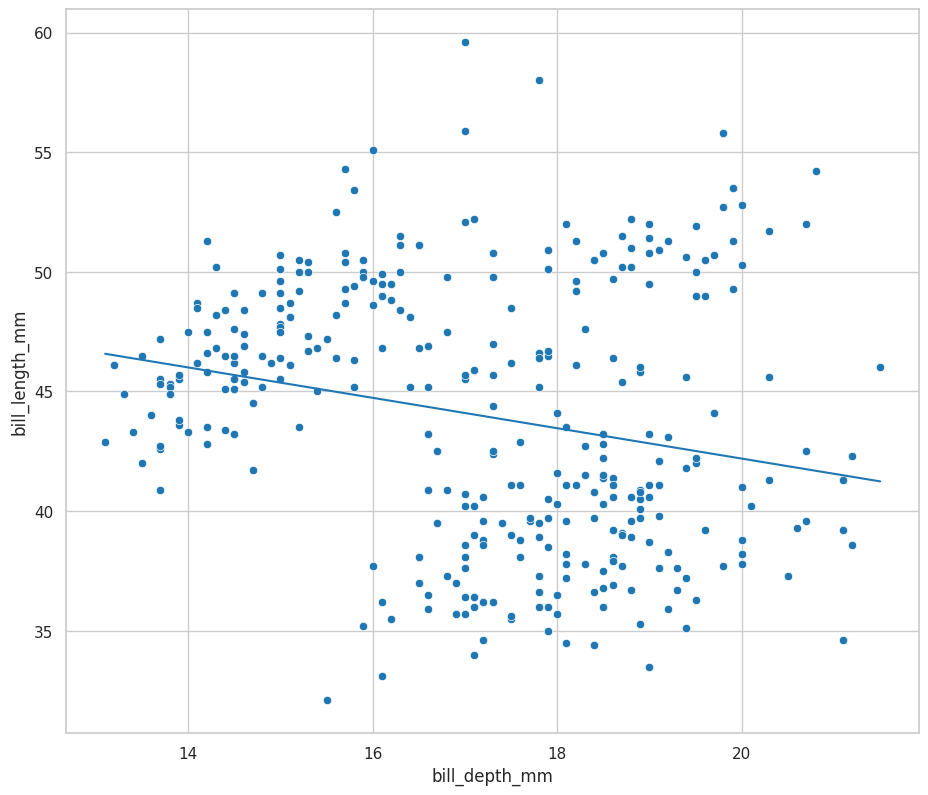

In [48]:
sns.scatterplot(
    x=y,
    y=x
)

fx_2 = np.array([y.min(), y.max()])
fy_2 = res_y_x.intercept + res_y_x.slope *  fx_2

plt.plot(fx_2, fy_2)

##### Parecen iguales pero no lo son. Dado que en el segundo eje tenemos X e Y transpuestos. Por ello dibujemos ambas regresiones en un único gráfico:

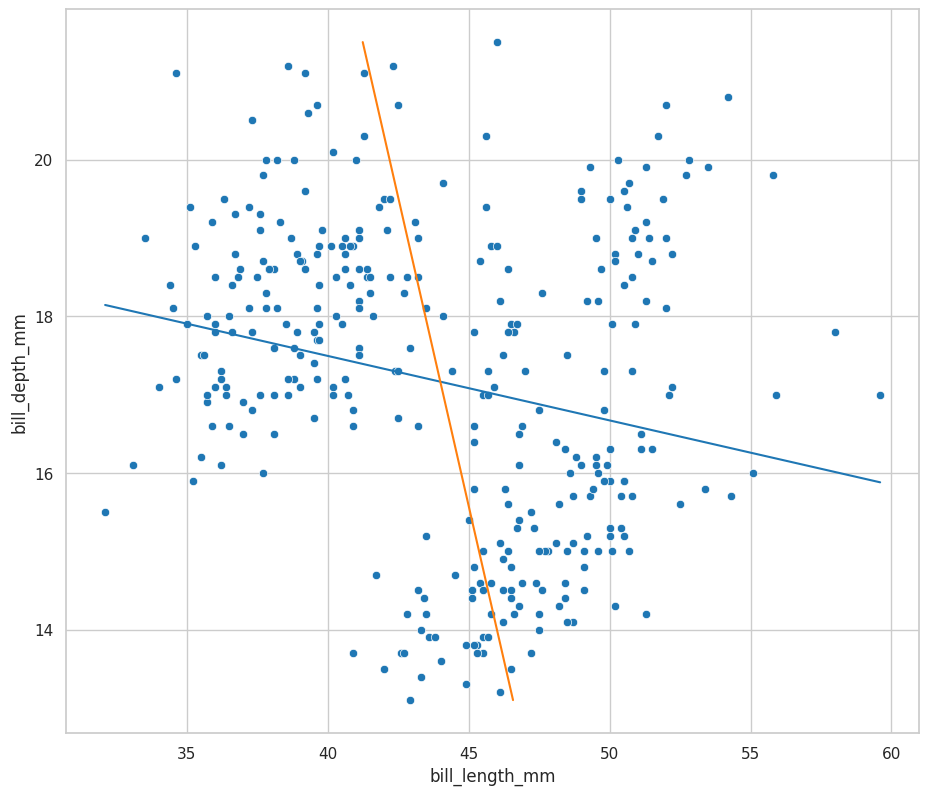

In [52]:
ax = sns.scatterplot(
    x=x,
    y=y
)

ax = plt.plot(fx_1, fy_1)
ax = plt.plot(fy_2, fx_2) # Van invertidos porque están transpuestos los ejes.

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre varias variables

La pendiente es -0.634905, lo que significa que cada milímetro adicional de profundidad del pico es asociado a un decremento de -0.634905 milímetros de la longitud del pico de un pingüino.

In [55]:
# @title Uso scipy para calcular los principales estadisticos de la regresión entre profundidad y largo entendiendo a profundidad como la independiente
(
    smf.ols(
        formula="bill_length_mm ~ bill_depth_mm", # En la formula la variable Y o dependiente se escribe primero. La variable X o independiente luego del sigo ~
         data=processed_penguins_df
    )
    .fit()
    .params
) # Nos devuelve el intercept y el slope

Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

Recordemos que el slope significa que por cada 1 punto de cambio en la profundidad (depth) del pico yo voy a esperar un cambio negativo de 0,63mm en el largo del pico.

In [56]:
# @title Analizo la inversa a lo que vimos arriba. El movimiento en profundidad depende del movimiento en largo.
(
    smf.ols(
        formula="bill_depth_mm ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
    .summary()
)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          bill_depth_mm   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     18.26
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.53e-05
Time:                        20:58:04   Log-Likelihood:                -688.72
No. Observations:                 333   AIC:                             1381.
Df Residuals:                     331   BIC:                             1389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         20.7866      0.854     24.335      0.000      19.106      22.467
bill_length_mm    -0.0823      0.019     -4.273      0.000      -0.120      -0.044
==============================================================================
Omnibus:                       15.442   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.783
Skew:                          -0.014   Prob(JB):                       0.0337
Kurtosis:                       2.301   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Análisis de regresión múltiple

1. Nos permite trabajar con regresiones de otros tipos ademas de la lineal, por ejemplo la regresión logarítmica o la regresión logística.
2. Nos permite acercarnos mucho más a una explicación causal. Dado que trabaja con multiples variables a la vez.  

## Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

### Creando modelos

In [59]:
# @title Modelo de Regresión Lineal con una sola variable
model_1 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.54e-32
Time:                        21:10:19   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.845
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El 86,79 de slope para bill_length_mm significa que por cada 1 mm que aumente el largo del pico del pinguino debemos esperar un incremento en 86,79 gramos de peso del pinguino.

In [60]:
# @title Modelo de regresión lineal con dos variables
model_2 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm ", # Sumo las variables con un signo de "+"
         data=processed_penguins_df
    )
    .fit()
)

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           7.04e-46
Time:                        21:10:56   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Frente a estos resultados es importante visualizar los datos dado que es contraintuitivo que a mayor largo del pico el peso crezca pero a mayor profundidad del pico el peso se reduzca. ¿no?

In [62]:
# @title Sumamos tercer vairable que es el largo de alas de los pinguinos
model_3 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          9.26e-103
Time:                        21:14:20   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Cuando veiamos solo el length del bill el mismo explicaba un gran cambio.
2. Cuando vimos el length con el depth el length ya explicaba un cambio menor, pero el depth explicaba un cambio negativo.
3. Ahora los dos explican cambios positivos en el peso del pinguino pero mucho menores.
4. Mientras que la tercer variable, largo de las alas, explica una parte importante del incremento del peso por cada mm que crece el ala.

**Debemos ir mirando el R squared de cada modelo. Mientras más alto es, y más cercano al 1, mejor se ajusta nuestra modelo a explicar la variabilidad de la variable dependiente.**

In [63]:
# @title Le agrego una cuarta variable, categoríca ahora sí (algo que con el modelo lineal no podía hacer) -> Uso C() para ello.
model_4 = (
    smf.ols(
        formula="body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          6.28e-122
Time:                        21:20:31   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.Male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La lectura de la variable categórica acá es que los machos pesan en general 541 gramos más que las hembras. El R cuadrado vemos que es aún más alto que antes.

**Ahora debemos evaluar si un modelo más sencillo, con menos variable tenga un R squared mucho más alto**

In [64]:
model_5 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm",
         data=processed_penguins_df
    )
    .fit()
)

model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          3.13e-105
Time:                        21:23:22   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
model_6 = (
    smf.ols(
        formula="body_mass_g ~ flipper_length_mm + C(sex)",
         data=processed_penguins_df
    )
    .fit()
)

model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          3.53e-118
Time:                        21:23:41   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.Male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualizando resultados para determinar que modelo es el más optimo para estimar peso al olvidarme mi balanza.

In [68]:
models_results = pd.DataFrame(
    dict(
        actual_value = processed_penguins_df.body_mass_g,
        prediction_model_1 = model_1.predict(),
        prediction_model_2 = model_2.predict(),
        prediction_model_3 = model_3.predict(),
        prediction_model_4 = model_4.predict(),
        prediction_model_5 = model_5.predict(),
        prediction_model_6 = model_6.predict(),
        species = processed_penguins_df.species,
        sex = processed_penguins_df.sex
    )
)

models_results

actual_value  prediction_model_1  prediction_model_2  prediction_model_3  \
0          3750.0         3782.402961         3617.641192         3204.761227   
1          3800.0         3817.119665         3836.725580         3436.701722   
2          3250.0         3886.553073         3809.271371         3906.897032   
4          3450.0         3574.102738         3350.786581         3816.705772   
5          3650.0         3799.761313         3356.140070         3696.168128   
..            ...                 ...                 ...                 ...   
338        4925.0         4485.416214         4951.159375         4817.401804   
340        4850.0         4450.699510         4833.930015         4877.548625   
341        5750.0         4763.149845         4899.545411         5269.708799   
342        5200.0         4311.832695         4641.476223         4728.911846   
343        5400.0         4719.753965         4803.936225         4818.337739   

     prediction_model_4  prediction_model_5  prediction_model_6 species  \
0           3579.136946         3205.648453         3441.323750  Adelie   
1           3343.220772         3456.414782         3328.384372  Adelie   
2           3639.137335         3907.794176         3751.223949  Adelie   
4           3457.954243         3807.487644         3657.259599  Adelie   
5           3764.536023         3657.027846         3864.163327  Adelie   
..                  ...                 ...                 ...     ...   
338         4730.939522         4860.706229         4643.885279  Gentoo   
340         4719.043886         4910.859495         4690.867454  Gentoo   
341         5402.946434         5261.932356         5367.592935  Gentoo   
342         4563.248182         4760.399697         4549.920929  Gentoo   
343         5020.243038         4810.552963         4944.753358  Gentoo   

        sex  
0      Male  
1    Female  
2    Female  
4    Female  
5      Male  
..      ...  
338  Female  
340  Female  
341    Male  
342  Female  
343    Male  

[333 rows x 9 columns]

<Axes: ylabel='Proportion'>

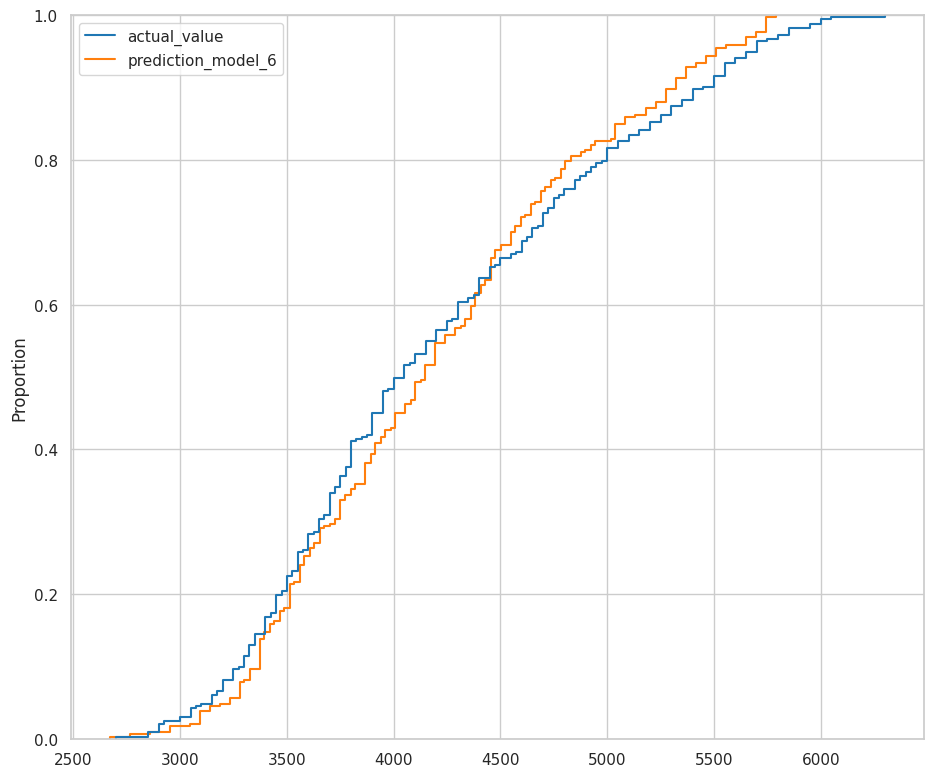

In [75]:
# @title Ecdfplot para comparar datos reales de peso de pinguinos con mi mejor modelo creado
sns.ecdfplot(
    data=models_results.select_columns(['actual_value', 'prediction_model_6']) # Metodo de Javanitor. Con pandas solo debería cambiar la sentencia
)

<Axes: ylabel='Proportion'>

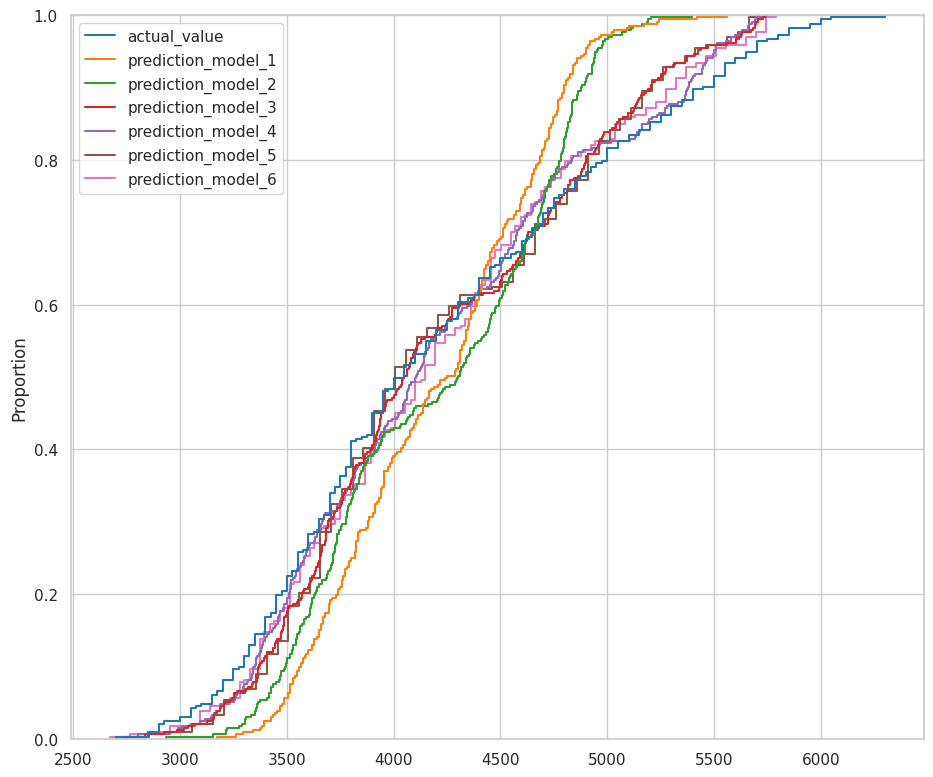

In [76]:
# @title Ecdfplot para analizar mis datos reales de peso con todos mis modelos.
sns.ecdfplot(
    data=models_results
)

### PDFs

<Axes: ylabel='Density'>

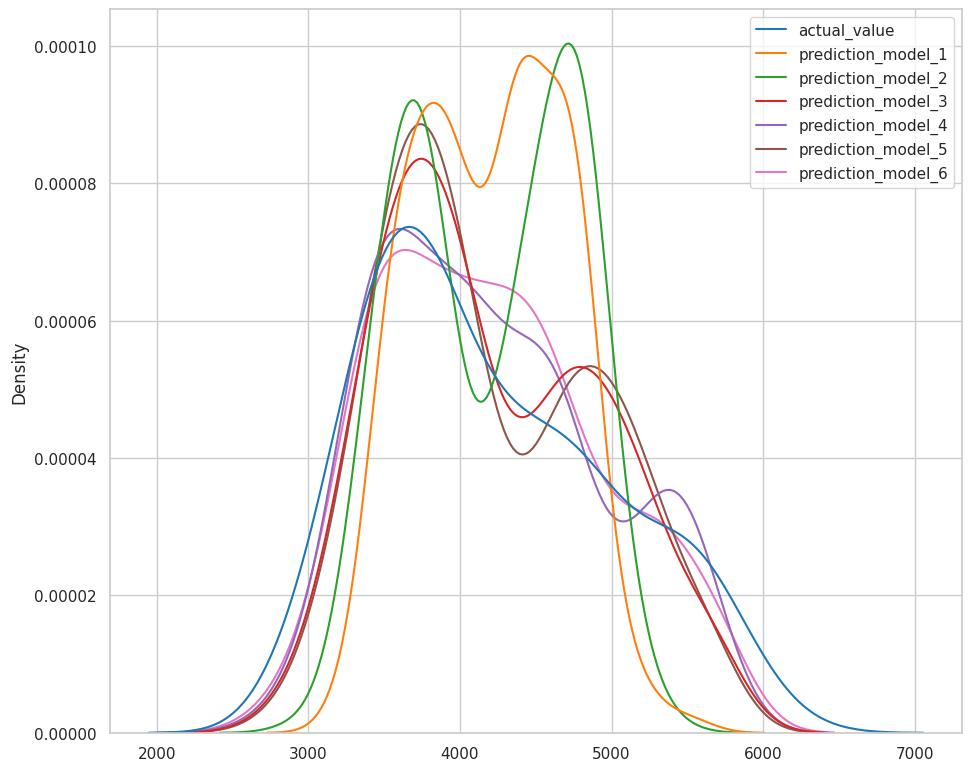

In [78]:
# @title Comparo datos y modelos en cuanto a densidad de probabilidad. (Otra forma de ver algo similar a lo de arriba)
sns.kdeplot(
    data=models_results,
    cumulative=False
)

<Axes: ylabel='Density'>

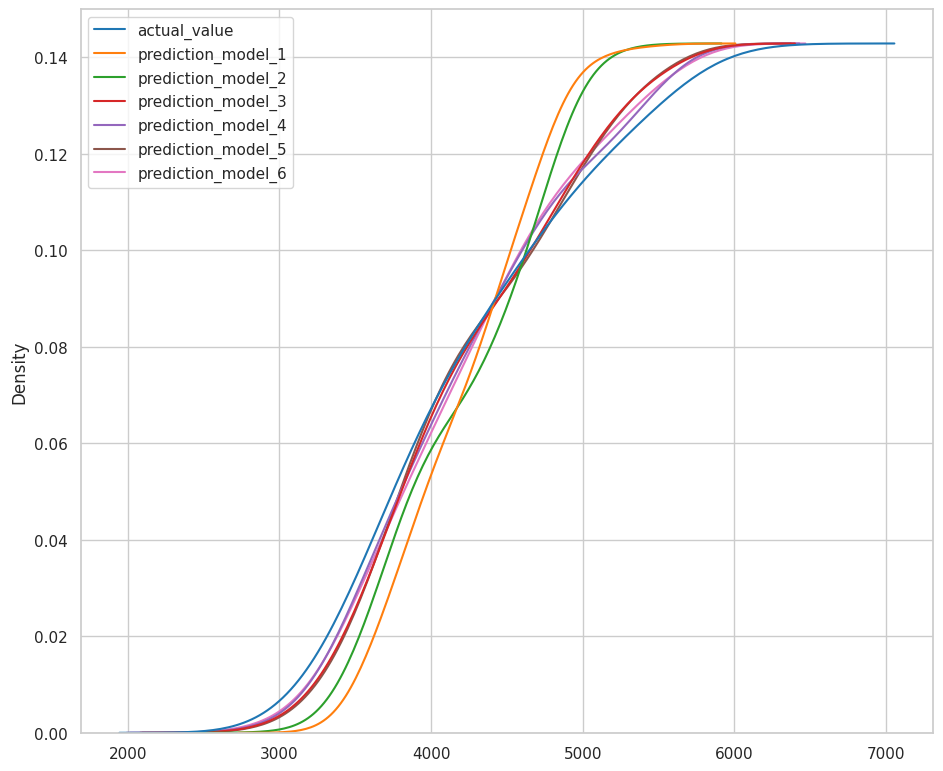

In [79]:
# @title Comparo datos y modelos en cuanto a densidad de probabilidad acumulada. Muy parecido al Ecdfplot. (Otra forma de ver algo similar a lo de arriba)
sns.kdeplot(
    data=models_results,
    cumulative=True
)

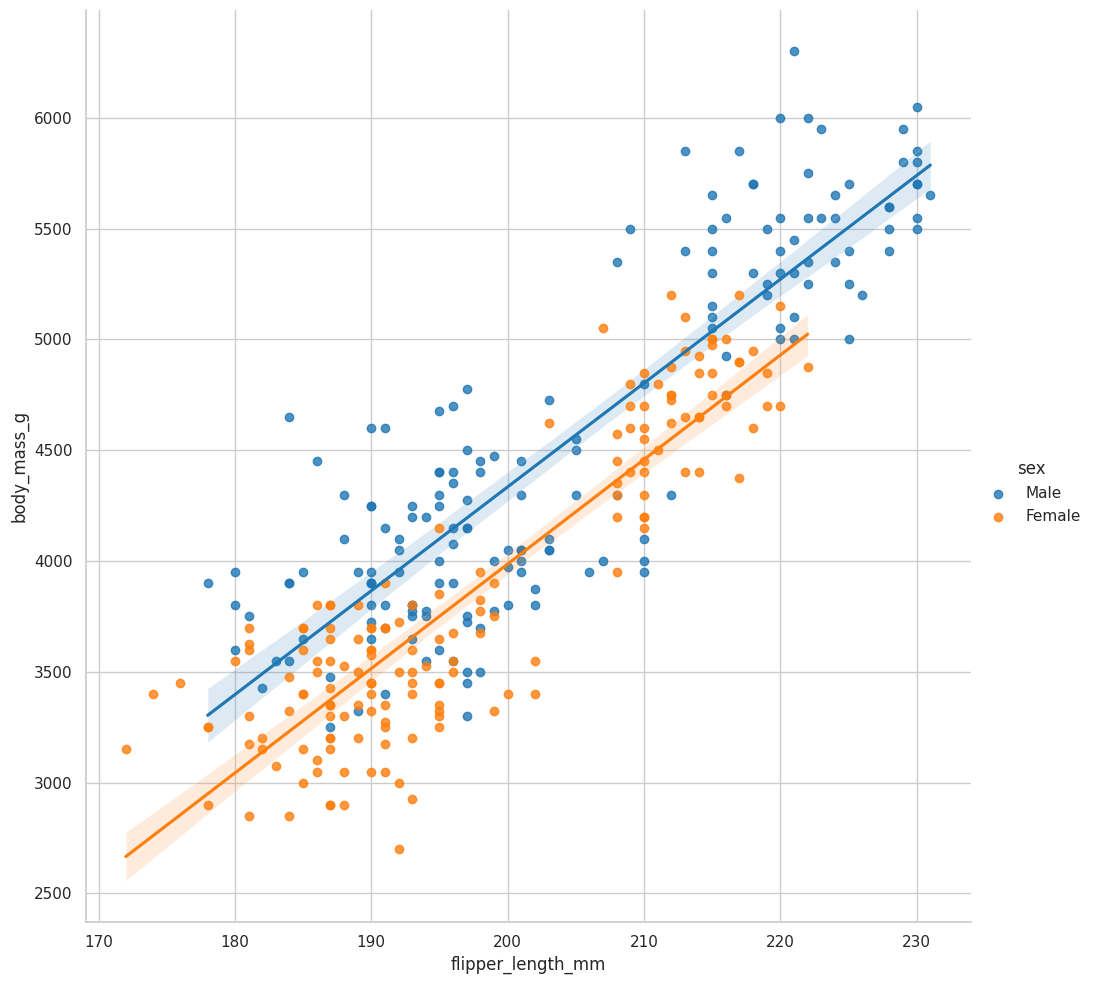

In [80]:
# @title Veamos directamente nuestro conjunto de datos con Lmplot entre largo de alas y peso abierto por sexo.
sns.lmplot(
    data=processed_penguins_df,
    x='flipper_length_mm',
    y='body_mass_g',
    height=10,
    hue='sex'
)

# Análisis de regresión logística

In [ ]:
smf.logit(
    formula='sex_numeric ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=processed_penguins_df
).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            sex_numeric   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Nov 2022   Pseudo R-squ.:                  0.4793
Time:                        19:31:51   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [ ]:
(
    processed_penguins_df
    .value_counts(['island', 'sex', 'species'])
    .reset_index(name='count')
)

island     sex    species  count
0     Biscoe    Male     Gentoo     61
1     Biscoe  Female     Gentoo     58
2      Dream  Female  Chinstrap     34
3      Dream    Male  Chinstrap     34
4      Dream    Male     Adelie     28
5      Dream  Female     Adelie     27
6  Torgersen  Female     Adelie     24
7  Torgersen    Male     Adelie     23
8     Biscoe  Female     Adelie     22
9     Biscoe    Male     Adelie     22

In [ ]:
processed_penguins_df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
processed_penguins_df = (
    processed_penguins_df
    .assign(is_adelie=lambda df: df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]))
)

In [ ]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data=processed_penguins_df
).fit(maxiter=100)

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.Male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [ ]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie = processed_penguins_df.species.replace(['Adelie', 'Chinstrap', 'Gentoo'], [1, 0, 0]),
        predicted_values = model_is_adelie.predict().round()
    )
)

is_adelie_df_predictions

actual_adelie  predicted_values
0                1               1.0
1                1               1.0
2                1               0.0
4                1               1.0
5                1               1.0
..             ...               ...
338              0               0.0
340              0               0.0
341              0               0.0
342              0               0.0
343              0               0.0

[333 rows x 2 columns]

In [ ]:
(
    is_adelie_df_predictions
    .value_counts(['actual_adelie', 'predicted_values'])
    .reset_index(name='count')
    .pivot_wider(
        index='actual_adelie',
        names_from='predicted_values',
        values_from='count'
    )
    .rename_column('actual_adelie', 'actual / predicted')
)

actual / predicted  0.0  1.0
0                   0  151   36
1                   1   17  129

In [ ]:
print(
    sklearn.metrics.confusion_matrix(
        is_adelie_df_predictions.actual_adelie,
        is_adelie_df_predictions.predicted_values
    )
)

sklearn.metrics.accuracy_score(
    is_adelie_df_predictions.actual_adelie,
    is_adelie_df_predictions.predicted_values
)

[[151  36]
 [ 17 129]]


0.8408408408408409

# Paradoja de Simpson

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

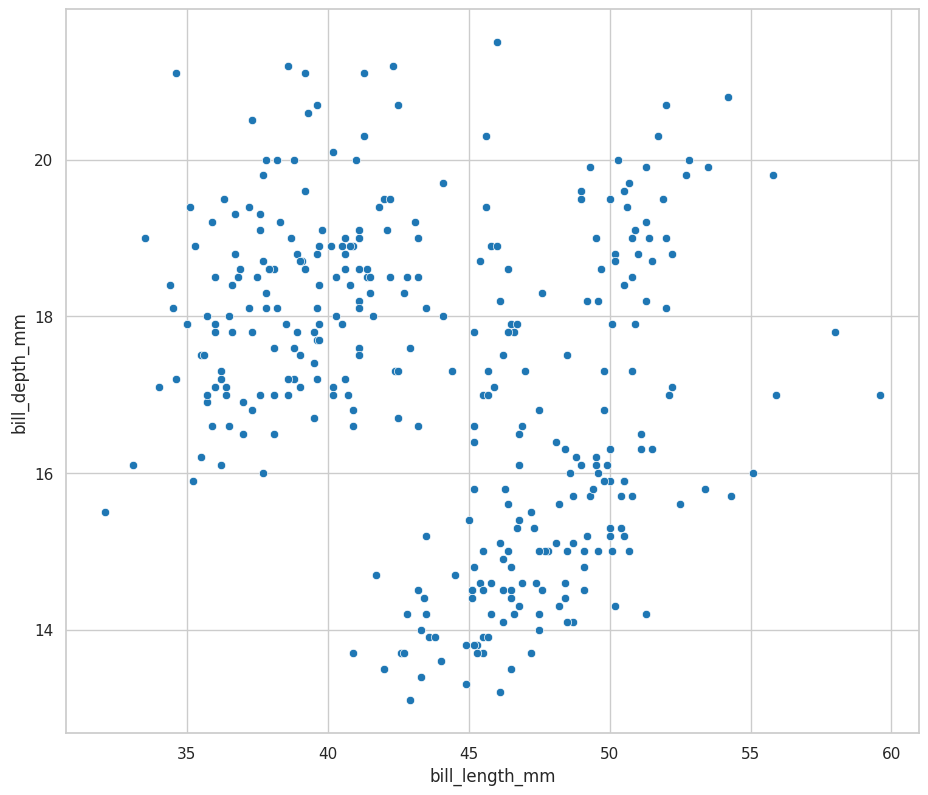

In [ ]:
sns.scatterplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

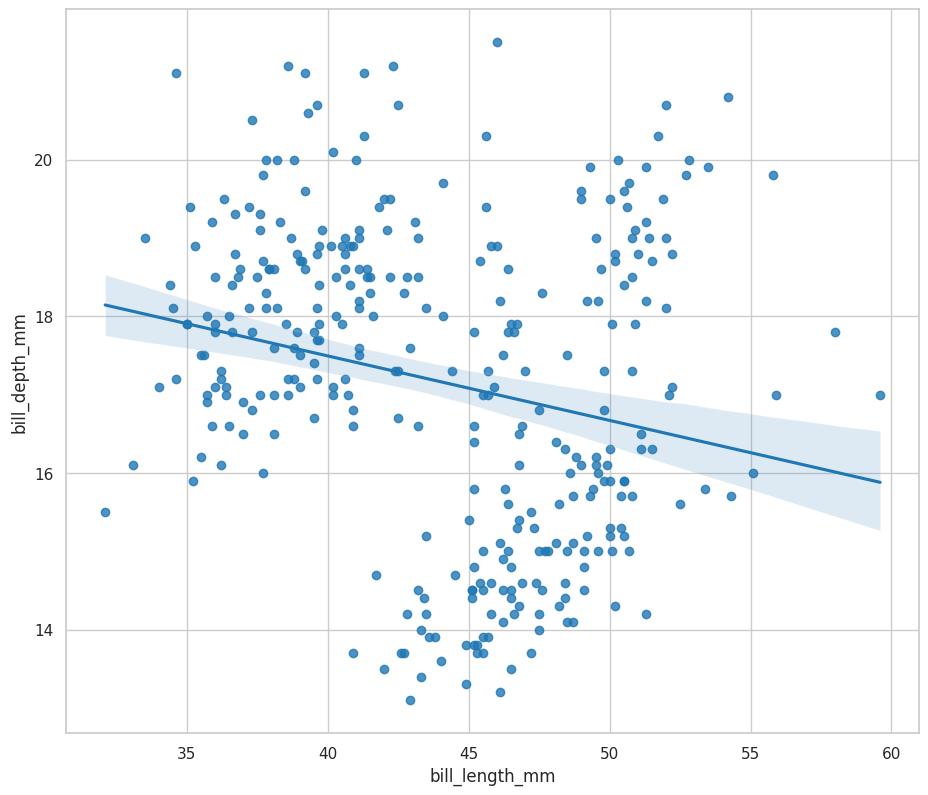

In [ ]:
sns.regplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

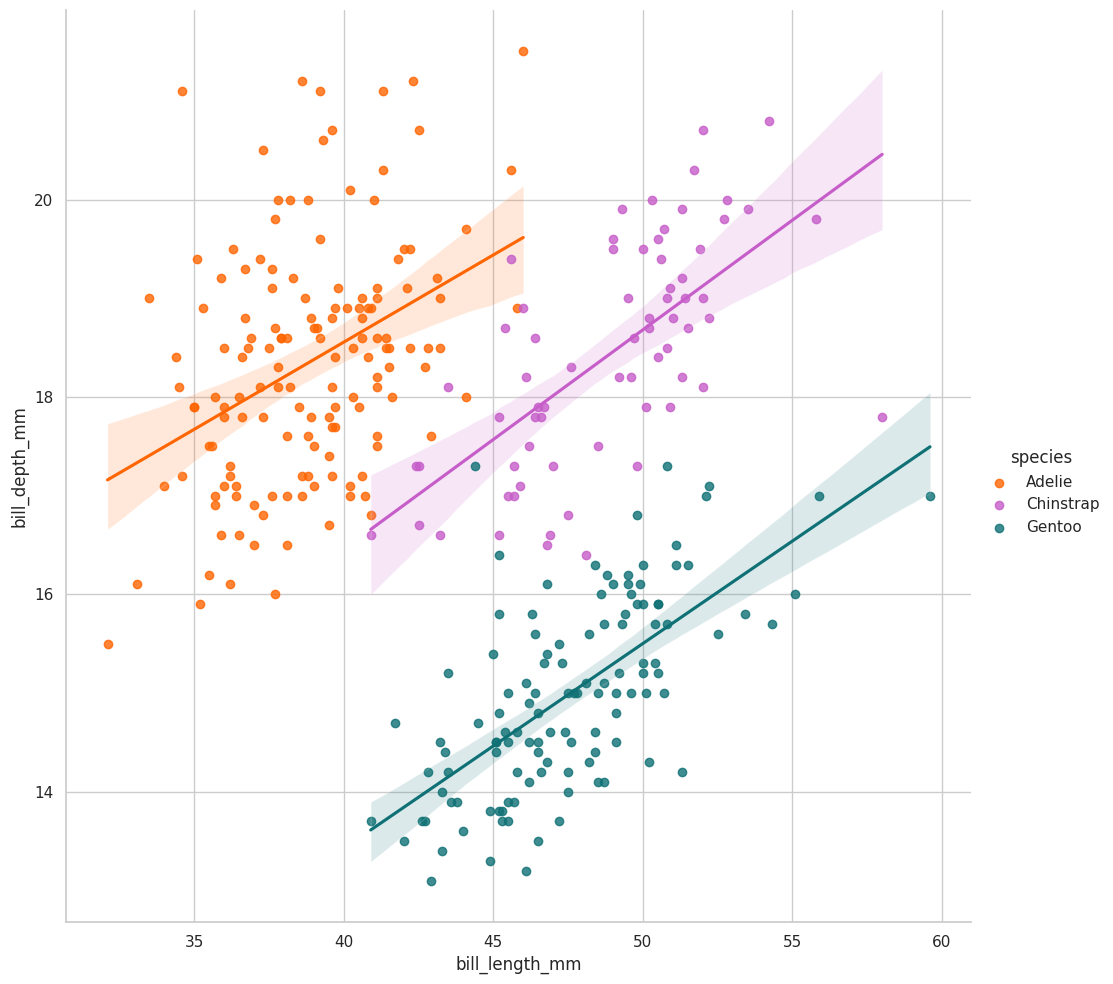

In [ ]:
sns.lmplot(
    data=processed_penguins_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10,
    palette=penguin_color
)

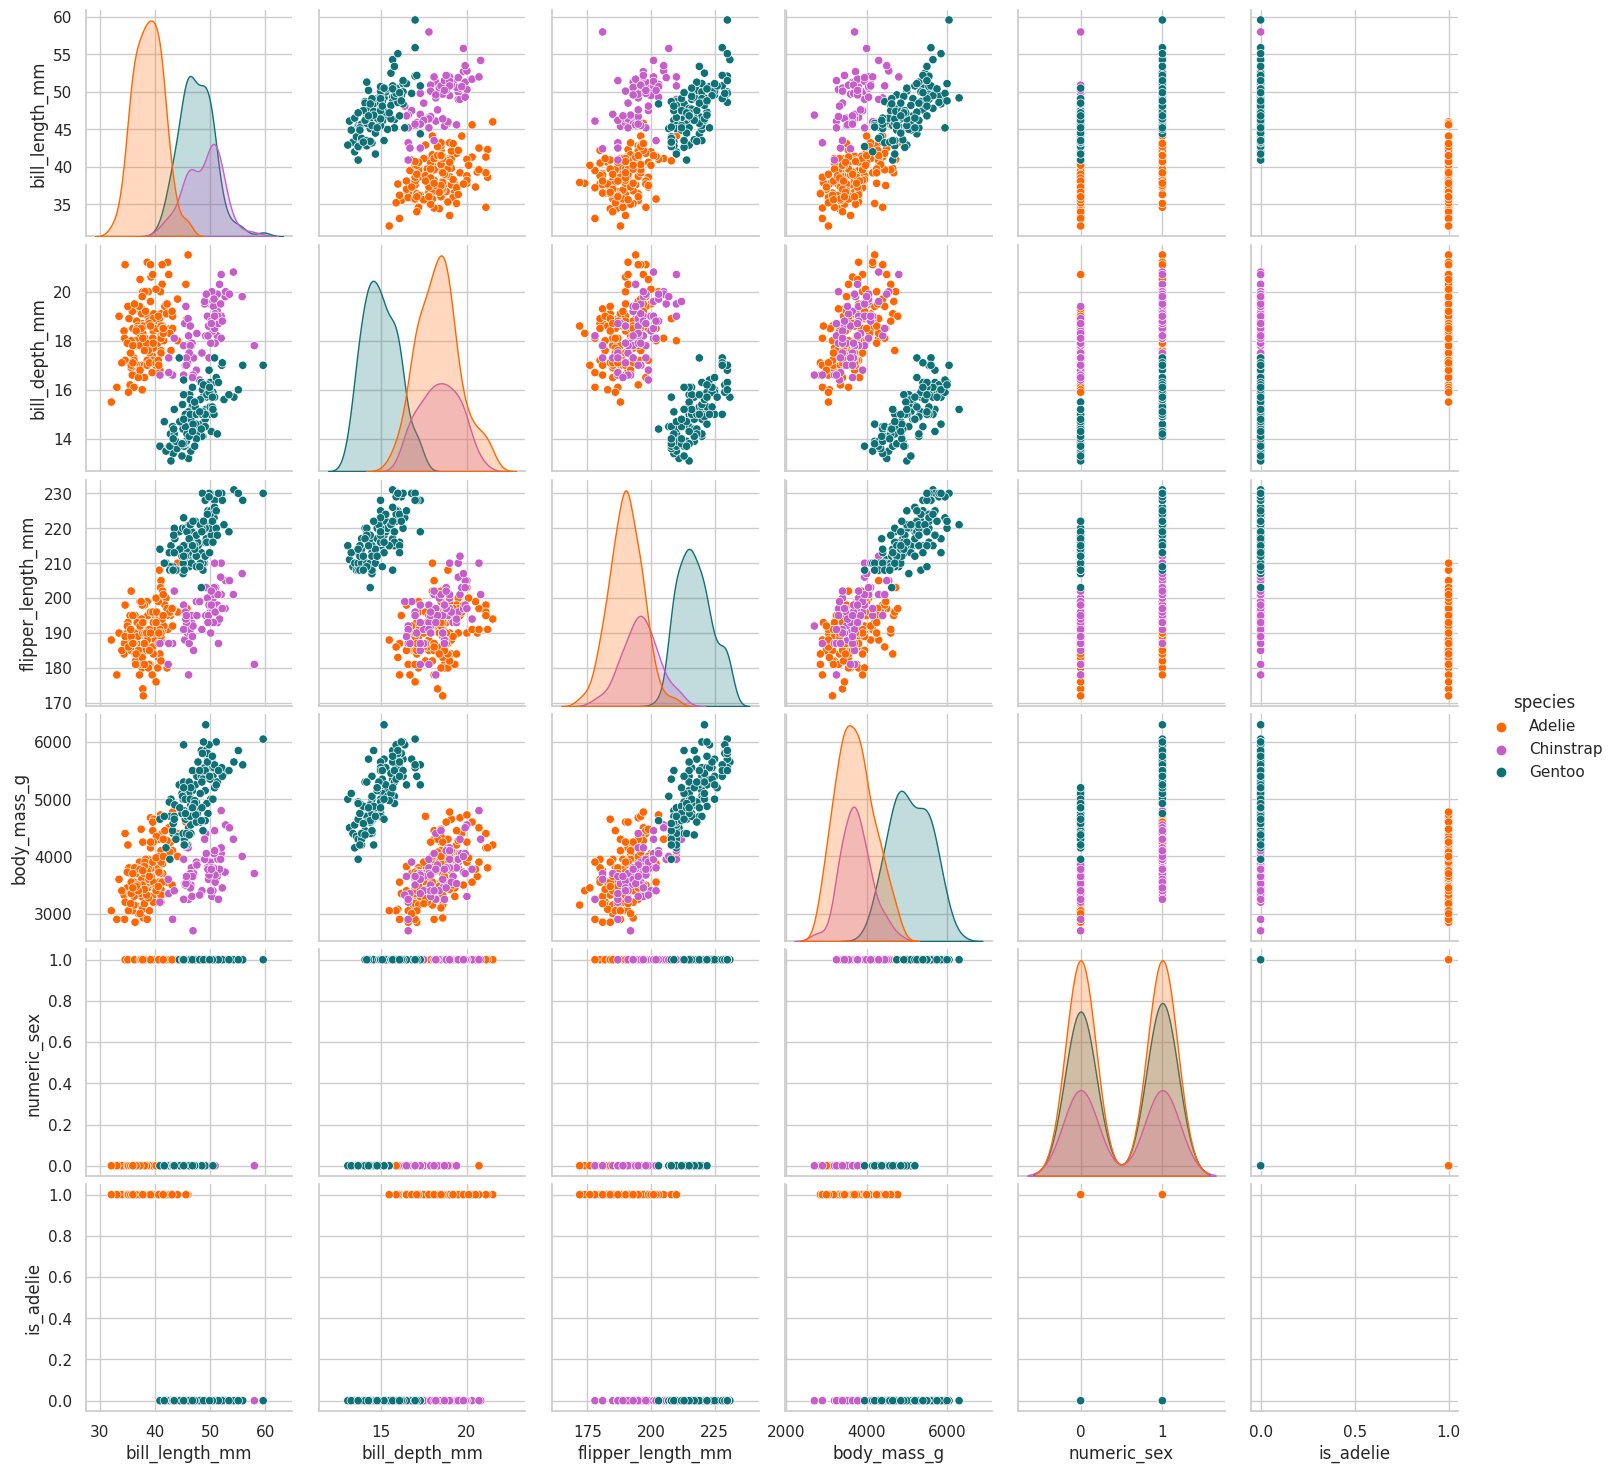

In [ ]:
sns.pairplot(data=processed_penguins_df, hue='species', palette=penguin_color)

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c92bae1e-ca3b-47c5-b028-6a9a99949ed3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>